In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

NameError: name 'plt' is not defined

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.56964 stdev: 0.27322
Best fitness: 0.93506 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.467
Mean genetic distance 2.871, standard deviation 0.453
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 8.425 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.77131 stdev: 0.19297
Best fitness: 0.95609 - size: (3, 15) - species 6 - id 314
Average adjusted fitness: 0.679
Mean genetic distance 2.965, standard deviation 0.462
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.598 sec (9.011 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77034 stdev: 0.22038
Best fitness: 0.95609 - size: (3, 15) - species 5 - id 314
Average adjusted fitness: 0.653
Mean genetic distance 3.009, standard deviation 0.467
Population of 200 members in 32 species
To

Population's average fitness: 0.72105 stdev: 0.16811
Best fitness: 0.91528 - size: (4, 16) - species 15 - id 462
Average adjusted fitness: 0.570
Mean genetic distance 3.101, standard deviation 0.483
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 9.012 sec (9.029 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.74499 stdev: 0.15284
Best fitness: 0.91528 - size: (4, 16) - species 15 - id 462
Average adjusted fitness: 0.601
Mean genetic distance 3.115, standard deviation 0.491
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 9.769 sec (9.153 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.73201 stdev: 0.17592
Best fitness: 0.92455 - size: (5, 18) - species 15 - id 1116
Average adjusted fitness: 0.544
Mean genetic distance 3.122, standard deviation 0.473
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 10.912 sec (9.404 average)

 ****** Ru

Population's average fitness: 0.74007 stdev: 0.13692
Best fitness: 0.87755 - size: (4, 18) - species 26 - id 987
Average adjusted fitness: 0.510
Mean genetic distance 3.138, standard deviation 0.497
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.980 sec (8.844 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74589 stdev: 0.15009
Best fitness: 0.89054 - size: (4, 17) - species 19 - id 1547
Average adjusted fitness: 0.520
Mean genetic distance 3.144, standard deviation 0.497
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.036 sec (8.963 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74091 stdev: 0.15247
Best fitness: 0.89054 - size: (4, 17) - species 19 - id 1547
Average adjusted fitness: 0.524
Mean genetic distance 3.144, standard deviation 0.508
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 10.339 sec (9.253 average)

 ******

Population's average fitness: 0.68856 stdev: 0.12052
Best fitness: 0.85343 - size: (8, 21) - species 35 - id 1745
Average adjusted fitness: 0.381
Mean genetic distance 3.250, standard deviation 0.498
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 10.471 sec (10.072 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67845 stdev: 0.13363
Best fitness: 0.85343 - size: (8, 21) - species 35 - id 1745
Average adjusted fitness: 0.375
Mean genetic distance 3.253, standard deviation 0.502
Population of 209 members in 40 species
Total extinctions: 0
Generation time: 10.727 sec (10.230 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68774 stdev: 0.12492
Best fitness: 0.85343 - size: (8, 21) - species 35 - id 1745
Average adjusted fitness: 0.407
Mean genetic distance 3.254, standard deviation 0.491
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 10.749 sec (10.302 average)

 

Population's average fitness: 0.75397 stdev: 0.15611
Best fitness: 0.88188 - size: (3, 14) - species 10 - id 446
Average adjusted fitness: 0.563
Mean genetic distance 3.109, standard deviation 0.475
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 10.701 sec (10.130 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.76035 stdev: 0.13789
Best fitness: 0.88188 - size: (3, 14) - species 10 - id 446
Average adjusted fitness: 0.559
Mean genetic distance 3.107, standard deviation 0.484
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 10.277 sec (10.194 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75445 stdev: 0.14134
Best fitness: 0.88188 - size: (3, 14) - species 10 - id 446
Average adjusted fitness: 0.554
Mean genetic distance 3.105, standard deviation 0.490
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.402 sec (10.258 average)

 ***

Population's average fitness: 0.52918 stdev: 0.14275
Best fitness: 0.74212 - size: (2, 13) - species 4 - id 186
Average adjusted fitness: 0.269
Mean genetic distance 2.933, standard deviation 0.484
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.393 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61824 stdev: 0.11877
Best fitness: 0.75943 - size: (3, 15) - species 19 - id 338
Average adjusted fitness: 0.315
Mean genetic distance 3.010, standard deviation 0.487
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.013 sec (7.703 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63157 stdev: 0.12243
Best fitness: 0.75943 - size: (3, 15) - species 19 - id 338
Average adjusted fitness: 0.377
Mean genetic distance 3.029, standard deviation 0.479
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 8.606 sec (8.004 average)

 ****** Running generation 3 

Population's average fitness: 0.59223 stdev: 0.08115
Best fitness: 0.74521 - size: (5, 19) - species 5 - id 682
Average adjusted fitness: 0.233
Mean genetic distance 3.114, standard deviation 0.502
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.439 sec (8.577 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59173 stdev: 0.08651
Best fitness: 0.74521 - size: (5, 19) - species 5 - id 682
Average adjusted fitness: 0.214
Mean genetic distance 3.132, standard deviation 0.488
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.082 sec (8.661 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61023 stdev: 0.07334
Best fitness: 0.75325 - size: (5, 19) - species 4 - id 1094
Average adjusted fitness: 0.211
Mean genetic distance 3.171, standard deviation 0.493
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 14.291 sec (9.466 average)

 ****** Runni

Population's average fitness: 0.77366 stdev: 0.11391
Best fitness: 0.90785 - size: (2, 13) - species 36 - id 191
Average adjusted fitness: 0.595
Mean genetic distance 3.127, standard deviation 0.491
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.663 sec (8.858 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75941 stdev: 0.13908
Best fitness: 0.90785 - size: (2, 13) - species 36 - id 191
Average adjusted fitness: 0.579
Mean genetic distance 3.121, standard deviation 0.476
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.859 sec (8.958 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75806 stdev: 0.15538
Best fitness: 0.90785 - size: (2, 13) - species 36 - id 191
Average adjusted fitness: 0.577
Mean genetic distance 3.116, standard deviation 0.468
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 9.391 sec (9.128 average)

 ****** Run

Population's average fitness: 0.69013 stdev: 0.12718
Best fitness: 0.84663 - size: (5, 17) - species 35 - id 1734
Average adjusted fitness: 0.374
Mean genetic distance 3.122, standard deviation 0.480
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 9.799 sec (9.758 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69253 stdev: 0.12085
Best fitness: 0.84663 - size: (5, 17) - species 35 - id 1734
Average adjusted fitness: 0.374
Mean genetic distance 3.123, standard deviation 0.475
Population of 202 members in 47 species
Total extinctions: 0
Generation time: 10.088 sec (9.894 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68633 stdev: 0.13694
Best fitness: 0.84663 - size: (5, 17) - species 35 - id 1734
Average adjusted fitness: 0.374
Mean genetic distance 3.125, standard deviation 0.473
Population of 212 members in 47 species
Total extinctions: 0
Generation time: 10.489 sec (10.015 average)

 ***

Population's average fitness: 0.69252 stdev: 0.11280
Best fitness: 0.83983 - size: (7, 19) - species 28 - id 1729
Average adjusted fitness: 0.390
Mean genetic distance 3.192, standard deviation 0.513
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.876 sec (9.997 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68611 stdev: 0.12427
Best fitness: 0.83983 - size: (7, 19) - species 28 - id 1729
Average adjusted fitness: 0.382
Mean genetic distance 3.231, standard deviation 0.507
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 10.612 sec (10.036 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68566 stdev: 0.11472
Best fitness: 0.83983 - size: (7, 19) - species 28 - id 1729
Average adjusted fitness: 0.383
Mean genetic distance 3.234, standard deviation 0.513
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 10.365 sec (10.060 average)

 **

Population's average fitness: 0.55119 stdev: 0.14146
Best fitness: 0.74644 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.280
Mean genetic distance 2.898, standard deviation 0.495
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.579 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61945 stdev: 0.13064
Best fitness: 0.76809 - size: (3, 14) - species 1 - id 263
Average adjusted fitness: 0.349
Mean genetic distance 2.976, standard deviation 0.474
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 8.482 sec (8.031 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62968 stdev: 0.12817
Best fitness: 0.76809 - size: (3, 14) - species 15 - id 263
Average adjusted fitness: 0.360
Mean genetic distance 3.017, standard deviation 0.468
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 8.981 sec (8.347 average)

 ****** Running generation 3 **

Population's average fitness: 0.57925 stdev: 0.09353
Best fitness: 0.74212 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.197
Mean genetic distance 3.138, standard deviation 0.492
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.646 sec (8.764 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60019 stdev: 0.08372
Best fitness: 0.74212 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.286
Mean genetic distance 3.168, standard deviation 0.484
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.579 sec (8.900 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59439 stdev: 0.09260
Best fitness: 0.74212 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.241
Mean genetic distance 3.176, standard deviation 0.482
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.521 sec (8.989 average)

 ****** Running ge

Population's average fitness: 0.63216 stdev: 0.08299
Best fitness: 0.76562 - size: (4, 17) - species 45 - id 821
Average adjusted fitness: 0.344
Mean genetic distance 3.133, standard deviation 0.462
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 10.104 sec (9.335 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63412 stdev: 0.08524
Best fitness: 0.76562 - size: (4, 17) - species 45 - id 821
Average adjusted fitness: 0.295
Mean genetic distance 3.162, standard deviation 0.456
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 10.120 sec (9.414 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63387 stdev: 0.09065
Best fitness: 0.76562 - size: (4, 17) - species 45 - id 821
Average adjusted fitness: 0.342
Mean genetic distance 3.153, standard deviation 0.457
Population of 199 members in 46 species
Total extinctions: 0
Generation time: 10.329 sec (9.652 average)

 ****** 

Population's average fitness: 0.60566 stdev: 0.07395
Best fitness: 0.74150 - size: (6, 22) - species 2 - id 1840
Average adjusted fitness: 0.198
Mean genetic distance 3.127, standard deviation 0.505
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 10.261 sec (9.665 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60715 stdev: 0.07887
Best fitness: 0.74521 - size: (4, 19) - species 34 - id 1960
Average adjusted fitness: 0.248
Mean genetic distance 3.119, standard deviation 0.514
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 10.288 sec (9.771 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60722 stdev: 0.07819
Best fitness: 0.74521 - size: (4, 19) - species 34 - id 1960
Average adjusted fitness: 0.239
Mean genetic distance 3.126, standard deviation 0.512
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 10.285 sec (9.857 average)

 ****

Population's average fitness: 0.76581 stdev: 0.12038
Best fitness: 0.89177 - size: (5, 18) - species 5 - id 690
Average adjusted fitness: 0.563
Mean genetic distance 3.150, standard deviation 0.485
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 10.415 sec (10.250 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74619 stdev: 0.14452
Best fitness: 0.89177 - size: (5, 18) - species 5 - id 690
Average adjusted fitness: 0.607
Mean genetic distance 3.151, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 10.487 sec (10.309 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73043 stdev: 0.17196
Best fitness: 0.89177 - size: (5, 18) - species 5 - id 690
Average adjusted fitness: 0.534
Mean genetic distance 3.206, standard deviation 0.482
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 10.403 sec (10.281 average)

 ******

Population's average fitness: 0.52408 stdev: 0.14871
Best fitness: 0.76376 - size: (2, 13) - species 3 - id 127
Average adjusted fitness: 0.272
Mean genetic distance 2.948, standard deviation 0.533
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.196 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61871 stdev: 0.12288
Best fitness: 0.77242 - size: (3, 15) - species 9 - id 346
Average adjusted fitness: 0.315
Mean genetic distance 3.025, standard deviation 0.509
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.793 sec (7.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63488 stdev: 0.11679
Best fitness: 0.77365 - size: (4, 16) - species 9 - id 534
Average adjusted fitness: 0.374
Mean genetic distance 3.058, standard deviation 0.500
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 8.185 sec (7.725 average)

 ****** Running generation 3 **

Population's average fitness: 0.59981 stdev: 0.09100
Best fitness: 0.78108 - size: (4, 17) - species 6 - id 504
Average adjusted fitness: 0.313
Mean genetic distance 3.097, standard deviation 0.467
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 8.876 sec (8.168 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58909 stdev: 0.09617
Best fitness: 0.78108 - size: (4, 17) - species 6 - id 504
Average adjusted fitness: 0.222
Mean genetic distance 3.120, standard deviation 0.459
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 9.157 sec (8.333 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60801 stdev: 0.08813
Best fitness: 0.78108 - size: (4, 17) - species 6 - id 504
Average adjusted fitness: 0.193
Mean genetic distance 3.155, standard deviation 0.459
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 8.917 sec (8.417 average)

 ****** Running

Population's average fitness: 0.67143 stdev: 0.11476
Best fitness: 0.80334 - size: (4, 18) - species 12 - id 1276
Average adjusted fitness: 0.375
Mean genetic distance 3.246, standard deviation 0.493
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 8.856 sec (8.437 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68450 stdev: 0.10217
Best fitness: 0.80334 - size: (4, 18) - species 12 - id 1276
Average adjusted fitness: 0.401
Mean genetic distance 3.237, standard deviation 0.501
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.017 sec (8.495 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68488 stdev: 0.11474
Best fitness: 0.80334 - size: (4, 18) - species 12 - id 1276
Average adjusted fitness: 0.386
Mean genetic distance 3.238, standard deviation 0.500
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 9.122 sec (8.684 average)

 ****** 

Population's average fitness: 0.62891 stdev: 0.10618
Best fitness: 0.81756 - size: (5, 19) - species 17 - id 1591
Average adjusted fitness: 0.273
Mean genetic distance 3.181, standard deviation 0.490
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.281 sec (9.049 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63154 stdev: 0.10030
Best fitness: 0.81756 - size: (5, 19) - species 17 - id 1591
Average adjusted fitness: 0.236
Mean genetic distance 3.177, standard deviation 0.493
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.636 sec (9.122 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64509 stdev: 0.09318
Best fitness: 0.81756 - size: (5, 19) - species 17 - id 1591
Average adjusted fitness: 0.317
Mean genetic distance 3.145, standard deviation 0.483
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.621 sec (9.188 average)

 ******

Population's average fitness: 0.63734 stdev: 0.08604
Best fitness: 0.77242 - size: (5, 17) - species 5 - id 1441
Average adjusted fitness: 0.238
Mean genetic distance 3.131, standard deviation 0.503
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.966 sec (9.234 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63921 stdev: 0.08815
Best fitness: 0.77242 - size: (5, 17) - species 5 - id 1441
Average adjusted fitness: 0.269
Mean genetic distance 3.150, standard deviation 0.503
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.204 sec (9.408 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63871 stdev: 0.08904
Best fitness: 0.77489 - size: (6, 25) - species 28 - id 2666
Average adjusted fitness: 0.243
Mean genetic distance 3.157, standard deviation 0.493
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.662 sec (9.470 average)

 ****** 

Population's average fitness: 0.52362 stdev: 0.15114
Best fitness: 0.80334 - size: (2, 13) - species 3 - id 165
Average adjusted fitness: 0.376
Mean genetic distance 2.930, standard deviation 0.485
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.037 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60509 stdev: 0.13530
Best fitness: 0.82560 - size: (3, 15) - species 8 - id 216
Average adjusted fitness: 0.310
Mean genetic distance 3.029, standard deviation 0.485
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.859 sec (7.448 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63303 stdev: 0.13023
Best fitness: 0.82560 - size: (3, 15) - species 8 - id 216
Average adjusted fitness: 0.382
Mean genetic distance 3.039, standard deviation 0.478
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 8.917 sec (7.938 average)

 ****** Running generation 3 **

Population's average fitness: 0.61091 stdev: 0.09885
Best fitness: 0.83983 - size: (5, 17) - species 24 - id 676
Average adjusted fitness: 0.276
Mean genetic distance 3.039, standard deviation 0.499
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.460 sec (7.804 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62102 stdev: 0.10834
Best fitness: 0.83983 - size: (5, 17) - species 24 - id 676
Average adjusted fitness: 0.242
Mean genetic distance 3.086, standard deviation 0.485
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 9.357 sec (8.063 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62142 stdev: 0.11380
Best fitness: 0.83983 - size: (5, 17) - species 24 - id 676
Average adjusted fitness: 0.290
Mean genetic distance 3.106, standard deviation 0.482
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.130 sec (8.215 average)

 ****** Runn

Population's average fitness: 0.61904 stdev: 0.09667
Best fitness: 0.78169 - size: (2, 15) - species 13 - id 511
Average adjusted fitness: 0.286
Mean genetic distance 3.084, standard deviation 0.482
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 9.205 sec (8.540 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62308 stdev: 0.09147
Best fitness: 0.78169 - size: (2, 15) - species 13 - id 511
Average adjusted fitness: 0.250
Mean genetic distance 3.081, standard deviation 0.477
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 11.101 sec (8.796 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61794 stdev: 0.09810
Best fitness: 0.78788 - size: (3, 16) - species 13 - id 1642
Average adjusted fitness: 0.297
Mean genetic distance 3.108, standard deviation 0.475
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 14.601 sec (9.524 average)

 ****** 

Population's average fitness: 0.62691 stdev: 0.09450
Best fitness: 0.77860 - size: (7, 23) - species 7 - id 1720
Average adjusted fitness: 0.288
Mean genetic distance 3.225, standard deviation 0.493
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.973 sec (9.286 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62660 stdev: 0.09437
Best fitness: 0.78355 - size: (7, 26) - species 22 - id 1970
Average adjusted fitness: 0.285
Mean genetic distance 3.221, standard deviation 0.480
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 10.013 sec (9.460 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64237 stdev: 0.08849
Best fitness: 0.78355 - size: (7, 26) - species 11 - id 1970
Average adjusted fitness: 0.343
Mean genetic distance 3.231, standard deviation 0.496
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 10.734 sec (9.645 average)

 *****

Population's average fitness: 0.64834 stdev: 0.10370
Best fitness: 0.78726 - size: (4, 15) - species 3 - id 2284
Average adjusted fitness: 0.276
Mean genetic distance 3.199, standard deviation 0.492
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.424 sec (9.000 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65380 stdev: 0.09581
Best fitness: 0.78726 - size: (4, 15) - species 3 - id 2284
Average adjusted fitness: 0.264
Mean genetic distance 3.244, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.526 sec (9.054 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65423 stdev: 0.10078
Best fitness: 0.78726 - size: (4, 15) - species 3 - id 2284
Average adjusted fitness: 0.279
Mean genetic distance 3.282, standard deviation 0.487
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.568 sec (9.173 average)

 ****** Ru

Population's average fitness: 0.49720 stdev: 0.05502
Best fitness: 0.71429 - size: (2, 13) - species 7 - id 67
Average adjusted fitness: 0.145
Mean genetic distance 2.978, standard deviation 0.543
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 7.123 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52562 stdev: 0.06210
Best fitness: 0.72851 - size: (2, 14) - species 1 - id 304
Average adjusted fitness: 0.173
Mean genetic distance 3.046, standard deviation 0.563
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 7.623 sec (7.373 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55288 stdev: 0.07148
Best fitness: 0.73964 - size: (3, 15) - species 1 - id 539
Average adjusted fitness: 0.170
Mean genetic distance 3.056, standard deviation 0.550
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.988 sec (7.578 average)

 ****** Running generation 3 ***

Population's average fitness: 0.58161 stdev: 0.08577
Best fitness: 0.77613 - size: (4, 17) - species 14 - id 538
Average adjusted fitness: 0.192
Mean genetic distance 3.084, standard deviation 0.479
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.325 sec (8.012 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58436 stdev: 0.09169
Best fitness: 0.77613 - size: (4, 17) - species 14 - id 538
Average adjusted fitness: 0.268
Mean genetic distance 3.095, standard deviation 0.480
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.766 sec (8.137 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58998 stdev: 0.09370
Best fitness: 0.77613 - size: (4, 17) - species 14 - id 538
Average adjusted fitness: 0.258
Mean genetic distance 3.114, standard deviation 0.489
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.038 sec (8.266 average)

 ****** Runn

Population's average fitness: 0.75463 stdev: 0.14222
Best fitness: 0.90476 - size: (5, 18) - species 19 - id 855
Average adjusted fitness: 0.538
Mean genetic distance 3.171, standard deviation 0.496
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.531 sec (8.495 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75004 stdev: 0.15107
Best fitness: 0.90476 - size: (5, 18) - species 19 - id 855
Average adjusted fitness: 0.536
Mean genetic distance 3.158, standard deviation 0.481
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 9.663 sec (8.612 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75227 stdev: 0.15443
Best fitness: 0.90476 - size: (5, 18) - species 19 - id 855
Average adjusted fitness: 0.560
Mean genetic distance 3.191, standard deviation 0.493
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.952 sec (8.886 average)

 ****** Run

Population's average fitness: 0.69982 stdev: 0.12165
Best fitness: 0.85281 - size: (3, 15) - species 16 - id 1607
Average adjusted fitness: 0.404
Mean genetic distance 3.151, standard deviation 0.475
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.633 sec (8.970 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71173 stdev: 0.10362
Best fitness: 0.85281 - size: (3, 15) - species 16 - id 1607
Average adjusted fitness: 0.444
Mean genetic distance 3.164, standard deviation 0.472
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.791 sec (9.132 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70942 stdev: 0.10850
Best fitness: 0.85281 - size: (3, 15) - species 16 - id 1607
Average adjusted fitness: 0.435
Mean genetic distance 3.144, standard deviation 0.478
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.482 sec (9.199 average)

 ******

Population's average fitness: 0.70184 stdev: 0.10752
Best fitness: 0.83117 - size: (5, 21) - species 20 - id 1095
Average adjusted fitness: 0.406
Mean genetic distance 3.266, standard deviation 0.470
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 9.728 sec (9.735 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69716 stdev: 0.11087
Best fitness: 0.83550 - size: (5, 19) - species 7 - id 2388
Average adjusted fitness: 0.400
Mean genetic distance 3.286, standard deviation 0.476
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 9.882 sec (9.738 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71023 stdev: 0.09263
Best fitness: 0.83550 - size: (5, 19) - species 7 - id 2388
Average adjusted fitness: 0.343
Mean genetic distance 3.282, standard deviation 0.468
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 9.777 sec (9.763 average)

 ****** R

Population's average fitness: 0.56396 stdev: 0.14956
Best fitness: 0.78169 - size: (2, 13) - species 1 - id 68
Average adjusted fitness: 0.327
Mean genetic distance 2.911, standard deviation 0.479
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.273 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61824 stdev: 0.14668
Best fitness: 0.80952 - size: (2, 13) - species 17 - id 324
Average adjusted fitness: 0.378
Mean genetic distance 2.953, standard deviation 0.482
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.595 sec (7.434 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63805 stdev: 0.13770
Best fitness: 0.80952 - size: (2, 13) - species 5 - id 324
Average adjusted fitness: 0.360
Mean genetic distance 2.966, standard deviation 0.492
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 7.798 sec (7.555 average)

 ****** Running generation 3 **

Population's average fitness: 0.59565 stdev: 0.10623
Best fitness: 0.81942 - size: (5, 17) - species 27 - id 750
Average adjusted fitness: 0.293
Mean genetic distance 3.083, standard deviation 0.465
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 8.810 sec (8.124 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60449 stdev: 0.10641
Best fitness: 0.81942 - size: (5, 17) - species 27 - id 750
Average adjusted fitness: 0.297
Mean genetic distance 3.100, standard deviation 0.467
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.648 sec (8.211 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62439 stdev: 0.10509
Best fitness: 0.81942 - size: (5, 17) - species 27 - id 750
Average adjusted fitness: 0.298
Mean genetic distance 3.120, standard deviation 0.456
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 8.582 sec (8.264 average)

 ****** Runn

Population's average fitness: 0.64434 stdev: 0.09001
Best fitness: 0.84168 - size: (6, 19) - species 14 - id 1248
Average adjusted fitness: 0.312
Mean genetic distance 3.068, standard deviation 0.489
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.924 sec (8.554 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63274 stdev: 0.09921
Best fitness: 0.84168 - size: (6, 19) - species 14 - id 1248
Average adjusted fitness: 0.256
Mean genetic distance 3.107, standard deviation 0.480
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 9.490 sec (8.647 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64678 stdev: 0.09451
Best fitness: 0.84168 - size: (6, 19) - species 14 - id 1248
Average adjusted fitness: 0.264
Mean genetic distance 3.099, standard deviation 0.489
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.463 sec (8.852 average)

 ****** 

Population's average fitness: 0.61855 stdev: 0.08848
Best fitness: 0.78541 - size: (5, 17) - species 24 - id 1467
Average adjusted fitness: 0.342
Mean genetic distance 3.203, standard deviation 0.496
Population of 191 members in 44 species
Total extinctions: 0
Generation time: 9.487 sec (9.141 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62445 stdev: 0.08513
Best fitness: 0.79468 - size: (4, 17) - species 7 - id 1924
Average adjusted fitness: 0.198
Mean genetic distance 3.189, standard deviation 0.498
Population of 193 members in 44 species
Total extinctions: 0
Generation time: 9.284 sec (9.217 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62142 stdev: 0.08548
Best fitness: 0.79468 - size: (4, 17) - species 7 - id 1924
Average adjusted fitness: 0.184
Mean genetic distance 3.193, standard deviation 0.499
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 9.286 sec (9.244 average)

 ****** R

Population's average fitness: 0.73423 stdev: 0.15231
Best fitness: 0.91651 - size: (6, 21) - species 1 - id 1869
Average adjusted fitness: 0.460
Mean genetic distance 3.239, standard deviation 0.489
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 9.917 sec (9.447 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73616 stdev: 0.14854
Best fitness: 0.92084 - size: (6, 22) - species 1 - id 2473
Average adjusted fitness: 0.450
Mean genetic distance 3.214, standard deviation 0.481
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 10.887 sec (9.606 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73550 stdev: 0.15275
Best fitness: 0.92084 - size: (6, 22) - species 1 - id 2473
Average adjusted fitness: 0.418
Mean genetic distance 3.176, standard deviation 0.494
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 9.456 sec (9.664 average)

 ****** R

Population's average fitness: 0.52344 stdev: 0.10014
Best fitness: 0.70563 - size: (2, 13) - species 7 - id 139
Average adjusted fitness: 0.330
Mean genetic distance 2.830, standard deviation 0.446
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.170 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58242 stdev: 0.09399
Best fitness: 0.83117 - size: (2, 13) - species 15 - id 308
Average adjusted fitness: 0.381
Mean genetic distance 2.917, standard deviation 0.456
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.846 sec (7.508 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60288 stdev: 0.09232
Best fitness: 0.83117 - size: (2, 13) - species 15 - id 308
Average adjusted fitness: 0.242
Mean genetic distance 2.994, standard deviation 0.470
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.105 sec (7.707 average)

 ****** Running generation 3 

Population's average fitness: 0.58109 stdev: 0.08973
Best fitness: 0.81262 - size: (3, 17) - species 24 - id 823
Average adjusted fitness: 0.263
Mean genetic distance 3.071, standard deviation 0.472
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.338 sec (7.920 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59255 stdev: 0.09133
Best fitness: 0.81262 - size: (3, 17) - species 24 - id 823
Average adjusted fitness: 0.240
Mean genetic distance 3.048, standard deviation 0.473
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.621 sec (8.037 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60569 stdev: 0.09166
Best fitness: 0.83673 - size: (3, 18) - species 24 - id 1095
Average adjusted fitness: 0.198
Mean genetic distance 3.056, standard deviation 0.473
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.764 sec (8.141 average)

 ****** Run

Population's average fitness: 0.65691 stdev: 0.11716
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 1400
Average adjusted fitness: 0.305
Mean genetic distance 3.127, standard deviation 0.485
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 9.296 sec (8.559 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65226 stdev: 0.12418
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 1400
Average adjusted fitness: 0.357
Mean genetic distance 3.177, standard deviation 0.490
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.110 sec (8.614 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66206 stdev: 0.11676
Best fitness: 0.87013 - size: (5, 19) - species 27 - id 1400
Average adjusted fitness: 0.263
Mean genetic distance 3.169, standard deviation 0.495
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 9.236 sec (8.824 average)

 ****** 

Population's average fitness: 0.62239 stdev: 0.09372
Best fitness: 0.83550 - size: (3, 15) - species 24 - id 1640
Average adjusted fitness: 0.283
Mean genetic distance 3.145, standard deviation 0.518
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.084 sec (8.837 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62216 stdev: 0.09366
Best fitness: 0.83550 - size: (3, 15) - species 24 - id 1640
Average adjusted fitness: 0.228
Mean genetic distance 3.132, standard deviation 0.519
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.272 sec (8.919 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63260 stdev: 0.08964
Best fitness: 0.83550 - size: (3, 15) - species 24 - id 1640
Average adjusted fitness: 0.180
Mean genetic distance 3.134, standard deviation 0.523
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.457 sec (9.035 average)

 ******

Population's average fitness: 0.66154 stdev: 0.10778
Best fitness: 0.84168 - size: (10, 25) - species 25 - id 2509
Average adjusted fitness: 0.291
Mean genetic distance 3.210, standard deviation 0.526
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.111 sec (9.797 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66885 stdev: 0.11257
Best fitness: 0.84168 - size: (10, 25) - species 25 - id 2509
Average adjusted fitness: 0.413
Mean genetic distance 3.232, standard deviation 0.537
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 10.643 sec (9.919 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66970 stdev: 0.11032
Best fitness: 0.84168 - size: (10, 25) - species 25 - id 2509
Average adjusted fitness: 0.317
Mean genetic distance 3.180, standard deviation 0.535
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.363 sec (9.997 average)

 

Population's average fitness: 0.53404 stdev: 0.15986
Best fitness: 0.78602 - size: (2, 13) - species 2 - id 111
Average adjusted fitness: 0.300
Mean genetic distance 2.915, standard deviation 0.466
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.428 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62585 stdev: 0.13302
Best fitness: 0.79035 - size: (3, 15) - species 21 - id 358
Average adjusted fitness: 0.379
Mean genetic distance 2.969, standard deviation 0.465
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.771 sec (7.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65515 stdev: 0.11112
Best fitness: 0.79035 - size: (3, 15) - species 21 - id 358
Average adjusted fitness: 0.400
Mean genetic distance 2.998, standard deviation 0.480
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.628 sec (7.942 average)

 ****** Running generation 3 

Population's average fitness: 0.61872 stdev: 0.09389
Best fitness: 0.78231 - size: (2, 13) - species 38 - id 509
Average adjusted fitness: 0.322
Mean genetic distance 3.098, standard deviation 0.494
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 8.883 sec (8.283 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62007 stdev: 0.09828
Best fitness: 0.79283 - size: (3, 15) - species 34 - id 891
Average adjusted fitness: 0.376
Mean genetic distance 3.133, standard deviation 0.495
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 9.064 sec (8.413 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62588 stdev: 0.10028
Best fitness: 0.79283 - size: (3, 15) - species 24 - id 891
Average adjusted fitness: 0.268
Mean genetic distance 3.155, standard deviation 0.492
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 8.819 sec (8.471 average)

 ****** Runn

Population's average fitness: 0.62717 stdev: 0.09055
Best fitness: 0.79654 - size: (6, 22) - species 19 - id 1238
Average adjusted fitness: 0.269
Mean genetic distance 3.045, standard deviation 0.492
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 9.215 sec (8.536 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62651 stdev: 0.09259
Best fitness: 0.79654 - size: (6, 22) - species 19 - id 1238
Average adjusted fitness: 0.277
Mean genetic distance 3.083, standard deviation 0.485
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 10.314 sec (8.713 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63076 stdev: 0.09521
Best fitness: 0.79654 - size: (6, 22) - species 19 - id 1238
Average adjusted fitness: 0.287
Mean genetic distance 3.116, standard deviation 0.483
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.508 sec (8.928 average)

 ******

Population's average fitness: 0.61597 stdev: 0.09796
Best fitness: 0.80952 - size: (5, 19) - species 16 - id 699
Average adjusted fitness: 0.253
Mean genetic distance 3.201, standard deviation 0.517
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.427 sec (9.165 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61332 stdev: 0.10061
Best fitness: 0.80952 - size: (5, 19) - species 16 - id 699
Average adjusted fitness: 0.313
Mean genetic distance 3.210, standard deviation 0.520
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.727 sec (9.290 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62159 stdev: 0.10182
Best fitness: 0.80952 - size: (5, 19) - species 16 - id 699
Average adjusted fitness: 0.355
Mean genetic distance 3.198, standard deviation 0.506
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 9.801 sec (9.416 average)

 ****** Ru

Population's average fitness: 0.67156 stdev: 0.09478
Best fitness: 0.83488 - size: (7, 21) - species 39 - id 1615
Average adjusted fitness: 0.295
Mean genetic distance 3.256, standard deviation 0.493
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.856 sec (9.662 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67395 stdev: 0.10859
Best fitness: 0.83488 - size: (7, 21) - species 39 - id 1615
Average adjusted fitness: 0.448
Mean genetic distance 3.267, standard deviation 0.489
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 9.596 sec (9.631 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66485 stdev: 0.11094
Best fitness: 0.83488 - size: (7, 21) - species 39 - id 1615
Average adjusted fitness: 0.346
Mean genetic distance 3.263, standard deviation 0.488
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 10.073 sec (9.706 average)

 *****

Population's average fitness: 0.49166 stdev: 0.05950
Best fitness: 0.68707 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.230
Mean genetic distance 2.940, standard deviation 0.485
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.265 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54121 stdev: 0.07516
Best fitness: 0.76809 - size: (3, 15) - species 6 - id 255
Average adjusted fitness: 0.175
Mean genetic distance 3.010, standard deviation 0.473
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.975 sec (7.620 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55761 stdev: 0.08247
Best fitness: 0.78850 - size: (4, 17) - species 16 - id 454
Average adjusted fitness: 0.290
Mean genetic distance 3.012, standard deviation 0.458
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.289 sec (7.843 average)

 ****** Running generation 3 **

Population's average fitness: 0.58513 stdev: 0.10004
Best fitness: 0.77056 - size: (3, 14) - species 16 - id 384
Average adjusted fitness: 0.226
Mean genetic distance 3.071, standard deviation 0.505
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.768 sec (8.265 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60472 stdev: 0.09929
Best fitness: 0.77737 - size: (4, 16) - species 27 - id 992
Average adjusted fitness: 0.222
Mean genetic distance 3.173, standard deviation 0.510
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 8.935 sec (8.377 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59329 stdev: 0.10509
Best fitness: 0.77984 - size: (5, 20) - species 29 - id 1099
Average adjusted fitness: 0.297
Mean genetic distance 3.185, standard deviation 0.511
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.121 sec (8.483 average)

 ****** Run

Population's average fitness: 0.68398 stdev: 0.11323
Best fitness: 0.87631 - size: (4, 17) - species 2 - id 1086
Average adjusted fitness: 0.312
Mean genetic distance 3.206, standard deviation 0.495
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 9.524 sec (8.664 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67501 stdev: 0.12868
Best fitness: 0.87631 - size: (4, 17) - species 2 - id 1086
Average adjusted fitness: 0.359
Mean genetic distance 3.248, standard deviation 0.488
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.448 sec (8.743 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68632 stdev: 0.12236
Best fitness: 0.87631 - size: (4, 17) - species 2 - id 1086
Average adjusted fitness: 0.349
Mean genetic distance 3.232, standard deviation 0.484
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 9.389 sec (8.958 average)

 ****** Run

Population's average fitness: 0.61251 stdev: 0.09914
Best fitness: 0.81633 - size: (5, 19) - species 25 - id 710
Average adjusted fitness: 0.230
Mean genetic distance 3.165, standard deviation 0.480
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 9.828 sec (9.327 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62129 stdev: 0.10333
Best fitness: 0.81633 - size: (5, 19) - species 25 - id 710
Average adjusted fitness: 0.238
Mean genetic distance 3.165, standard deviation 0.479
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.766 sec (9.412 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63257 stdev: 0.09665
Best fitness: 0.81633 - size: (5, 19) - species 25 - id 710
Average adjusted fitness: 0.226
Mean genetic distance 3.182, standard deviation 0.472
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.770 sec (9.484 average)

 ****** Ru

Population's average fitness: 0.63626 stdev: 0.10948
Best fitness: 0.80891 - size: (4, 17) - species 21 - id 1129
Average adjusted fitness: 0.341
Mean genetic distance 3.196, standard deviation 0.509
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 10.331 sec (9.646 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63958 stdev: 0.10197
Best fitness: 0.80891 - size: (4, 17) - species 21 - id 1129
Average adjusted fitness: 0.270
Mean genetic distance 3.185, standard deviation 0.499
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 9.797 sec (9.691 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63699 stdev: 0.10793
Best fitness: 0.80891 - size: (4, 17) - species 21 - id 1129
Average adjusted fitness: 0.298
Mean genetic distance 3.173, standard deviation 0.509
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 10.150 sec (9.772 average)

 ****

Population's average fitness: 0.49707 stdev: 0.07989
Best fitness: 0.75943 - size: (2, 13) - species 6 - id 122
Average adjusted fitness: 0.221
Mean genetic distance 2.943, standard deviation 0.479
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.077 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55135 stdev: 0.08883
Best fitness: 0.79097 - size: (3, 14) - species 20 - id 326
Average adjusted fitness: 0.225
Mean genetic distance 3.008, standard deviation 0.478
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.033 sec (7.555 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58169 stdev: 0.09817
Best fitness: 0.83673 - size: (4, 15) - species 18 - id 526
Average adjusted fitness: 0.219
Mean genetic distance 3.024, standard deviation 0.487
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.115 sec (7.741 average)

 ****** Running generation 3 

Population's average fitness: 0.58998 stdev: 0.10349
Best fitness: 0.76809 - size: (3, 13) - species 16 - id 823
Average adjusted fitness: 0.282
Mean genetic distance 3.108, standard deviation 0.469
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.559 sec (8.030 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60183 stdev: 0.10283
Best fitness: 0.79159 - size: (6, 19) - species 28 - id 941
Average adjusted fitness: 0.289
Mean genetic distance 3.107, standard deviation 0.462
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.904 sec (8.176 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61244 stdev: 0.10222
Best fitness: 0.80458 - size: (7, 20) - species 38 - id 1075
Average adjusted fitness: 0.303
Mean genetic distance 3.121, standard deviation 0.458
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.953 sec (8.287 average)

 ****** Run

Population's average fitness: 0.63664 stdev: 0.10027
Best fitness: 0.79901 - size: (5, 18) - species 34 - id 707
Average adjusted fitness: 0.301
Mean genetic distance 3.141, standard deviation 0.501
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.155 sec (8.577 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63972 stdev: 0.11099
Best fitness: 0.80210 - size: (6, 19) - species 34 - id 1495
Average adjusted fitness: 0.320
Mean genetic distance 3.147, standard deviation 0.493
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.590 sec (8.678 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63964 stdev: 0.10592
Best fitness: 0.80210 - size: (6, 19) - species 34 - id 1495
Average adjusted fitness: 0.240
Mean genetic distance 3.198, standard deviation 0.505
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 9.598 sec (8.894 average)

 ****** R

Population's average fitness: 0.66453 stdev: 0.14577
Best fitness: 0.84477 - size: (5, 20) - species 9 - id 1870
Average adjusted fitness: 0.388
Mean genetic distance 3.166, standard deviation 0.508
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 9.363 sec (9.103 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68125 stdev: 0.13164
Best fitness: 0.84477 - size: (5, 20) - species 25 - id 1870
Average adjusted fitness: 0.403
Mean genetic distance 3.155, standard deviation 0.510
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 10.119 sec (9.261 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66577 stdev: 0.14568
Best fitness: 0.85529 - size: (4, 16) - species 5 - id 2122
Average adjusted fitness: 0.388
Mean genetic distance 3.156, standard deviation 0.502
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.223 sec (9.401 average)

 ******

Population's average fitness: 0.73939 stdev: 0.16652
Best fitness: 0.88497 - size: (4, 17) - species 25 - id 1865
Average adjusted fitness: 0.521
Mean genetic distance 3.175, standard deviation 0.501
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 10.262 sec (9.503 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.75013 stdev: 0.15795
Best fitness: 0.88497 - size: (4, 17) - species 25 - id 1865
Average adjusted fitness: 0.526
Mean genetic distance 3.174, standard deviation 0.495
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.607 sec (9.533 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75530 stdev: 0.14719
Best fitness: 0.88497 - size: (4, 17) - species 25 - id 1865
Average adjusted fitness: 0.546
Mean genetic distance 3.194, standard deviation 0.505
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 10.096 sec (9.614 average)

 ****

Population's average fitness: 0.53806 stdev: 0.13695
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 11
Average adjusted fitness: 0.316
Mean genetic distance 2.891, standard deviation 0.528
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 7.260 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59310 stdev: 0.13186
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 11
Average adjusted fitness: 0.327
Mean genetic distance 3.078, standard deviation 0.521
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.776 sec (7.518 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61976 stdev: 0.11945
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 11
Average adjusted fitness: 0.328
Mean genetic distance 3.111, standard deviation 0.507
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.941 sec (7.659 average)

 ****** Running generation 3 *****

Population's average fitness: 0.61705 stdev: 0.09640
Best fitness: 0.79654 - size: (4, 16) - species 37 - id 811
Average adjusted fitness: 0.311
Mean genetic distance 3.130, standard deviation 0.475
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 9.026 sec (8.360 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62440 stdev: 0.10731
Best fitness: 0.79963 - size: (5, 18) - species 33 - id 945
Average adjusted fitness: 0.378
Mean genetic distance 3.134, standard deviation 0.463
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.177 sec (8.496 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62233 stdev: 0.11090
Best fitness: 0.80210 - size: (3, 15) - species 15 - id 1068
Average adjusted fitness: 0.327
Mean genetic distance 3.166, standard deviation 0.475
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 9.485 sec (8.637 average)

 ****** Run

Population's average fitness: 0.65304 stdev: 0.13192
Best fitness: 0.78850 - size: (3, 16) - species 2 - id 802
Average adjusted fitness: 0.373
Mean genetic distance 3.160, standard deviation 0.480
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 9.697 sec (8.762 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67243 stdev: 0.10886
Best fitness: 0.79035 - size: (4, 14) - species 7 - id 1450
Average adjusted fitness: 0.356
Mean genetic distance 3.177, standard deviation 0.464
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 10.049 sec (8.891 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68082 stdev: 0.10632
Best fitness: 0.79035 - size: (4, 14) - species 7 - id 1450
Average adjusted fitness: 0.422
Mean genetic distance 3.188, standard deviation 0.476
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 9.848 sec (9.098 average)

 ****** Run

Population's average fitness: 0.64804 stdev: 0.09879
Best fitness: 0.81633 - size: (5, 23) - species 1 - id 1829
Average adjusted fitness: 0.299
Mean genetic distance 3.217, standard deviation 0.481
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 9.845 sec (9.434 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64546 stdev: 0.10108
Best fitness: 0.81633 - size: (5, 23) - species 1 - id 1829
Average adjusted fitness: 0.321
Mean genetic distance 3.205, standard deviation 0.486
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.891 sec (9.581 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65260 stdev: 0.09672
Best fitness: 0.81633 - size: (5, 23) - species 1 - id 1829
Average adjusted fitness: 0.300
Mean genetic distance 3.206, standard deviation 0.498
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 10.203 sec (9.705 average)

 ****** R

Population's average fitness: 0.62301 stdev: 0.08651
Best fitness: 0.76933 - size: (2, 14) - species 4 - id 383
Average adjusted fitness: 0.250
Mean genetic distance 3.212, standard deviation 0.543
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 10.180 sec (9.818 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62451 stdev: 0.08961
Best fitness: 0.76933 - size: (2, 14) - species 4 - id 383
Average adjusted fitness: 0.248
Mean genetic distance 3.163, standard deviation 0.536
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 9.674 sec (9.911 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63377 stdev: 0.08747
Best fitness: 0.76933 - size: (2, 14) - species 4 - id 383
Average adjusted fitness: 0.247
Mean genetic distance 3.183, standard deviation 0.522
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.015 sec (9.940 average)

 ****** Run

Population's average fitness: 0.53244 stdev: 0.14451
Best fitness: 0.76314 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.255
Mean genetic distance 2.930, standard deviation 0.510
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 7.505 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60228 stdev: 0.14112
Best fitness: 0.77551 - size: (3, 15) - species 1 - id 333
Average adjusted fitness: 0.319
Mean genetic distance 2.989, standard deviation 0.511
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.721 sec (7.613 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63548 stdev: 0.12845
Best fitness: 0.83673 - size: (3, 17) - species 10 - id 408
Average adjusted fitness: 0.422
Mean genetic distance 2.985, standard deviation 0.511
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 8.244 sec (7.823 average)

 ****** Running generation 3 *

Population's average fitness: 0.61390 stdev: 0.09759
Best fitness: 0.80210 - size: (4, 18) - species 32 - id 816
Average adjusted fitness: 0.358
Mean genetic distance 3.174, standard deviation 0.519
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 9.817 sec (8.406 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60983 stdev: 0.10710
Best fitness: 0.80581 - size: (5, 20) - species 32 - id 975
Average adjusted fitness: 0.294
Mean genetic distance 3.162, standard deviation 0.523
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.754 sec (8.631 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62323 stdev: 0.10280
Best fitness: 0.80581 - size: (5, 20) - species 32 - id 975
Average adjusted fitness: 0.312
Mean genetic distance 3.194, standard deviation 0.519
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.293 sec (8.726 average)

 ****** Runn

Population's average fitness: 0.61768 stdev: 0.06887
Best fitness: 0.74583 - size: (3, 14) - species 1 - id 619
Average adjusted fitness: 0.215
Mean genetic distance 3.132, standard deviation 0.476
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 10.035 sec (8.753 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61987 stdev: 0.07465
Best fitness: 0.74583 - size: (3, 14) - species 1 - id 619
Average adjusted fitness: 0.240
Mean genetic distance 3.118, standard deviation 0.482
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 9.529 sec (8.830 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62303 stdev: 0.08089
Best fitness: 0.74583 - size: (3, 14) - species 1 - id 619
Average adjusted fitness: 0.240
Mean genetic distance 3.115, standard deviation 0.471
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 9.779 sec (9.063 average)

 ****** Runni

Population's average fitness: 0.61881 stdev: 0.09254
Best fitness: 0.78912 - size: (3, 15) - species 28 - id 1857
Average adjusted fitness: 0.257
Mean genetic distance 3.238, standard deviation 0.464
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 9.861 sec (9.530 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62450 stdev: 0.08868
Best fitness: 0.79963 - size: (4, 17) - species 28 - id 1997
Average adjusted fitness: 0.208
Mean genetic distance 3.256, standard deviation 0.453
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 9.809 sec (9.655 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63107 stdev: 0.08867
Best fitness: 0.79963 - size: (4, 17) - species 28 - id 1997
Average adjusted fitness: 0.256
Mean genetic distance 3.279, standard deviation 0.461
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 9.706 sec (9.698 average)

 ******

Population's average fitness: 0.61834 stdev: 0.09294
Best fitness: 0.76747 - size: (3, 14) - species 2 - id 1116
Average adjusted fitness: 0.208
Mean genetic distance 3.218, standard deviation 0.510
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.736 sec (10.006 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62082 stdev: 0.08767
Best fitness: 0.76747 - size: (3, 14) - species 2 - id 1116
Average adjusted fitness: 0.270
Mean genetic distance 3.207, standard deviation 0.512
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 10.230 sec (10.082 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62341 stdev: 0.08440
Best fitness: 0.76747 - size: (3, 14) - species 2 - id 1116
Average adjusted fitness: 0.237
Mean genetic distance 3.213, standard deviation 0.507
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 9.822 sec (10.034 average)

 *****

Population's average fitness: 0.49678 stdev: 0.04566
Best fitness: 0.63636 - size: (2, 13) - species 6 - id 108
Average adjusted fitness: 0.152
Mean genetic distance 2.943, standard deviation 0.509
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 8.018 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52814 stdev: 0.05601
Best fitness: 0.68831 - size: (3, 15) - species 5 - id 249
Average adjusted fitness: 0.152
Mean genetic distance 2.973, standard deviation 0.513
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 7.946 sec (7.982 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54154 stdev: 0.05714
Best fitness: 0.70872 - size: (4, 18) - species 3 - id 487
Average adjusted fitness: 0.140
Mean genetic distance 3.021, standard deviation 0.497
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 8.442 sec (8.135 average)

 ****** Running generation 3 **

Population's average fitness: 0.57964 stdev: 0.09229
Best fitness: 0.77489 - size: (3, 15) - species 2 - id 258
Average adjusted fitness: 0.239
Mean genetic distance 3.025, standard deviation 0.485
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.632 sec (8.192 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59190 stdev: 0.09207
Best fitness: 0.77489 - size: (3, 15) - species 2 - id 258
Average adjusted fitness: 0.271
Mean genetic distance 3.053, standard deviation 0.497
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.815 sec (8.295 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59857 stdev: 0.09428
Best fitness: 0.77489 - size: (3, 15) - species 2 - id 258
Average adjusted fitness: 0.276
Mean genetic distance 3.119, standard deviation 0.518
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.484 sec (8.322 average)

 ****** Running

Population's average fitness: 0.66640 stdev: 0.12699
Best fitness: 0.80272 - size: (6, 22) - species 7 - id 1380
Average adjusted fitness: 0.363
Mean genetic distance 3.101, standard deviation 0.490
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.330 sec (8.752 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68508 stdev: 0.11082
Best fitness: 0.80272 - size: (6, 22) - species 7 - id 1380
Average adjusted fitness: 0.425
Mean genetic distance 3.148, standard deviation 0.490
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.557 sec (8.833 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67945 stdev: 0.11261
Best fitness: 0.81138 - size: (4, 17) - species 1 - id 1655
Average adjusted fitness: 0.370
Mean genetic distance 3.176, standard deviation 0.501
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.715 sec (9.042 average)

 ****** Run

Population's average fitness: 0.66894 stdev: 0.13292
Best fitness: 0.88435 - size: (6, 21) - species 32 - id 1487
Average adjusted fitness: 0.421
Mean genetic distance 3.147, standard deviation 0.483
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 10.024 sec (9.444 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66527 stdev: 0.13770
Best fitness: 0.88435 - size: (6, 21) - species 32 - id 1487
Average adjusted fitness: 0.349
Mean genetic distance 3.170, standard deviation 0.482
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.872 sec (9.578 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66890 stdev: 0.13443
Best fitness: 0.88435 - size: (6, 21) - species 32 - id 1487
Average adjusted fitness: 0.408
Mean genetic distance 3.177, standard deviation 0.489
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.795 sec (9.578 average)

 *****

Population's average fitness: 0.62234 stdev: 0.08492
Best fitness: 0.76376 - size: (8, 26) - species 31 - id 1406
Average adjusted fitness: 0.220
Mean genetic distance 3.192, standard deviation 0.471
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 10.884 sec (9.838 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63442 stdev: 0.08124
Best fitness: 0.76376 - size: (8, 26) - species 31 - id 1406
Average adjusted fitness: 0.269
Mean genetic distance 3.209, standard deviation 0.474
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 10.791 sec (9.956 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61925 stdev: 0.08648
Best fitness: 0.76376 - size: (8, 26) - species 31 - id 1406
Average adjusted fitness: 0.228
Mean genetic distance 3.198, standard deviation 0.478
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 9.781 sec (10.027 average)

 ***

Population's average fitness: 0.52326 stdev: 0.09077
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 183
Average adjusted fitness: 0.277
Mean genetic distance 2.910, standard deviation 0.485
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.405 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57400 stdev: 0.07651
Best fitness: 0.71861 - size: (2, 13) - species 4 - id 183
Average adjusted fitness: 0.228
Mean genetic distance 2.957, standard deviation 0.441
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.090 sec (7.748 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58271 stdev: 0.08136
Best fitness: 0.76994 - size: (4, 17) - species 5 - id 442
Average adjusted fitness: 0.232
Mean genetic distance 2.952, standard deviation 0.451
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 7.961 sec (7.819 average)

 ****** Running generation 3 **

Population's average fitness: 0.58759 stdev: 0.09278
Best fitness: 0.81385 - size: (4, 17) - species 25 - id 684
Average adjusted fitness: 0.230
Mean genetic distance 3.071, standard deviation 0.479
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 9.029 sec (8.491 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60470 stdev: 0.09770
Best fitness: 0.81385 - size: (4, 17) - species 35 - id 684
Average adjusted fitness: 0.284
Mean genetic distance 3.118, standard deviation 0.486
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 9.504 sec (8.660 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61170 stdev: 0.10265
Best fitness: 0.81385 - size: (4, 17) - species 35 - id 684
Average adjusted fitness: 0.206
Mean genetic distance 3.135, standard deviation 0.489
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.275 sec (8.748 average)

 ****** Runn

Population's average fitness: 0.59892 stdev: 0.07886
Best fitness: 0.76500 - size: (5, 19) - species 15 - id 1314
Average adjusted fitness: 0.262
Mean genetic distance 3.168, standard deviation 0.493
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.582 sec (9.371 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60416 stdev: 0.08274
Best fitness: 0.78046 - size: (6, 20) - species 15 - id 1500
Average adjusted fitness: 0.277
Mean genetic distance 3.152, standard deviation 0.498
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 10.066 sec (9.441 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60536 stdev: 0.08089
Best fitness: 0.78046 - size: (6, 20) - species 15 - id 1500
Average adjusted fitness: 0.235
Mean genetic distance 3.136, standard deviation 0.490
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 10.118 sec (9.439 average)

 *****

Population's average fitness: 0.63694 stdev: 0.12277
Best fitness: 0.82189 - size: (4, 16) - species 17 - id 535
Average adjusted fitness: 0.307
Mean genetic distance 3.120, standard deviation 0.476
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 10.464 sec (9.659 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63577 stdev: 0.12685
Best fitness: 0.83488 - size: (7, 23) - species 34 - id 2001
Average adjusted fitness: 0.289
Mean genetic distance 3.138, standard deviation 0.465
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 10.280 sec (9.795 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63660 stdev: 0.12488
Best fitness: 0.83488 - size: (7, 23) - species 34 - id 2001
Average adjusted fitness: 0.356
Mean genetic distance 3.167, standard deviation 0.469
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 10.371 sec (9.945 average)

 ****

Population's average fitness: 0.64012 stdev: 0.09030
Best fitness: 0.76500 - size: (4, 18) - species 5 - id 2300
Average adjusted fitness: 0.290
Mean genetic distance 3.140, standard deviation 0.475
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.391 sec (9.741 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63641 stdev: 0.09825
Best fitness: 0.76500 - size: (4, 18) - species 5 - id 2300
Average adjusted fitness: 0.332
Mean genetic distance 3.135, standard deviation 0.481
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 10.311 sec (9.834 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64918 stdev: 0.09430
Best fitness: 0.78355 - size: (5, 19) - species 5 - id 2695
Average adjusted fitness: 0.264
Mean genetic distance 3.173, standard deviation 0.478
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 10.121 sec (9.946 average)

 ******

Population's average fitness: 0.49268 stdev: 0.06408
Best fitness: 0.74150 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.193
Mean genetic distance 2.841, standard deviation 0.434
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.546 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52660 stdev: 0.06645
Best fitness: 0.74150 - size: (2, 13) - species 3 - id 153
Average adjusted fitness: 0.167
Mean genetic distance 2.996, standard deviation 0.482
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.014 sec (7.780 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54299 stdev: 0.07095
Best fitness: 0.74150 - size: (2, 13) - species 3 - id 153
Average adjusted fitness: 0.170
Mean genetic distance 3.017, standard deviation 0.484
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.785 sec (8.115 average)

 ****** Running generation 3 **

Population's average fitness: 0.58456 stdev: 0.11645
Best fitness: 0.79221 - size: (4, 18) - species 1 - id 830
Average adjusted fitness: 0.249
Mean genetic distance 3.051, standard deviation 0.492
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.951 sec (8.317 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60142 stdev: 0.11411
Best fitness: 0.79221 - size: (4, 18) - species 1 - id 830
Average adjusted fitness: 0.286
Mean genetic distance 3.043, standard deviation 0.495
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 8.878 sec (8.411 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61510 stdev: 0.10722
Best fitness: 0.81200 - size: (5, 19) - species 1 - id 1110
Average adjusted fitness: 0.299
Mean genetic distance 3.041, standard deviation 0.496
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.103 sec (8.653 average)

 ****** Runni

Population's average fitness: 0.57817 stdev: 0.06819
Best fitness: 0.73346 - size: (2, 13) - species 23 - id 815
Average adjusted fitness: 0.189
Mean genetic distance 3.109, standard deviation 0.487
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 8.922 sec (8.704 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58006 stdev: 0.06537
Best fitness: 0.73346 - size: (2, 13) - species 23 - id 815
Average adjusted fitness: 0.142
Mean genetic distance 3.110, standard deviation 0.491
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 9.145 sec (8.748 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59277 stdev: 0.06880
Best fitness: 0.73346 - size: (2, 13) - species 23 - id 815
Average adjusted fitness: 0.185
Mean genetic distance 3.123, standard deviation 0.477
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 9.338 sec (8.929 average)

 ****** Run

Population's average fitness: 0.61626 stdev: 0.10887
Best fitness: 0.79468 - size: (4, 18) - species 5 - id 1232
Average adjusted fitness: 0.262
Mean genetic distance 3.201, standard deviation 0.492
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 9.608 sec (9.173 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64968 stdev: 0.08863
Best fitness: 0.79716 - size: (6, 20) - species 31 - id 1921
Average adjusted fitness: 0.254
Mean genetic distance 3.227, standard deviation 0.500
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 9.718 sec (9.278 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64609 stdev: 0.09316
Best fitness: 0.80210 - size: (6, 21) - species 26 - id 2012
Average adjusted fitness: 0.261
Mean genetic distance 3.234, standard deviation 0.493
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 10.071 sec (9.404 average)

 ******

Population's average fitness: 0.61770 stdev: 0.08435
Best fitness: 0.76562 - size: (5, 22) - species 27 - id 2225
Average adjusted fitness: 0.221
Mean genetic distance 3.155, standard deviation 0.505
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 10.380 sec (10.027 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61428 stdev: 0.09759
Best fitness: 0.76562 - size: (5, 22) - species 27 - id 2225
Average adjusted fitness: 0.259
Mean genetic distance 3.187, standard deviation 0.512
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 9.506 sec (10.036 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61904 stdev: 0.09399
Best fitness: 0.76562 - size: (5, 22) - species 27 - id 2225
Average adjusted fitness: 0.271
Mean genetic distance 3.204, standard deviation 0.517
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.231 sec (10.092 average)

 *

Population's average fitness: 0.54162 stdev: 0.13949
Best fitness: 0.74830 - size: (2, 13) - species 6 - id 102
Average adjusted fitness: 0.290
Mean genetic distance 2.853, standard deviation 0.463
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.610 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62593 stdev: 0.11185
Best fitness: 0.75881 - size: (2, 13) - species 2 - id 205
Average adjusted fitness: 0.306
Mean genetic distance 2.989, standard deviation 0.482
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.811 sec (7.711 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63295 stdev: 0.11668
Best fitness: 0.77118 - size: (3, 14) - species 7 - id 487
Average adjusted fitness: 0.388
Mean genetic distance 3.070, standard deviation 0.482
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.429 sec (7.950 average)

 ****** Running generation 3 **

Population's average fitness: 0.61431 stdev: 0.09777
Best fitness: 0.78046 - size: (2, 14) - species 23 - id 372
Average adjusted fitness: 0.379
Mean genetic distance 3.030, standard deviation 0.497
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.946 sec (8.225 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61954 stdev: 0.09083
Best fitness: 0.78046 - size: (2, 14) - species 23 - id 372
Average adjusted fitness: 0.269
Mean genetic distance 3.045, standard deviation 0.499
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 9.059 sec (8.364 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61512 stdev: 0.10192
Best fitness: 0.78046 - size: (2, 14) - species 23 - id 372
Average adjusted fitness: 0.337
Mean genetic distance 3.091, standard deviation 0.491
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 9.207 sec (8.484 average)

 ****** Runn

Population's average fitness: 0.60477 stdev: 0.06278
Best fitness: 0.73408 - size: (4, 16) - species 1 - id 1327
Average adjusted fitness: 0.208
Mean genetic distance 3.087, standard deviation 0.467
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 9.327 sec (8.865 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59906 stdev: 0.07141
Best fitness: 0.74026 - size: (5, 18) - species 1 - id 1475
Average adjusted fitness: 0.224
Mean genetic distance 3.118, standard deviation 0.462
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 9.999 sec (8.979 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60619 stdev: 0.06480
Best fitness: 0.74026 - size: (5, 18) - species 1 - id 1475
Average adjusted fitness: 0.206
Mean genetic distance 3.139, standard deviation 0.472
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 10.421 sec (9.267 average)

 ****** Ru

Population's average fitness: 0.60515 stdev: 0.08324
Best fitness: 0.76376 - size: (3, 15) - species 6 - id 378
Average adjusted fitness: 0.290
Mean genetic distance 3.147, standard deviation 0.501
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 9.424 sec (8.921 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60776 stdev: 0.08295
Best fitness: 0.76376 - size: (3, 15) - species 5 - id 378
Average adjusted fitness: 0.254
Mean genetic distance 3.134, standard deviation 0.507
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 10.182 sec (9.097 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60513 stdev: 0.08560
Best fitness: 0.76376 - size: (3, 15) - species 5 - id 378
Average adjusted fitness: 0.217
Mean genetic distance 3.117, standard deviation 0.500
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 10.122 sec (9.229 average)

 ****** Run

Population's average fitness: 0.65318 stdev: 0.08138
Best fitness: 0.80767 - size: (6, 21) - species 3 - id 953
Average adjusted fitness: 0.256
Mean genetic distance 3.156, standard deviation 0.487
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 10.050 sec (9.983 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65035 stdev: 0.07450
Best fitness: 0.80767 - size: (6, 21) - species 3 - id 953
Average adjusted fitness: 0.304
Mean genetic distance 3.181, standard deviation 0.503
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 9.912 sec (10.012 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65522 stdev: 0.08497
Best fitness: 0.81447 - size: (7, 22) - species 3 - id 2593
Average adjusted fitness: 0.286
Mean genetic distance 3.207, standard deviation 0.496
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.710 sec (9.992 average)

 ****** Ru

Population's average fitness: 0.50149 stdev: 0.04880
Best fitness: 0.65244 - size: (2, 13) - species 3 - id 39
Average adjusted fitness: 0.145
Mean genetic distance 2.908, standard deviation 0.468
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.415 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52645 stdev: 0.05744
Best fitness: 0.67718 - size: (2, 14) - species 10 - id 314
Average adjusted fitness: 0.205
Mean genetic distance 2.995, standard deviation 0.480
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.097 sec (7.756 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53776 stdev: 0.05887
Best fitness: 0.71738 - size: (2, 14) - species 23 - id 516
Average adjusted fitness: 0.164
Mean genetic distance 3.020, standard deviation 0.476
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.337 sec (7.950 average)

 ****** Running generation 3 *

Population's average fitness: 0.58562 stdev: 0.10663
Best fitness: 0.78726 - size: (4, 17) - species 15 - id 634
Average adjusted fitness: 0.293
Mean genetic distance 3.047, standard deviation 0.478
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 8.974 sec (8.206 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60068 stdev: 0.10221
Best fitness: 0.78726 - size: (4, 17) - species 15 - id 634
Average adjusted fitness: 0.258
Mean genetic distance 3.073, standard deviation 0.473
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.215 sec (8.374 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60804 stdev: 0.09681
Best fitness: 0.78726 - size: (4, 17) - species 15 - id 634
Average adjusted fitness: 0.246
Mean genetic distance 3.120, standard deviation 0.481
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 9.453 sec (8.528 average)

 ****** Runn

Population's average fitness: 0.64726 stdev: 0.09352
Best fitness: 0.83302 - size: (4, 16) - species 16 - id 1118
Average adjusted fitness: 0.239
Mean genetic distance 3.204, standard deviation 0.489
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.902 sec (8.829 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65488 stdev: 0.09574
Best fitness: 0.83302 - size: (4, 16) - species 16 - id 1118
Average adjusted fitness: 0.253
Mean genetic distance 3.202, standard deviation 0.486
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 9.818 sec (8.928 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65306 stdev: 0.10500
Best fitness: 0.84230 - size: (5, 20) - species 11 - id 1616
Average adjusted fitness: 0.315
Mean genetic distance 3.193, standard deviation 0.484
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.282 sec (9.119 average)

 ****** 

Population's average fitness: 0.62223 stdev: 0.09713
Best fitness: 0.80148 - size: (5, 18) - species 1 - id 1386
Average adjusted fitness: 0.305
Mean genetic distance 3.182, standard deviation 0.463
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.853 sec (9.304 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63178 stdev: 0.09461
Best fitness: 0.80148 - size: (5, 18) - species 1 - id 1386
Average adjusted fitness: 0.384
Mean genetic distance 3.221, standard deviation 0.454
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.757 sec (9.433 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62805 stdev: 0.09801
Best fitness: 0.80148 - size: (5, 18) - species 1 - id 1386
Average adjusted fitness: 0.223
Mean genetic distance 3.215, standard deviation 0.460
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.982 sec (9.554 average)

 ****** Ru

Population's average fitness: 0.62973 stdev: 0.08810
Best fitness: 0.78726 - size: (7, 17) - species 3 - id 2129
Average adjusted fitness: 0.322
Mean genetic distance 3.174, standard deviation 0.478
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 10.362 sec (10.344 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63177 stdev: 0.09143
Best fitness: 0.78726 - size: (7, 17) - species 3 - id 2129
Average adjusted fitness: 0.283
Mean genetic distance 3.183, standard deviation 0.485
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 10.479 sec (10.459 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62874 stdev: 0.08692
Best fitness: 0.78726 - size: (7, 17) - species 3 - id 2129
Average adjusted fitness: 0.306
Mean genetic distance 3.233, standard deviation 0.492
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.595 sec (10.273 average)

 ***

Population's average fitness: 0.51123 stdev: 0.06347
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.176
Mean genetic distance 2.830, standard deviation 0.475
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 7.724 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53483 stdev: 0.07104
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.232
Mean genetic distance 2.919, standard deviation 0.483
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.142 sec (7.933 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55512 stdev: 0.07952
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.184
Mean genetic distance 2.940, standard deviation 0.494
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.958 sec (7.941 average)

 ****** Running generation 3 ****** 


Population's average fitness: 0.58095 stdev: 0.08368
Best fitness: 0.74150 - size: (2, 12) - species 20 - id 734
Average adjusted fitness: 0.257
Mean genetic distance 3.013, standard deviation 0.469
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 8.382 sec (8.200 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58863 stdev: 0.08888
Best fitness: 0.76933 - size: (3, 15) - species 1 - id 953
Average adjusted fitness: 0.260
Mean genetic distance 3.067, standard deviation 0.484
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 8.465 sec (8.244 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58304 stdev: 0.09434
Best fitness: 0.81756 - size: (2, 13) - species 3 - id 1084
Average adjusted fitness: 0.295
Mean genetic distance 3.077, standard deviation 0.516
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.014 sec (8.354 average)

 ****** Runni

Population's average fitness: 0.59845 stdev: 0.09131
Best fitness: 0.75077 - size: (5, 18) - species 1 - id 1466
Average adjusted fitness: 0.267
Mean genetic distance 3.141, standard deviation 0.518
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.364 sec (8.894 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60081 stdev: 0.08642
Best fitness: 0.75077 - size: (5, 18) - species 1 - id 1466
Average adjusted fitness: 0.211
Mean genetic distance 3.175, standard deviation 0.514
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 9.977 sec (9.002 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59528 stdev: 0.09217
Best fitness: 0.75077 - size: (5, 18) - species 1 - id 1466
Average adjusted fitness: 0.218
Mean genetic distance 3.200, standard deviation 0.524
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.841 sec (9.232 average)

 ****** Run

Population's average fitness: 0.66908 stdev: 0.13344
Best fitness: 0.81942 - size: (3, 17) - species 9 - id 1704
Average adjusted fitness: 0.379
Mean genetic distance 3.158, standard deviation 0.494
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 10.029 sec (9.557 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67671 stdev: 0.12586
Best fitness: 0.81942 - size: (3, 17) - species 9 - id 1704
Average adjusted fitness: 0.369
Mean genetic distance 3.171, standard deviation 0.489
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 10.283 sec (9.734 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67519 stdev: 0.12722
Best fitness: 0.82870 - size: (3, 17) - species 9 - id 2120
Average adjusted fitness: 0.367
Mean genetic distance 3.170, standard deviation 0.486
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 10.273 sec (9.854 average)

 ******

Population's average fitness: 0.63303 stdev: 0.08271
Best fitness: 0.78293 - size: (4, 15) - species 25 - id 679
Average adjusted fitness: 0.230
Mean genetic distance 3.137, standard deviation 0.470
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.559 sec (10.254 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63422 stdev: 0.08374
Best fitness: 0.78293 - size: (4, 15) - species 25 - id 679
Average adjusted fitness: 0.256
Mean genetic distance 3.136, standard deviation 0.471
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.869 sec (10.217 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62544 stdev: 0.09608
Best fitness: 0.78293 - size: (4, 15) - species 25 - id 679
Average adjusted fitness: 0.312
Mean genetic distance 3.166, standard deviation 0.481
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.539 sec (10.312 average)

 ****

Population's average fitness: 0.50752 stdev: 0.04786
Best fitness: 0.65553 - size: (2, 13) - species 5 - id 168
Average adjusted fitness: 0.205
Mean genetic distance 2.853, standard deviation 0.473
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 7.398 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53066 stdev: 0.05782
Best fitness: 0.69017 - size: (2, 14) - species 8 - id 235
Average adjusted fitness: 0.194
Mean genetic distance 2.947, standard deviation 0.519
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 7.903 sec (7.650 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54169 stdev: 0.06338
Best fitness: 0.69017 - size: (2, 14) - species 8 - id 235
Average adjusted fitness: 0.214
Mean genetic distance 2.970, standard deviation 0.518
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 8.274 sec (7.858 average)

 ****** Running generation 3 **

Population's average fitness: 0.58843 stdev: 0.09712
Best fitness: 0.76438 - size: (4, 17) - species 7 - id 841
Average adjusted fitness: 0.282
Mean genetic distance 3.090, standard deviation 0.508
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.904 sec (8.193 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59911 stdev: 0.09418
Best fitness: 0.76438 - size: (4, 17) - species 7 - id 841
Average adjusted fitness: 0.230
Mean genetic distance 3.130, standard deviation 0.507
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.928 sec (8.316 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60022 stdev: 0.09804
Best fitness: 0.77675 - size: (5, 19) - species 14 - id 1136
Average adjusted fitness: 0.255
Mean genetic distance 3.170, standard deviation 0.499
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.103 sec (8.428 average)

 ****** Runni

Population's average fitness: 0.60404 stdev: 0.07497
Best fitness: 0.74644 - size: (6, 21) - species 30 - id 1282
Average adjusted fitness: 0.181
Mean genetic distance 3.156, standard deviation 0.479
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.434 sec (8.625 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60597 stdev: 0.08081
Best fitness: 0.74830 - size: (6, 17) - species 35 - id 1415
Average adjusted fitness: 0.229
Mean genetic distance 3.130, standard deviation 0.477
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.837 sec (8.746 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60715 stdev: 0.08097
Best fitness: 0.74830 - size: (6, 17) - species 35 - id 1415
Average adjusted fitness: 0.255
Mean genetic distance 3.139, standard deviation 0.476
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 9.580 sec (8.965 average)

 ****** 

Population's average fitness: 0.62973 stdev: 0.09335
Best fitness: 0.77365 - size: (4, 15) - species 31 - id 818
Average adjusted fitness: 0.266
Mean genetic distance 3.179, standard deviation 0.460
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 9.613 sec (9.266 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62049 stdev: 0.10424
Best fitness: 0.77365 - size: (4, 15) - species 31 - id 818
Average adjusted fitness: 0.262
Mean genetic distance 3.184, standard deviation 0.458
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 9.754 sec (9.360 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63993 stdev: 0.09336
Best fitness: 0.77365 - size: (4, 15) - species 31 - id 818
Average adjusted fitness: 0.262
Mean genetic distance 3.197, standard deviation 0.455
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 9.536 sec (9.427 average)

 ****** Ru

Population's average fitness: 0.62428 stdev: 0.10586
Best fitness: 0.78169 - size: (3, 15) - species 9 - id 383
Average adjusted fitness: 0.233
Mean genetic distance 3.087, standard deviation 0.495
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 9.310 sec (9.700 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62995 stdev: 0.10062
Best fitness: 0.78169 - size: (3, 15) - species 9 - id 383
Average adjusted fitness: 0.223
Mean genetic distance 3.090, standard deviation 0.504
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 10.083 sec (9.767 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62652 stdev: 0.10633
Best fitness: 0.78169 - size: (3, 15) - species 9 - id 383
Average adjusted fitness: 0.223
Mean genetic distance 3.123, standard deviation 0.503
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 9.818 sec (9.799 average)

 ****** Runn

Population's average fitness: 0.49733 stdev: 0.07558
Best fitness: 0.74706 - size: (2, 13) - species 2 - id 27
Average adjusted fitness: 0.172
Mean genetic distance 2.956, standard deviation 0.474
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.233 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54437 stdev: 0.07898
Best fitness: 0.74706 - size: (2, 13) - species 2 - id 27
Average adjusted fitness: 0.235
Mean genetic distance 3.097, standard deviation 0.489
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.218 sec (7.725 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56162 stdev: 0.08344
Best fitness: 0.75077 - size: (4, 17) - species 3 - id 495
Average adjusted fitness: 0.209
Mean genetic distance 3.143, standard deviation 0.473
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 8.588 sec (8.013 average)

 ****** Running generation 3 ****

Population's average fitness: 0.57753 stdev: 0.10868
Best fitness: 0.81262 - size: (3, 15) - species 15 - id 799
Average adjusted fitness: 0.308
Mean genetic distance 3.033, standard deviation 0.526
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.977 sec (8.325 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60151 stdev: 0.10240
Best fitness: 0.81262 - size: (3, 15) - species 15 - id 799
Average adjusted fitness: 0.248
Mean genetic distance 3.069, standard deviation 0.519
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.902 sec (8.421 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60128 stdev: 0.10766
Best fitness: 0.81262 - size: (3, 15) - species 15 - id 799
Average adjusted fitness: 0.250
Mean genetic distance 3.079, standard deviation 0.520
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.635 sec (8.452 average)

 ****** Runn

Population's average fitness: 0.60659 stdev: 0.09061
Best fitness: 0.78108 - size: (5, 19) - species 30 - id 837
Average adjusted fitness: 0.290
Mean genetic distance 3.117, standard deviation 0.481
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.498 sec (8.707 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59693 stdev: 0.10181
Best fitness: 0.78108 - size: (5, 19) - species 30 - id 837
Average adjusted fitness: 0.222
Mean genetic distance 3.112, standard deviation 0.491
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.723 sec (8.809 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61749 stdev: 0.08574
Best fitness: 0.78108 - size: (5, 19) - species 30 - id 837
Average adjusted fitness: 0.286
Mean genetic distance 3.106, standard deviation 0.492
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 9.838 sec (9.034 average)

 ****** Run

Population's average fitness: 0.64940 stdev: 0.13896
Best fitness: 0.83055 - size: (5, 16) - species 29 - id 807
Average adjusted fitness: 0.367
Mean genetic distance 3.122, standard deviation 0.487
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 9.962 sec (9.379 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66630 stdev: 0.13273
Best fitness: 0.83055 - size: (5, 16) - species 29 - id 807
Average adjusted fitness: 0.371
Mean genetic distance 3.135, standard deviation 0.497
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 10.174 sec (9.481 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65279 stdev: 0.14218
Best fitness: 0.83055 - size: (5, 16) - species 29 - id 807
Average adjusted fitness: 0.365
Mean genetic distance 3.143, standard deviation 0.499
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 10.351 sec (9.641 average)

 ****** 

Population's average fitness: 0.60182 stdev: 0.10047
Best fitness: 0.76190 - size: (6, 21) - species 37 - id 2175
Average adjusted fitness: 0.242
Mean genetic distance 3.135, standard deviation 0.459
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 9.894 sec (9.604 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60209 stdev: 0.09917
Best fitness: 0.76190 - size: (6, 21) - species 37 - id 2175
Average adjusted fitness: 0.214
Mean genetic distance 3.152, standard deviation 0.469
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.837 sec (9.645 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60337 stdev: 0.09887
Best fitness: 0.76190 - size: (6, 21) - species 37 - id 2175
Average adjusted fitness: 0.214
Mean genetic distance 3.148, standard deviation 0.477
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.936 sec (9.677 average)

 ******

Population's average fitness: 0.46027 stdev: 0.14286
Best fitness: 0.77365 - size: (2, 13) - species 4 - id 86
Average adjusted fitness: 0.216
Mean genetic distance 2.911, standard deviation 0.501
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 7.453 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55544 stdev: 0.14725
Best fitness: 0.77365 - size: (2, 13) - species 4 - id 86
Average adjusted fitness: 0.282
Mean genetic distance 2.992, standard deviation 0.517
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.955 sec (7.704 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59689 stdev: 0.13577
Best fitness: 0.77365 - size: (3, 16) - species 19 - id 530
Average adjusted fitness: 0.304
Mean genetic distance 3.078, standard deviation 0.527
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 8.342 sec (7.917 average)

 ****** Running generation 3 ***

Population's average fitness: 0.69333 stdev: 0.16922
Best fitness: 0.85714 - size: (3, 15) - species 8 - id 692
Average adjusted fitness: 0.481
Mean genetic distance 3.054, standard deviation 0.496
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 9.105 sec (8.303 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70471 stdev: 0.15596
Best fitness: 0.85714 - size: (3, 15) - species 8 - id 692
Average adjusted fitness: 0.524
Mean genetic distance 3.064, standard deviation 0.499
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 9.103 sec (8.437 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69607 stdev: 0.17824
Best fitness: 0.88435 - size: (3, 15) - species 8 - id 1137
Average adjusted fitness: 0.495
Mean genetic distance 3.054, standard deviation 0.502
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.060 sec (8.526 average)

 ****** Runnin

Population's average fitness: 0.73786 stdev: 0.15778
Best fitness: 0.89487 - size: (5, 20) - species 3 - id 1283
Average adjusted fitness: 0.527
Mean genetic distance 3.088, standard deviation 0.456
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 9.711 sec (8.732 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73569 stdev: 0.15821
Best fitness: 0.89487 - size: (5, 20) - species 3 - id 1283
Average adjusted fitness: 0.519
Mean genetic distance 3.096, standard deviation 0.455
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 9.254 sec (8.784 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75111 stdev: 0.14595
Best fitness: 0.89487 - size: (5, 20) - species 3 - id 1283
Average adjusted fitness: 0.529
Mean genetic distance 3.105, standard deviation 0.451
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 10.493 sec (9.093 average)

 ****** Ru

Population's average fitness: 0.68213 stdev: 0.13341
Best fitness: 0.83612 - size: (6, 21) - species 6 - id 1347
Average adjusted fitness: 0.425
Mean genetic distance 3.167, standard deviation 0.487
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 9.428 sec (9.239 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68520 stdev: 0.13981
Best fitness: 0.83612 - size: (6, 21) - species 6 - id 1347
Average adjusted fitness: 0.431
Mean genetic distance 3.177, standard deviation 0.491
Population of 210 members in 36 species
Total extinctions: 0
Generation time: 10.320 sec (9.366 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69165 stdev: 0.12855
Best fitness: 0.83612 - size: (6, 21) - species 6 - id 1347
Average adjusted fitness: 0.396
Mean genetic distance 3.151, standard deviation 0.490
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 10.667 sec (9.567 average)

 ****** 

Population's average fitness: 0.67263 stdev: 0.11190
Best fitness: 0.81756 - size: (6, 22) - species 16 - id 1746
Average adjusted fitness: 0.415
Mean genetic distance 3.204, standard deviation 0.492
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.861 sec (9.346 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68822 stdev: 0.09638
Best fitness: 0.81756 - size: (6, 22) - species 16 - id 1746
Average adjusted fitness: 0.393
Mean genetic distance 3.223, standard deviation 0.495
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 9.896 sec (9.465 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67453 stdev: 0.11760
Best fitness: 0.81756 - size: (6, 22) - species 16 - id 1746
Average adjusted fitness: 0.376
Mean genetic distance 3.231, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 9.856 sec (9.545 average)

 ******

Population's average fitness: 0.54331 stdev: 0.13791
Best fitness: 0.75696 - size: (2, 13) - species 1 - id 139
Average adjusted fitness: 0.287
Mean genetic distance 2.890, standard deviation 0.470
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.432 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61546 stdev: 0.13297
Best fitness: 0.78850 - size: (3, 15) - species 2 - id 313
Average adjusted fitness: 0.335
Mean genetic distance 2.953, standard deviation 0.482
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.014 sec (7.723 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64704 stdev: 0.10412
Best fitness: 0.78850 - size: (3, 15) - species 2 - id 313
Average adjusted fitness: 0.353
Mean genetic distance 2.970, standard deviation 0.478
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.332 sec (7.926 average)

 ****** Running generation 3 **

Population's average fitness: 0.58503 stdev: 0.08756
Best fitness: 0.73160 - size: (4, 17) - species 2 - id 546
Average adjusted fitness: 0.210
Mean genetic distance 2.956, standard deviation 0.468
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.971 sec (8.235 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59096 stdev: 0.09400
Best fitness: 0.73469 - size: (5, 20) - species 2 - id 983
Average adjusted fitness: 0.264
Mean genetic distance 2.949, standard deviation 0.461
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 8.942 sec (8.353 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60118 stdev: 0.08690
Best fitness: 0.78850 - size: (3, 15) - species 19 - id 1125
Average adjusted fitness: 0.233
Mean genetic distance 2.953, standard deviation 0.476
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 9.629 sec (8.535 average)

 ****** Runni

Population's average fitness: 0.60638 stdev: 0.08199
Best fitness: 0.75448 - size: (4, 17) - species 16 - id 1362
Average adjusted fitness: 0.249
Mean genetic distance 3.144, standard deviation 0.516
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.326 sec (8.569 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60143 stdev: 0.09017
Best fitness: 0.75448 - size: (4, 17) - species 16 - id 1362
Average adjusted fitness: 0.232
Mean genetic distance 3.135, standard deviation 0.504
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 9.340 sec (8.646 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61256 stdev: 0.08078
Best fitness: 0.75448 - size: (4, 17) - species 16 - id 1362
Average adjusted fitness: 0.223
Mean genetic distance 3.131, standard deviation 0.498
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.388 sec (8.851 average)

 ****** 

Population's average fitness: 0.59505 stdev: 0.07479
Best fitness: 0.76438 - size: (4, 17) - species 37 - id 1438
Average adjusted fitness: 0.207
Mean genetic distance 3.149, standard deviation 0.489
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 9.820 sec (9.480 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59871 stdev: 0.07312
Best fitness: 0.76438 - size: (4, 17) - species 37 - id 1438
Average adjusted fitness: 0.209
Mean genetic distance 3.143, standard deviation 0.494
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 10.185 sec (9.686 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59894 stdev: 0.07042
Best fitness: 0.76438 - size: (4, 17) - species 37 - id 1438
Average adjusted fitness: 0.148
Mean genetic distance 3.143, standard deviation 0.495
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 10.228 sec (9.818 average)

 ****

Population's average fitness: 0.69788 stdev: 0.12399
Best fitness: 0.85776 - size: (5, 21) - species 25 - id 2120
Average adjusted fitness: 0.438
Mean genetic distance 3.241, standard deviation 0.481
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 9.879 sec (9.773 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70911 stdev: 0.11369
Best fitness: 0.85776 - size: (5, 21) - species 25 - id 2120
Average adjusted fitness: 0.457
Mean genetic distance 3.236, standard deviation 0.494
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 9.310 sec (9.787 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71388 stdev: 0.09694
Best fitness: 0.85776 - size: (5, 21) - species 25 - id 2120
Average adjusted fitness: 0.443
Mean genetic distance 3.239, standard deviation 0.492
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.477 sec (9.787 average)

 ******

Population's average fitness: 0.51386 stdev: 0.09061
Best fitness: 0.74583 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.215
Mean genetic distance 2.947, standard deviation 0.521
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.518 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56204 stdev: 0.09130
Best fitness: 0.74644 - size: (2, 14) - species 6 - id 232
Average adjusted fitness: 0.194
Mean genetic distance 3.019, standard deviation 0.554
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 7.940 sec (7.729 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57829 stdev: 0.09824
Best fitness: 0.74644 - size: (2, 14) - species 6 - id 232
Average adjusted fitness: 0.263
Mean genetic distance 3.032, standard deviation 0.555
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.544 sec (8.001 average)

 ****** Running generation 3 ***

Population's average fitness: 0.57269 stdev: 0.07504
Best fitness: 0.75881 - size: (3, 18) - species 9 - id 697
Average adjusted fitness: 0.167
Mean genetic distance 3.100, standard deviation 0.466
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.229 sec (8.361 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58360 stdev: 0.07979
Best fitness: 0.75881 - size: (3, 18) - species 9 - id 697
Average adjusted fitness: 0.191
Mean genetic distance 3.099, standard deviation 0.469
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 9.122 sec (8.488 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59044 stdev: 0.07912
Best fitness: 0.75881 - size: (3, 18) - species 9 - id 697
Average adjusted fitness: 0.160
Mean genetic distance 3.114, standard deviation 0.456
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.040 sec (8.566 average)

 ****** Running

Population's average fitness: 0.60470 stdev: 0.09091
Best fitness: 0.79097 - size: (4, 19) - species 37 - id 1200
Average adjusted fitness: 0.272
Mean genetic distance 3.095, standard deviation 0.468
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.266 sec (8.643 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61090 stdev: 0.08955
Best fitness: 0.79097 - size: (4, 19) - species 37 - id 1200
Average adjusted fitness: 0.277
Mean genetic distance 3.089, standard deviation 0.468
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.494 sec (8.728 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62391 stdev: 0.08570
Best fitness: 0.79097 - size: (4, 19) - species 37 - id 1200
Average adjusted fitness: 0.237
Mean genetic distance 3.080, standard deviation 0.471
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.254 sec (9.013 average)

 ******

Population's average fitness: 0.59782 stdev: 0.07055
Best fitness: 0.73902 - size: (5, 19) - species 25 - id 1655
Average adjusted fitness: 0.236
Mean genetic distance 3.218, standard deviation 0.522
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.068 sec (9.160 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60008 stdev: 0.06840
Best fitness: 0.73902 - size: (5, 19) - species 25 - id 1655
Average adjusted fitness: 0.186
Mean genetic distance 3.237, standard deviation 0.523
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.247 sec (9.231 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60135 stdev: 0.06807
Best fitness: 0.73902 - size: (5, 19) - species 25 - id 1655
Average adjusted fitness: 0.164
Mean genetic distance 3.262, standard deviation 0.525
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.349 sec (9.315 average)

 ******

Population's average fitness: 0.60346 stdev: 0.07534
Best fitness: 0.76871 - size: (7, 21) - species 7 - id 1995
Average adjusted fitness: 0.169
Mean genetic distance 3.111, standard deviation 0.501
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 9.643 sec (9.435 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60059 stdev: 0.08639
Best fitness: 0.76871 - size: (7, 21) - species 7 - id 1995
Average adjusted fitness: 0.311
Mean genetic distance 3.117, standard deviation 0.507
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 9.542 sec (9.486 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61444 stdev: 0.08299
Best fitness: 0.76871 - size: (7, 21) - species 7 - id 1995
Average adjusted fitness: 0.255
Mean genetic distance 3.122, standard deviation 0.513
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.067 sec (9.590 average)

 ****** R

Population's average fitness: 0.54786 stdev: 0.15087
Best fitness: 0.77551 - size: (2, 13) - species 5 - id 129
Average adjusted fitness: 0.317
Mean genetic distance 2.863, standard deviation 0.484
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 7.324 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61609 stdev: 0.12621
Best fitness: 0.79468 - size: (3, 15) - species 3 - id 350
Average adjusted fitness: 0.360
Mean genetic distance 2.977, standard deviation 0.512
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 7.976 sec (7.650 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62990 stdev: 0.12375
Best fitness: 0.79468 - size: (3, 15) - species 16 - id 350
Average adjusted fitness: 0.373
Mean genetic distance 2.992, standard deviation 0.519
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.163 sec (7.821 average)

 ****** Running generation 3 *

Population's average fitness: 0.61487 stdev: 0.11100
Best fitness: 0.83055 - size: (3, 15) - species 29 - id 351
Average adjusted fitness: 0.288
Mean genetic distance 3.161, standard deviation 0.482
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.814 sec (8.071 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62536 stdev: 0.10549
Best fitness: 0.83055 - size: (3, 15) - species 29 - id 351
Average adjusted fitness: 0.233
Mean genetic distance 3.206, standard deviation 0.482
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 9.158 sec (8.252 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61599 stdev: 0.11700
Best fitness: 0.83055 - size: (3, 15) - species 29 - id 351
Average adjusted fitness: 0.256
Mean genetic distance 3.196, standard deviation 0.475
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.351 sec (8.409 average)

 ****** Runn

Population's average fitness: 0.61725 stdev: 0.08245
Best fitness: 0.75881 - size: (4, 18) - species 24 - id 973
Average adjusted fitness: 0.277
Mean genetic distance 3.026, standard deviation 0.514
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.193 sec (9.355 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60640 stdev: 0.09325
Best fitness: 0.75881 - size: (4, 18) - species 24 - id 973
Average adjusted fitness: 0.315
Mean genetic distance 3.078, standard deviation 0.505
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.396 sec (9.359 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60792 stdev: 0.09759
Best fitness: 0.75881 - size: (4, 18) - species 24 - id 973
Average adjusted fitness: 0.309
Mean genetic distance 3.074, standard deviation 0.517
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.537 sec (9.592 average)

 ****** Run

Population's average fitness: 0.61329 stdev: 0.09088
Best fitness: 0.81447 - size: (6, 21) - species 26 - id 1650
Average adjusted fitness: 0.219
Mean genetic distance 3.115, standard deviation 0.490
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 10.414 sec (9.609 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61455 stdev: 0.08791
Best fitness: 0.81447 - size: (6, 21) - species 26 - id 1650
Average adjusted fitness: 0.186
Mean genetic distance 3.135, standard deviation 0.489
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 10.035 sec (9.698 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62735 stdev: 0.08579
Best fitness: 0.81447 - size: (6, 21) - species 26 - id 1650
Average adjusted fitness: 0.244
Mean genetic distance 3.141, standard deviation 0.490
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 10.533 sec (9.844 average)

 ***

Population's average fitness: 0.61780 stdev: 0.09439
Best fitness: 0.76994 - size: (4, 15) - species 36 - id 1731
Average adjusted fitness: 0.238
Mean genetic distance 3.154, standard deviation 0.509
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 9.850 sec (9.617 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62900 stdev: 0.08857
Best fitness: 0.84292 - size: (4, 19) - species 8 - id 2315
Average adjusted fitness: 0.322
Mean genetic distance 3.127, standard deviation 0.521
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 10.322 sec (9.724 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63249 stdev: 0.08813
Best fitness: 0.84292 - size: (4, 19) - species 8 - id 2315
Average adjusted fitness: 0.235
Mean genetic distance 3.159, standard deviation 0.525
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 9.901 sec (9.747 average)

 ****** 

Population's average fitness: 0.50293 stdev: 0.05459
Best fitness: 0.64626 - size: (2, 13) - species 1 - id 44
Average adjusted fitness: 0.210
Mean genetic distance 2.979, standard deviation 0.495
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.195 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52397 stdev: 0.05976
Best fitness: 0.66357 - size: (3, 15) - species 9 - id 237
Average adjusted fitness: 0.164
Mean genetic distance 3.017, standard deviation 0.478
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.995 sec (7.595 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54027 stdev: 0.06240
Best fitness: 0.68336 - size: (4, 18) - species 4 - id 486
Average adjusted fitness: 0.292
Mean genetic distance 2.999, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.672 sec (7.954 average)

 ****** Running generation 3 ***

Population's average fitness: 0.57560 stdev: 0.10239
Best fitness: 0.75077 - size: (2, 13) - species 24 - id 427
Average adjusted fitness: 0.261
Mean genetic distance 3.105, standard deviation 0.517
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.505 sec (8.509 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58449 stdev: 0.09497
Best fitness: 0.75077 - size: (3, 14) - species 32 - id 950
Average adjusted fitness: 0.276
Mean genetic distance 3.088, standard deviation 0.527
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 9.133 sec (8.613 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58819 stdev: 0.09308
Best fitness: 0.75077 - size: (3, 14) - species 38 - id 950
Average adjusted fitness: 0.205
Mean genetic distance 3.104, standard deviation 0.539
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.749 sec (8.775 average)

 ****** Runn

Population's average fitness: 0.63261 stdev: 0.10131
Best fitness: 0.80148 - size: (6, 23) - species 28 - id 1245
Average adjusted fitness: 0.247
Mean genetic distance 3.116, standard deviation 0.523
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 9.807 sec (8.793 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64464 stdev: 0.09965
Best fitness: 0.80148 - size: (6, 23) - species 28 - id 1245
Average adjusted fitness: 0.297
Mean genetic distance 3.118, standard deviation 0.531
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 9.787 sec (8.892 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64297 stdev: 0.10145
Best fitness: 0.80148 - size: (6, 23) - species 28 - id 1245
Average adjusted fitness: 0.279
Mean genetic distance 3.117, standard deviation 0.521
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 10.224 sec (9.163 average)

 ******

Population's average fitness: 0.61387 stdev: 0.08638
Best fitness: 0.79592 - size: (4, 17) - species 38 - id 1653
Average adjusted fitness: 0.198
Mean genetic distance 3.178, standard deviation 0.497
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 10.032 sec (9.457 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62026 stdev: 0.08956
Best fitness: 0.79592 - size: (4, 17) - species 38 - id 1653
Average adjusted fitness: 0.245
Mean genetic distance 3.177, standard deviation 0.503
Population of 207 members in 45 species
Total extinctions: 0
Generation time: 10.173 sec (9.579 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62240 stdev: 0.09069
Best fitness: 0.79592 - size: (4, 17) - species 38 - id 1653
Average adjusted fitness: 0.317
Mean genetic distance 3.162, standard deviation 0.507
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 10.560 sec (9.744 average)

 ***

Population's average fitness: 0.61897 stdev: 0.08703
Best fitness: 0.78293 - size: (4, 17) - species 6 - id 2255
Average adjusted fitness: 0.238
Mean genetic distance 3.161, standard deviation 0.512
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 9.944 sec (10.065 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62718 stdev: 0.08662
Best fitness: 0.78293 - size: (4, 17) - species 6 - id 2255
Average adjusted fitness: 0.213
Mean genetic distance 3.139, standard deviation 0.501
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 10.159 sec (10.126 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62994 stdev: 0.08728
Best fitness: 0.78479 - size: (8, 27) - species 30 - id 2744
Average adjusted fitness: 0.246
Mean genetic distance 3.173, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.315 sec (10.172 average)

 ***

Population's average fitness: 0.50357 stdev: 0.06128
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.200
Mean genetic distance 2.841, standard deviation 0.476
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 7.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52833 stdev: 0.06480
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 76
Average adjusted fitness: 0.191
Mean genetic distance 2.957, standard deviation 0.528
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 7.996 sec (7.718 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54547 stdev: 0.07294
Best fitness: 0.70377 - size: (3, 15) - species 2 - id 471
Average adjusted fitness: 0.218
Mean genetic distance 2.985, standard deviation 0.505
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 8.191 sec (7.876 average)

 ****** Running generation 3 ****

Population's average fitness: 0.58103 stdev: 0.08840
Best fitness: 0.73964 - size: (4, 17) - species 30 - id 549
Average adjusted fitness: 0.251
Mean genetic distance 3.105, standard deviation 0.498
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.538 sec (8.167 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59854 stdev: 0.07400
Best fitness: 0.73964 - size: (4, 17) - species 30 - id 549
Average adjusted fitness: 0.193
Mean genetic distance 3.127, standard deviation 0.496
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.391 sec (8.371 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59177 stdev: 0.08432
Best fitness: 0.73964 - size: (4, 17) - species 30 - id 549
Average adjusted fitness: 0.232
Mean genetic distance 3.158, standard deviation 0.486
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.021 sec (8.464 average)

 ****** Runn

Population's average fitness: 0.59749 stdev: 0.08572
Best fitness: 0.75572 - size: (3, 17) - species 22 - id 811
Average adjusted fitness: 0.245
Mean genetic distance 3.163, standard deviation 0.513
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.973 sec (8.479 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59852 stdev: 0.09236
Best fitness: 0.75572 - size: (3, 17) - species 22 - id 811
Average adjusted fitness: 0.247
Mean genetic distance 3.206, standard deviation 0.511
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.286 sec (8.560 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60184 stdev: 0.08999
Best fitness: 0.75572 - size: (3, 17) - species 22 - id 811
Average adjusted fitness: 0.264
Mean genetic distance 3.213, standard deviation 0.524
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 9.572 sec (8.776 average)

 ****** Run

Population's average fitness: 0.64329 stdev: 0.13368
Best fitness: 0.79468 - size: (5, 20) - species 33 - id 1491
Average adjusted fitness: 0.335
Mean genetic distance 3.088, standard deviation 0.519
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.532 sec (9.222 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65446 stdev: 0.12624
Best fitness: 0.80210 - size: (5, 19) - species 33 - id 2040
Average adjusted fitness: 0.349
Mean genetic distance 3.086, standard deviation 0.511
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.399 sec (9.219 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64731 stdev: 0.12955
Best fitness: 0.80210 - size: (5, 19) - species 33 - id 2040
Average adjusted fitness: 0.345
Mean genetic distance 3.085, standard deviation 0.505
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.230 sec (9.243 average)

 ******

Population's average fitness: 0.67673 stdev: 0.12658
Best fitness: 0.83179 - size: (7, 24) - species 5 - id 2377
Average adjusted fitness: 0.383
Mean genetic distance 3.073, standard deviation 0.494
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 9.558 sec (9.596 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68265 stdev: 0.12617
Best fitness: 0.83550 - size: (4, 15) - species 22 - id 2510
Average adjusted fitness: 0.384
Mean genetic distance 3.091, standard deviation 0.497
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.321 sec (9.591 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68560 stdev: 0.12099
Best fitness: 0.83550 - size: (4, 15) - species 22 - id 2510
Average adjusted fitness: 0.385
Mean genetic distance 3.114, standard deviation 0.502
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.753 sec (9.670 average)

 ****** 

Population's average fitness: 0.52020 stdev: 0.08575
Best fitness: 0.66110 - size: (2, 13) - species 5 - id 65
Average adjusted fitness: 0.204
Mean genetic distance 2.907, standard deviation 0.491
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.483 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54948 stdev: 0.08271
Best fitness: 0.69140 - size: (2, 12) - species 3 - id 249
Average adjusted fitness: 0.189
Mean genetic distance 3.027, standard deviation 0.509
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.863 sec (7.673 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56547 stdev: 0.08205
Best fitness: 0.69140 - size: (2, 12) - species 13 - id 249
Average adjusted fitness: 0.195
Mean genetic distance 3.075, standard deviation 0.531
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.352 sec (7.899 average)

 ****** Running generation 3 **

Population's average fitness: 0.56533 stdev: 0.06204
Best fitness: 0.74150 - size: (5, 21) - species 21 - id 696
Average adjusted fitness: 0.120
Mean genetic distance 3.096, standard deviation 0.509
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 8.952 sec (8.231 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57180 stdev: 0.06605
Best fitness: 0.74150 - size: (5, 21) - species 21 - id 696
Average adjusted fitness: 0.158
Mean genetic distance 3.111, standard deviation 0.504
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.956 sec (8.352 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58019 stdev: 0.07221
Best fitness: 0.75077 - size: (6, 21) - species 21 - id 1064
Average adjusted fitness: 0.205
Mean genetic distance 3.133, standard deviation 0.509
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 9.167 sec (8.468 average)

 ****** Run

Population's average fitness: 0.61981 stdev: 0.09154
Best fitness: 0.79283 - size: (3, 12) - species 7 - id 904
Average adjusted fitness: 0.232
Mean genetic distance 3.267, standard deviation 0.509
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 9.368 sec (8.591 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62045 stdev: 0.09696
Best fitness: 0.79283 - size: (3, 12) - species 7 - id 904
Average adjusted fitness: 0.264
Mean genetic distance 3.280, standard deviation 0.507
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.017 sec (8.633 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62442 stdev: 0.09380
Best fitness: 0.79283 - size: (3, 12) - species 7 - id 904
Average adjusted fitness: 0.338
Mean genetic distance 3.260, standard deviation 0.504
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 9.266 sec (8.832 average)

 ****** Runnin

Population's average fitness: 0.60593 stdev: 0.08366
Best fitness: 0.78108 - size: (4, 18) - species 27 - id 1704
Average adjusted fitness: 0.200
Mean genetic distance 3.231, standard deviation 0.489
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 10.208 sec (9.553 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60690 stdev: 0.08758
Best fitness: 0.79035 - size: (5, 18) - species 28 - id 2088
Average adjusted fitness: 0.209
Mean genetic distance 3.238, standard deviation 0.487
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 10.204 sec (9.687 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61017 stdev: 0.09244
Best fitness: 0.79035 - size: (5, 18) - species 28 - id 2088
Average adjusted fitness: 0.193
Mean genetic distance 3.241, standard deviation 0.477
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.266 sec (9.773 average)

 ***

Population's average fitness: 0.59715 stdev: 0.07971
Best fitness: 0.76562 - size: (3, 12) - species 35 - id 1471
Average adjusted fitness: 0.211
Mean genetic distance 3.157, standard deviation 0.499
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.648 sec (9.406 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60079 stdev: 0.07863
Best fitness: 0.76562 - size: (3, 12) - species 35 - id 1471
Average adjusted fitness: 0.173
Mean genetic distance 3.175, standard deviation 0.506
Population of 188 members in 31 species
Total extinctions: 0
Generation time: 9.582 sec (9.460 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60206 stdev: 0.08172
Best fitness: 0.76562 - size: (3, 12) - species 35 - id 1471
Average adjusted fitness: 0.244
Mean genetic distance 3.138, standard deviation 0.519
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 9.553 sec (9.499 average)

 ******

Population's average fitness: 0.53248 stdev: 0.10237
Best fitness: 0.75387 - size: (2, 13) - species 1 - id 49
Average adjusted fitness: 0.252
Mean genetic distance 2.804, standard deviation 0.468
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 7.365 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56709 stdev: 0.10599
Best fitness: 0.81571 - size: (3, 14) - species 5 - id 289
Average adjusted fitness: 0.264
Mean genetic distance 2.900, standard deviation 0.496
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.995 sec (7.680 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58909 stdev: 0.10891
Best fitness: 0.81571 - size: (3, 14) - species 5 - id 289
Average adjusted fitness: 0.333
Mean genetic distance 2.992, standard deviation 0.480
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 8.070 sec (7.810 average)

 ****** Running generation 3 ***

Population's average fitness: 0.57254 stdev: 0.08032
Best fitness: 0.79530 - size: (3, 16) - species 21 - id 535
Average adjusted fitness: 0.178
Mean genetic distance 3.008, standard deviation 0.478
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 8.744 sec (8.181 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58994 stdev: 0.08177
Best fitness: 0.79530 - size: (3, 16) - species 21 - id 535
Average adjusted fitness: 0.198
Mean genetic distance 3.085, standard deviation 0.470
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 9.168 sec (8.346 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59395 stdev: 0.08897
Best fitness: 0.79530 - size: (3, 16) - species 21 - id 535
Average adjusted fitness: 0.249
Mean genetic distance 3.120, standard deviation 0.467
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 8.808 sec (8.412 average)

 ****** Runn

Population's average fitness: 0.62279 stdev: 0.10452
Best fitness: 0.83179 - size: (5, 18) - species 29 - id 1122
Average adjusted fitness: 0.306
Mean genetic distance 3.118, standard deviation 0.492
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 9.653 sec (8.875 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62923 stdev: 0.10065
Best fitness: 0.83426 - size: (6, 19) - species 29 - id 1559
Average adjusted fitness: 0.206
Mean genetic distance 3.145, standard deviation 0.494
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 10.072 sec (8.994 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63076 stdev: 0.10567
Best fitness: 0.83426 - size: (6, 19) - species 29 - id 1559
Average adjusted fitness: 0.290
Mean genetic distance 3.160, standard deviation 0.484
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.384 sec (9.188 average)

 ******

Population's average fitness: 0.62709 stdev: 0.08949
Best fitness: 0.76314 - size: (6, 20) - species 25 - id 1866
Average adjusted fitness: 0.251
Mean genetic distance 3.217, standard deviation 0.489
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 9.946 sec (9.135 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63138 stdev: 0.09267
Best fitness: 0.76314 - size: (6, 20) - species 25 - id 1866
Average adjusted fitness: 0.239
Mean genetic distance 3.207, standard deviation 0.483
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 9.356 sec (9.248 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61848 stdev: 0.09813
Best fitness: 0.76314 - size: (6, 20) - species 40 - id 1866
Average adjusted fitness: 0.309
Mean genetic distance 3.222, standard deviation 0.485
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 9.420 sec (9.338 average)

 ******

Population's average fitness: 0.64028 stdev: 0.10510
Best fitness: 0.82993 - size: (7, 26) - species 11 - id 2378
Average adjusted fitness: 0.297
Mean genetic distance 3.235, standard deviation 0.470
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 10.202 sec (9.640 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65016 stdev: 0.10414
Best fitness: 0.82993 - size: (7, 26) - species 11 - id 2378
Average adjusted fitness: 0.267
Mean genetic distance 3.215, standard deviation 0.477
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 10.814 sec (9.860 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65779 stdev: 0.10019
Best fitness: 0.82993 - size: (7, 26) - species 11 - id 2378
Average adjusted fitness: 0.274
Mean genetic distance 3.221, standard deviation 0.467
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 10.894 sec (10.018 average)

 **

Population's average fitness: 0.47888 stdev: 0.08472
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 116
Average adjusted fitness: 0.169
Mean genetic distance 2.916, standard deviation 0.452
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.191 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53125 stdev: 0.09065
Best fitness: 0.75387 - size: (2, 14) - species 9 - id 286
Average adjusted fitness: 0.260
Mean genetic distance 2.968, standard deviation 0.463
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.712 sec (7.452 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55351 stdev: 0.08617
Best fitness: 0.75387 - size: (2, 14) - species 21 - id 286
Average adjusted fitness: 0.265
Mean genetic distance 2.939, standard deviation 0.477
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.525 sec (7.809 average)

 ****** Running generation 3 *

Population's average fitness: 0.61866 stdev: 0.13045
Best fitness: 0.77675 - size: (6, 20) - species 18 - id 849
Average adjusted fitness: 0.308
Mean genetic distance 3.006, standard deviation 0.454
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 9.151 sec (8.342 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62302 stdev: 0.13403
Best fitness: 0.77675 - size: (6, 20) - species 35 - id 849
Average adjusted fitness: 0.293
Mean genetic distance 3.042, standard deviation 0.462
Population of 210 members in 36 species
Total extinctions: 0
Generation time: 9.726 sec (8.573 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62436 stdev: 0.13065
Best fitness: 0.77675 - size: (6, 20) - species 35 - id 849
Average adjusted fitness: 0.309
Mean genetic distance 3.080, standard deviation 0.474
Population of 212 members in 37 species
Total extinctions: 0
Generation time: 9.874 sec (8.759 average)

 ****** Runn

Population's average fitness: 0.61195 stdev: 0.06913
Best fitness: 0.73160 - size: (2, 13) - species 4 - id 111
Average adjusted fitness: 0.220
Mean genetic distance 3.142, standard deviation 0.499
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.272 sec (8.820 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60999 stdev: 0.07609
Best fitness: 0.73160 - size: (2, 13) - species 4 - id 111
Average adjusted fitness: 0.252
Mean genetic distance 3.173, standard deviation 0.493
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 8.966 sec (8.834 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61292 stdev: 0.07127
Best fitness: 0.73160 - size: (2, 13) - species 4 - id 111
Average adjusted fitness: 0.270
Mean genetic distance 3.157, standard deviation 0.498
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.089 sec (9.036 average)

 ****** Runnin

Population's average fitness: 0.59101 stdev: 0.07933
Best fitness: 0.75139 - size: (6, 20) - species 22 - id 1317
Average adjusted fitness: 0.249
Mean genetic distance 3.206, standard deviation 0.463
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 9.561 sec (9.199 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59588 stdev: 0.07678
Best fitness: 0.75139 - size: (6, 20) - species 22 - id 1317
Average adjusted fitness: 0.171
Mean genetic distance 3.216, standard deviation 0.457
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.915 sec (9.330 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60249 stdev: 0.07253
Best fitness: 0.75139 - size: (6, 20) - species 22 - id 1317
Average adjusted fitness: 0.159
Mean genetic distance 3.212, standard deviation 0.467
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 10.088 sec (9.436 average)

 *****

Population's average fitness: 0.58687 stdev: 0.06820
Best fitness: 0.75263 - size: (5, 20) - species 1 - id 1659
Average adjusted fitness: 0.171
Mean genetic distance 3.260, standard deviation 0.500
Population of 187 members in 39 species
Total extinctions: 0
Generation time: 9.238 sec (9.387 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59405 stdev: 0.06967
Best fitness: 0.75263 - size: (5, 20) - species 1 - id 1659
Average adjusted fitness: 0.172
Mean genetic distance 3.264, standard deviation 0.503
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 9.164 sec (9.381 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59621 stdev: 0.06512
Best fitness: 0.75263 - size: (5, 20) - species 1 - id 1659
Average adjusted fitness: 0.153
Mean genetic distance 3.279, standard deviation 0.492
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 9.131 sec (9.340 average)

 ****** Ru

Population's average fitness: 0.50130 stdev: 0.04773
Best fitness: 0.63884 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.147
Mean genetic distance 2.896, standard deviation 0.509
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.436 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52798 stdev: 0.06016
Best fitness: 0.67780 - size: (3, 14) - species 20 - id 352
Average adjusted fitness: 0.189
Mean genetic distance 3.004, standard deviation 0.470
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.052 sec (7.744 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54668 stdev: 0.06723
Best fitness: 0.72789 - size: (3, 16) - species 9 - id 527
Average adjusted fitness: 0.194
Mean genetic distance 3.091, standard deviation 0.484
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 8.401 sec (7.963 average)

 ****** Running generation 3 **

Population's average fitness: 0.57277 stdev: 0.07746
Best fitness: 0.72542 - size: (3, 15) - species 35 - id 663
Average adjusted fitness: 0.225
Mean genetic distance 3.129, standard deviation 0.489
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 8.631 sec (8.039 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57665 stdev: 0.08226
Best fitness: 0.72542 - size: (3, 15) - species 35 - id 663
Average adjusted fitness: 0.213
Mean genetic distance 3.137, standard deviation 0.494
Population of 210 members in 38 species
Total extinctions: 0
Generation time: 9.665 sec (8.310 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58512 stdev: 0.08063
Best fitness: 0.72542 - size: (3, 15) - species 35 - id 663
Average adjusted fitness: 0.201
Mean genetic distance 3.167, standard deviation 0.500
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 10.094 sec (8.565 average)

 ****** Run

Population's average fitness: 0.59700 stdev: 0.08541
Best fitness: 0.73655 - size: (5, 20) - species 6 - id 978
Average adjusted fitness: 0.219
Mean genetic distance 3.193, standard deviation 0.475
Population of 197 members in 49 species
Total extinctions: 0
Generation time: 9.560 sec (8.621 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59060 stdev: 0.09257
Best fitness: 0.73655 - size: (5, 20) - species 6 - id 978
Average adjusted fitness: 0.215
Mean genetic distance 3.191, standard deviation 0.486
Population of 198 members in 50 species
Total extinctions: 0
Generation time: 8.821 sec (8.641 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59722 stdev: 0.08960
Best fitness: 0.73655 - size: (5, 20) - species 6 - id 978
Average adjusted fitness: 0.231
Mean genetic distance 3.183, standard deviation 0.494
Population of 200 members in 50 species
Total extinctions: 0
Generation time: 9.017 sec (8.781 average)

 ****** Runnin

Population's average fitness: 0.65792 stdev: 0.11244
Best fitness: 0.77860 - size: (3, 16) - species 27 - id 1508
Average adjusted fitness: 0.355
Mean genetic distance 3.079, standard deviation 0.473
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.600 sec (9.528 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65390 stdev: 0.11277
Best fitness: 0.77860 - size: (3, 16) - species 27 - id 1508
Average adjusted fitness: 0.338
Mean genetic distance 3.107, standard deviation 0.480
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 10.387 sec (9.667 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64403 stdev: 0.11942
Best fitness: 0.77860 - size: (3, 16) - species 27 - id 1508
Average adjusted fitness: 0.332
Mean genetic distance 3.117, standard deviation 0.478
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 10.022 sec (9.704 average)

 ****

Population's average fitness: 0.63966 stdev: 0.09514
Best fitness: 0.82870 - size: (7, 21) - species 35 - id 1586
Average adjusted fitness: 0.233
Mean genetic distance 3.139, standard deviation 0.475
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 9.999 sec (9.698 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64270 stdev: 0.09739
Best fitness: 0.82870 - size: (7, 21) - species 35 - id 1586
Average adjusted fitness: 0.259
Mean genetic distance 3.109, standard deviation 0.461
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 10.146 sec (9.769 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63887 stdev: 0.09411
Best fitness: 0.82870 - size: (7, 21) - species 35 - id 1586
Average adjusted fitness: 0.190
Mean genetic distance 3.123, standard deviation 0.470
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 10.189 sec (9.849 average)

 ****

Population's average fitness: 0.48862 stdev: 0.09345
Best fitness: 0.81014 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.142
Mean genetic distance 2.950, standard deviation 0.481
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52621 stdev: 0.10537
Best fitness: 0.81014 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.201
Mean genetic distance 2.974, standard deviation 0.480
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.831 sec (7.636 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55751 stdev: 0.09932
Best fitness: 0.81014 - size: (2, 13) - species 8 - id 22
Average adjusted fitness: 0.236
Mean genetic distance 2.995, standard deviation 0.506
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 8.032 sec (7.768 average)

 ****** Running generation 3 *****

Population's average fitness: 0.63754 stdev: 0.12733
Best fitness: 0.80705 - size: (4, 16) - species 12 - id 636
Average adjusted fitness: 0.332
Mean genetic distance 3.080, standard deviation 0.501
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 8.469 sec (8.110 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63407 stdev: 0.12688
Best fitness: 0.80705 - size: (4, 16) - species 26 - id 636
Average adjusted fitness: 0.323
Mean genetic distance 3.092, standard deviation 0.498
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 9.197 sec (8.291 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63241 stdev: 0.13180
Best fitness: 0.81138 - size: (4, 17) - species 12 - id 1122
Average adjusted fitness: 0.318
Mean genetic distance 3.109, standard deviation 0.498
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 9.481 sec (8.461 average)

 ****** Run

Population's average fitness: 0.61019 stdev: 0.10205
Best fitness: 0.78788 - size: (7, 17) - species 8 - id 1389
Average adjusted fitness: 0.253
Mean genetic distance 3.171, standard deviation 0.477
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 9.223 sec (8.464 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62088 stdev: 0.09737
Best fitness: 0.78788 - size: (7, 17) - species 8 - id 1389
Average adjusted fitness: 0.233
Mean genetic distance 3.167, standard deviation 0.482
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.482 sec (8.566 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61900 stdev: 0.10174
Best fitness: 0.79530 - size: (7, 22) - species 19 - id 1620
Average adjusted fitness: 0.306
Mean genetic distance 3.159, standard deviation 0.488
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.418 sec (8.779 average)

 ****** Ru

Population's average fitness: 0.64003 stdev: 0.13335
Best fitness: 0.79777 - size: (5, 19) - species 20 - id 1767
Average adjusted fitness: 0.393
Mean genetic distance 3.115, standard deviation 0.527
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.830 sec (9.307 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63504 stdev: 0.14390
Best fitness: 0.79777 - size: (5, 19) - species 20 - id 1767
Average adjusted fitness: 0.355
Mean genetic distance 3.134, standard deviation 0.532
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.656 sec (9.402 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64301 stdev: 0.13382
Best fitness: 0.79777 - size: (5, 19) - species 20 - id 1767
Average adjusted fitness: 0.409
Mean genetic distance 3.152, standard deviation 0.525
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.682 sec (9.473 average)

 ******

Population's average fitness: 0.64178 stdev: 0.14286
Best fitness: 0.85034 - size: (7, 22) - species 9 - id 2588
Average adjusted fitness: 0.366
Mean genetic distance 3.240, standard deviation 0.514
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 10.559 sec (9.647 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64733 stdev: 0.14351
Best fitness: 0.85034 - size: (7, 22) - species 9 - id 2588
Average adjusted fitness: 0.339
Mean genetic distance 3.252, standard deviation 0.508
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 10.643 sec (9.841 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66097 stdev: 0.12948
Best fitness: 0.85034 - size: (7, 22) - species 9 - id 2588
Average adjusted fitness: 0.378
Mean genetic distance 3.257, standard deviation 0.506
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 10.812 sec (10.002 average)

 *****

Population's average fitness: 0.53083 stdev: 0.15199
Best fitness: 0.79159 - size: (2, 13) - species 1 - id 129
Average adjusted fitness: 0.325
Mean genetic distance 2.917, standard deviation 0.458
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.151 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62155 stdev: 0.12246
Best fitness: 0.79592 - size: (3, 15) - species 3 - id 309
Average adjusted fitness: 0.364
Mean genetic distance 2.995, standard deviation 0.451
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 8.192 sec (7.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62995 stdev: 0.12792
Best fitness: 0.79592 - size: (3, 15) - species 3 - id 309
Average adjusted fitness: 0.347
Mean genetic distance 3.016, standard deviation 0.476
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.973 sec (7.772 average)

 ****** Running generation 3 **

Population's average fitness: 0.62618 stdev: 0.10837
Best fitness: 0.82746 - size: (2, 14) - species 3 - id 681
Average adjusted fitness: 0.271
Mean genetic distance 3.054, standard deviation 0.491
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 9.003 sec (8.300 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62365 stdev: 0.11645
Best fitness: 0.82746 - size: (2, 14) - species 3 - id 681
Average adjusted fitness: 0.255
Mean genetic distance 3.095, standard deviation 0.496
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.289 sec (8.465 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63988 stdev: 0.11169
Best fitness: 0.82746 - size: (2, 14) - species 3 - id 681
Average adjusted fitness: 0.293
Mean genetic distance 3.111, standard deviation 0.495
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.924 sec (8.530 average)

 ****** Running

Population's average fitness: 0.61511 stdev: 0.08304
Best fitness: 0.76500 - size: (4, 18) - species 5 - id 1205
Average adjusted fitness: 0.229
Mean genetic distance 3.117, standard deviation 0.449
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 9.255 sec (8.706 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61946 stdev: 0.08685
Best fitness: 0.76500 - size: (4, 18) - species 5 - id 1205
Average adjusted fitness: 0.257
Mean genetic distance 3.127, standard deviation 0.448
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 9.131 sec (8.748 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62450 stdev: 0.08524
Best fitness: 0.76500 - size: (4, 18) - species 5 - id 1205
Average adjusted fitness: 0.246
Mean genetic distance 3.136, standard deviation 0.458
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 9.232 sec (8.884 average)

 ****** Run

Population's average fitness: 0.63887 stdev: 0.08746
Best fitness: 0.79035 - size: (3, 17) - species 39 - id 1819
Average adjusted fitness: 0.217
Mean genetic distance 3.149, standard deviation 0.497
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 8.832 sec (10.233 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63571 stdev: 0.09656
Best fitness: 0.79654 - size: (3, 19) - species 39 - id 1962
Average adjusted fitness: 0.295
Mean genetic distance 3.114, standard deviation 0.497
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 9.099 sec (10.159 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63920 stdev: 0.09055
Best fitness: 0.79654 - size: (3, 19) - species 39 - id 1962
Average adjusted fitness: 0.267
Mean genetic distance 3.132, standard deviation 0.492
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 10.485 sec (10.342 average)

 **

Population's average fitness: 0.64752 stdev: 0.10254
Best fitness: 0.85529 - size: (7, 24) - species 33 - id 2248
Average adjusted fitness: 0.244
Mean genetic distance 3.223, standard deviation 0.475
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 9.624 sec (9.159 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64492 stdev: 0.10762
Best fitness: 0.85529 - size: (7, 24) - species 33 - id 2248
Average adjusted fitness: 0.258
Mean genetic distance 3.268, standard deviation 0.475
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.912 sec (9.307 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64282 stdev: 0.11215
Best fitness: 0.85529 - size: (7, 24) - species 33 - id 2248
Average adjusted fitness: 0.260
Mean genetic distance 3.279, standard deviation 0.468
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 10.921 sec (9.559 average)

 *****

Population's average fitness: 0.50419 stdev: 0.06687
Best fitness: 0.70254 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.201
Mean genetic distance 2.936, standard deviation 0.495
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 6.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54274 stdev: 0.07479
Best fitness: 0.76252 - size: (3, 15) - species 19 - id 361
Average adjusted fitness: 0.172
Mean genetic distance 2.996, standard deviation 0.495
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.401 sec (7.145 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56077 stdev: 0.08210
Best fitness: 0.76252 - size: (3, 15) - species 19 - id 361
Average adjusted fitness: 0.218
Mean genetic distance 3.011, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.031 sec (7.440 average)

 ****** Running generation 3 *

Population's average fitness: 0.59690 stdev: 0.10960
Best fitness: 0.80767 - size: (4, 15) - species 26 - id 675
Average adjusted fitness: 0.329
Mean genetic distance 3.088, standard deviation 0.530
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 9.386 sec (8.720 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62159 stdev: 0.10514
Best fitness: 0.80767 - size: (4, 15) - species 26 - id 675
Average adjusted fitness: 0.262
Mean genetic distance 3.152, standard deviation 0.517
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 8.426 sec (8.671 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61471 stdev: 0.12031
Best fitness: 0.81633 - size: (6, 24) - species 1 - id 1034
Average adjusted fitness: 0.321
Mean genetic distance 3.148, standard deviation 0.507
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.058 sec (8.727 average)

 ****** Runn

Population's average fitness: 0.62588 stdev: 0.10000
Best fitness: 0.78726 - size: (6, 23) - species 22 - id 1363
Average adjusted fitness: 0.225
Mean genetic distance 3.105, standard deviation 0.537
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.821 sec (9.092 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62317 stdev: 0.10559
Best fitness: 0.78726 - size: (6, 23) - species 22 - id 1363
Average adjusted fitness: 0.273
Mean genetic distance 3.125, standard deviation 0.542
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.875 sec (9.071 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63414 stdev: 0.09565
Best fitness: 0.79963 - size: (5, 21) - species 22 - id 1635
Average adjusted fitness: 0.342
Mean genetic distance 3.128, standard deviation 0.516
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 9.735 sec (9.275 average)

 ****** 

Population's average fitness: 0.62709 stdev: 0.09978
Best fitness: 0.81447 - size: (4, 17) - species 34 - id 1194
Average adjusted fitness: 0.213
Mean genetic distance 3.256, standard deviation 0.495
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 11.109 sec (10.104 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62153 stdev: 0.10364
Best fitness: 0.81447 - size: (4, 17) - species 34 - id 1194
Average adjusted fitness: 0.261
Mean genetic distance 3.289, standard deviation 0.508
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 9.947 sec (10.114 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62386 stdev: 0.10272
Best fitness: 0.81447 - size: (4, 17) - species 34 - id 1194
Average adjusted fitness: 0.319
Mean genetic distance 3.296, standard deviation 0.485
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 10.985 sec (10.311 average)

 *

Population's average fitness: 0.62524 stdev: 0.09155
Best fitness: 0.81200 - size: (4, 17) - species 7 - id 2252
Average adjusted fitness: 0.216
Mean genetic distance 3.236, standard deviation 0.509
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.360 sec (9.669 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62794 stdev: 0.09589
Best fitness: 0.81200 - size: (4, 17) - species 7 - id 2252
Average adjusted fitness: 0.228
Mean genetic distance 3.237, standard deviation 0.506
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.692 sec (9.609 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61648 stdev: 0.09492
Best fitness: 0.81200 - size: (4, 17) - species 7 - id 2252
Average adjusted fitness: 0.192
Mean genetic distance 3.232, standard deviation 0.505
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 12.864 sec (9.977 average)

 ****** R

Population's average fitness: 0.49872 stdev: 0.05509
Best fitness: 0.65615 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.155
Mean genetic distance 2.843, standard deviation 0.446
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.124 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52689 stdev: 0.05761
Best fitness: 0.69511 - size: (3, 15) - species 11 - id 236
Average adjusted fitness: 0.183
Mean genetic distance 2.931, standard deviation 0.462
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 9.003 sec (8.563 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54431 stdev: 0.07108
Best fitness: 0.69511 - size: (3, 15) - species 9 - id 391
Average adjusted fitness: 0.209
Mean genetic distance 2.975, standard deviation 0.480
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.901 sec (8.676 average)

 ****** Running generation 3 **

Population's average fitness: 0.57674 stdev: 0.09414
Best fitness: 0.76933 - size: (3, 14) - species 13 - id 683
Average adjusted fitness: 0.197
Mean genetic distance 2.985, standard deviation 0.476
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.460 sec (8.918 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58416 stdev: 0.09489
Best fitness: 0.76933 - size: (3, 14) - species 13 - id 683
Average adjusted fitness: 0.230
Mean genetic distance 2.977, standard deviation 0.483
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.083 sec (8.946 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59964 stdev: 0.08393
Best fitness: 0.76933 - size: (3, 14) - species 13 - id 683
Average adjusted fitness: 0.242
Mean genetic distance 3.013, standard deviation 0.483
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 10.150 sec (9.118 average)

 ****** Run

Population's average fitness: 0.58827 stdev: 0.09235
Best fitness: 0.72975 - size: (4, 18) - species 10 - id 1349
Average adjusted fitness: 0.238
Mean genetic distance 3.178, standard deviation 0.507
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 10.782 sec (9.923 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59074 stdev: 0.08991
Best fitness: 0.72975 - size: (4, 18) - species 10 - id 1349
Average adjusted fitness: 0.234
Mean genetic distance 3.180, standard deviation 0.517
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 11.151 sec (10.046 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59761 stdev: 0.08709
Best fitness: 0.72975 - size: (5, 19) - species 14 - id 1610
Average adjusted fitness: 0.229
Mean genetic distance 3.199, standard deviation 0.500
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 11.071 sec (10.331 average)

 **

Population's average fitness: 0.66279 stdev: 0.12956
Best fitness: 0.82560 - size: (5, 17) - species 21 - id 1323
Average adjusted fitness: 0.367
Mean genetic distance 3.150, standard deviation 0.515
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 10.559 sec (9.964 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65448 stdev: 0.14037
Best fitness: 0.82560 - size: (5, 17) - species 21 - id 1323
Average adjusted fitness: 0.354
Mean genetic distance 3.165, standard deviation 0.506
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 10.681 sec (10.022 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66694 stdev: 0.13651
Best fitness: 0.82560 - size: (5, 17) - species 21 - id 1323
Average adjusted fitness: 0.357
Mean genetic distance 3.181, standard deviation 0.501
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 10.357 sec (10.104 average)

 *

Population's average fitness: 0.64148 stdev: 0.09523
Best fitness: 0.78850 - size: (2, 15) - species 20 - id 908
Average adjusted fitness: 0.360
Mean genetic distance 3.103, standard deviation 0.472
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 11.299 sec (10.789 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64393 stdev: 0.08899
Best fitness: 0.78850 - size: (2, 15) - species 20 - id 908
Average adjusted fitness: 0.241
Mean genetic distance 3.156, standard deviation 0.478
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 10.575 sec (10.852 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63567 stdev: 0.10362
Best fitness: 0.80148 - size: (5, 17) - species 25 - id 2467
Average adjusted fitness: 0.242
Mean genetic distance 3.150, standard deviation 0.477
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 10.731 sec (10.811 average)

 **

Population's average fitness: 0.50284 stdev: 0.07355
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 193
Average adjusted fitness: 0.194
Mean genetic distance 2.849, standard deviation 0.460
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 8.189 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53839 stdev: 0.06623
Best fitness: 0.73469 - size: (2, 13) - species 1 - id 193
Average adjusted fitness: 0.141
Mean genetic distance 2.888, standard deviation 0.481
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 8.727 sec (8.458 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54155 stdev: 0.07470
Best fitness: 0.73469 - size: (2, 13) - species 2 - id 193
Average adjusted fitness: 0.242
Mean genetic distance 2.918, standard deviation 0.502
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 9.115 sec (8.677 average)

 ****** Running generation 3 **

Population's average fitness: 0.59871 stdev: 0.12015
Best fitness: 0.80334 - size: (4, 17) - species 26 - id 851
Average adjusted fitness: 0.281
Mean genetic distance 3.150, standard deviation 0.485
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.442 sec (7.666 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60442 stdev: 0.13028
Best fitness: 0.80334 - size: (4, 17) - species 26 - id 851
Average adjusted fitness: 0.358
Mean genetic distance 3.174, standard deviation 0.504
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.513 sec (7.807 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61382 stdev: 0.12216
Best fitness: 0.80334 - size: (4, 17) - species 26 - id 851
Average adjusted fitness: 0.366
Mean genetic distance 3.181, standard deviation 0.501
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.431 sec (7.896 average)

 ****** Runn

Population's average fitness: 0.58158 stdev: 0.08073
Best fitness: 0.75943 - size: (4, 16) - species 4 - id 945
Average adjusted fitness: 0.235
Mean genetic distance 3.195, standard deviation 0.480
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.857 sec (8.106 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59192 stdev: 0.07446
Best fitness: 0.75943 - size: (4, 16) - species 4 - id 945
Average adjusted fitness: 0.144
Mean genetic distance 3.197, standard deviation 0.465
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 10.307 sec (8.326 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59230 stdev: 0.07671
Best fitness: 0.75943 - size: (4, 16) - species 4 - id 945
Average adjusted fitness: 0.187
Mean genetic distance 3.203, standard deviation 0.473
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 8.451 sec (8.476 average)

 ****** Runni

Population's average fitness: 0.64739 stdev: 0.11569
Best fitness: 0.83983 - size: (5, 20) - species 23 - id 1869
Average adjusted fitness: 0.261
Mean genetic distance 3.105, standard deviation 0.501
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 9.739 sec (8.741 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64938 stdev: 0.11105
Best fitness: 0.83983 - size: (5, 20) - species 23 - id 1869
Average adjusted fitness: 0.291
Mean genetic distance 3.123, standard deviation 0.492
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 10.650 sec (8.923 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64918 stdev: 0.11668
Best fitness: 0.83983 - size: (5, 20) - species 23 - id 1869
Average adjusted fitness: 0.296
Mean genetic distance 3.119, standard deviation 0.494
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.739 sec (8.977 average)

 *****

Population's average fitness: 0.65180 stdev: 0.10290
Best fitness: 0.80210 - size: (6, 20) - species 28 - id 1886
Average adjusted fitness: 0.286
Mean genetic distance 3.175, standard deviation 0.517
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.055 sec (9.018 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63791 stdev: 0.11144
Best fitness: 0.80210 - size: (6, 20) - species 28 - id 1886
Average adjusted fitness: 0.324
Mean genetic distance 3.197, standard deviation 0.509
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.593 sec (9.126 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63841 stdev: 0.11381
Best fitness: 0.80210 - size: (6, 20) - species 28 - id 1886
Average adjusted fitness: 0.256
Mean genetic distance 3.225, standard deviation 0.518
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.762 sec (9.198 average)

 ******

Population's average fitness: 0.49936 stdev: 0.06519
Best fitness: 0.74459 - size: (2, 13) - species 8 - id 194
Average adjusted fitness: 0.244
Mean genetic distance 2.962, standard deviation 0.500
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.120 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53431 stdev: 0.06046
Best fitness: 0.74459 - size: (2, 13) - species 8 - id 194
Average adjusted fitness: 0.176
Mean genetic distance 3.013, standard deviation 0.509
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.331 sec (7.225 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54417 stdev: 0.07875
Best fitness: 0.74459 - size: (2, 13) - species 8 - id 194
Average adjusted fitness: 0.199
Mean genetic distance 3.061, standard deviation 0.517
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.731 sec (7.394 average)

 ****** Running generation 3 **

Population's average fitness: 0.59854 stdev: 0.11843
Best fitness: 0.80148 - size: (3, 13) - species 1 - id 318
Average adjusted fitness: 0.311
Mean genetic distance 3.069, standard deviation 0.484
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.572 sec (7.962 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61358 stdev: 0.10771
Best fitness: 0.81076 - size: (3, 12) - species 6 - id 974
Average adjusted fitness: 0.258
Mean genetic distance 3.050, standard deviation 0.484
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 8.745 sec (8.093 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61520 stdev: 0.11489
Best fitness: 0.81942 - size: (3, 12) - species 6 - id 1134
Average adjusted fitness: 0.373
Mean genetic distance 3.081, standard deviation 0.498
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 9.040 sec (8.228 average)

 ****** Runnin

Population's average fitness: 0.62827 stdev: 0.11464
Best fitness: 0.81014 - size: (7, 22) - species 13 - id 1263
Average adjusted fitness: 0.283
Mean genetic distance 3.076, standard deviation 0.499
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.973 sec (8.366 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62861 stdev: 0.11782
Best fitness: 0.81014 - size: (7, 22) - species 13 - id 1263
Average adjusted fitness: 0.324
Mean genetic distance 3.097, standard deviation 0.501
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.377 sec (8.467 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63489 stdev: 0.10920
Best fitness: 0.81014 - size: (7, 22) - species 13 - id 1263
Average adjusted fitness: 0.350
Mean genetic distance 3.118, standard deviation 0.506
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.277 sec (8.705 average)

 ****** 

Population's average fitness: 0.67661 stdev: 0.14662
Best fitness: 0.85220 - size: (5, 18) - species 1 - id 1707
Average adjusted fitness: 0.387
Mean genetic distance 3.058, standard deviation 0.503
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 9.271 sec (8.807 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67116 stdev: 0.15038
Best fitness: 0.85838 - size: (4, 17) - species 1 - id 2139
Average adjusted fitness: 0.368
Mean genetic distance 3.065, standard deviation 0.494
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.690 sec (8.962 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68746 stdev: 0.14098
Best fitness: 0.85838 - size: (4, 17) - species 1 - id 2139
Average adjusted fitness: 0.396
Mean genetic distance 3.061, standard deviation 0.496
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 9.332 sec (9.067 average)

 ****** Ru

Population's average fitness: 0.63389 stdev: 0.09790
Best fitness: 0.77860 - size: (6, 24) - species 17 - id 2366
Average adjusted fitness: 0.240
Mean genetic distance 3.075, standard deviation 0.488
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 8.621 sec (8.746 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62434 stdev: 0.10470
Best fitness: 0.77860 - size: (6, 24) - species 17 - id 2366
Average adjusted fitness: 0.254
Mean genetic distance 3.058, standard deviation 0.500
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.409 sec (8.799 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64442 stdev: 0.08845
Best fitness: 0.77860 - size: (6, 24) - species 17 - id 2366
Average adjusted fitness: 0.256
Mean genetic distance 3.048, standard deviation 0.496
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.177 sec (8.857 average)

 ******

Population's average fitness: 0.46174 stdev: 0.14460
Best fitness: 0.76314 - size: (2, 13) - species 2 - id 123
Average adjusted fitness: 0.237
Mean genetic distance 2.906, standard deviation 0.473
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.089 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52920 stdev: 0.16213
Best fitness: 0.80458 - size: (3, 15) - species 9 - id 292
Average adjusted fitness: 0.273
Mean genetic distance 2.965, standard deviation 0.479
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.305 sec (7.197 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58249 stdev: 0.15677
Best fitness: 0.80458 - size: (3, 15) - species 6 - id 292
Average adjusted fitness: 0.316
Mean genetic distance 3.002, standard deviation 0.494
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.668 sec (7.354 average)

 ****** Running generation 3 **

Population's average fitness: 0.70508 stdev: 0.16544
Best fitness: 0.87693 - size: (3, 15) - species 3 - id 685
Average adjusted fitness: 0.549
Mean genetic distance 3.067, standard deviation 0.508
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.379 sec (9.016 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.72414 stdev: 0.15119
Best fitness: 0.90785 - size: (4, 17) - species 20 - id 945
Average adjusted fitness: 0.507
Mean genetic distance 3.071, standard deviation 0.511
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 9.688 sec (9.128 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69936 stdev: 0.18870
Best fitness: 0.90785 - size: (4, 17) - species 20 - id 945
Average adjusted fitness: 0.517
Mean genetic distance 3.100, standard deviation 0.515
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 8.999 sec (9.110 average)

 ****** Runn

Population's average fitness: 0.60707 stdev: 0.07486
Best fitness: 0.72109 - size: (6, 20) - species 37 - id 974
Average adjusted fitness: 0.213
Mean genetic distance 3.101, standard deviation 0.484
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 9.031 sec (8.456 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61538 stdev: 0.06971
Best fitness: 0.72109 - size: (6, 20) - species 37 - id 974
Average adjusted fitness: 0.225
Mean genetic distance 3.089, standard deviation 0.483
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 9.297 sec (8.540 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60821 stdev: 0.07591
Best fitness: 0.72109 - size: (6, 20) - species 37 - id 974
Average adjusted fitness: 0.231
Mean genetic distance 3.102, standard deviation 0.483
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 9.433 sec (8.707 average)

 ****** Run

Population's average fitness: 0.61371 stdev: 0.07544
Best fitness: 0.72727 - size: (3, 14) - species 33 - id 1611
Average adjusted fitness: 0.196
Mean genetic distance 3.041, standard deviation 0.516
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 8.983 sec (9.514 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60820 stdev: 0.08128
Best fitness: 0.73036 - size: (6, 24) - species 17 - id 2012
Average adjusted fitness: 0.208
Mean genetic distance 3.063, standard deviation 0.509
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.768 sec (9.441 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60805 stdev: 0.08205
Best fitness: 0.73036 - size: (6, 24) - species 17 - id 2012
Average adjusted fitness: 0.233
Mean genetic distance 3.062, standard deviation 0.513
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 13.014 sec (9.565 average)

 *****

Population's average fitness: 0.58389 stdev: 0.06080
Best fitness: 0.73346 - size: (6, 21) - species 17 - id 1838
Average adjusted fitness: 0.137
Mean genetic distance 3.307, standard deviation 0.470
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 12.570 sec (9.603 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58815 stdev: 0.06413
Best fitness: 0.73346 - size: (6, 21) - species 17 - id 1838
Average adjusted fitness: 0.153
Mean genetic distance 3.326, standard deviation 0.474
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 13.346 sec (10.041 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58959 stdev: 0.06601
Best fitness: 0.73346 - size: (6, 21) - species 17 - id 1838
Average adjusted fitness: 0.188
Mean genetic distance 3.320, standard deviation 0.465
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 15.064 sec (10.673 average)

 *

Population's average fitness: 0.50726 stdev: 0.04928
Best fitness: 0.66048 - size: (2, 13) - species 3 - id 36
Average adjusted fitness: 0.127
Mean genetic distance 2.913, standard deviation 0.490
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.580 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52281 stdev: 0.06077
Best fitness: 0.70625 - size: (3, 15) - species 4 - id 230
Average adjusted fitness: 0.174
Mean genetic distance 3.009, standard deviation 0.482
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 9.216 sec (8.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53659 stdev: 0.06506
Best fitness: 0.70625 - size: (3, 15) - species 4 - id 230
Average adjusted fitness: 0.167
Mean genetic distance 3.018, standard deviation 0.494
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 9.596 sec (9.131 average)

 ****** Running generation 3 ***

Population's average fitness: 0.57756 stdev: 0.08426
Best fitness: 0.75139 - size: (5, 20) - species 6 - id 863
Average adjusted fitness: 0.279
Mean genetic distance 3.040, standard deviation 0.461
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 8.963 sec (9.951 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58449 stdev: 0.09116
Best fitness: 0.75263 - size: (6, 22) - species 6 - id 1019
Average adjusted fitness: 0.274
Mean genetic distance 3.046, standard deviation 0.469
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 11.548 sec (10.217 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58150 stdev: 0.09373
Best fitness: 0.75634 - size: (7, 24) - species 6 - id 1174
Average adjusted fitness: 0.219
Mean genetic distance 3.092, standard deviation 0.465
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 14.581 sec (10.841 average)

 ****** R

Population's average fitness: 0.58580 stdev: 0.07850
Best fitness: 0.74583 - size: (5, 21) - species 26 - id 1282
Average adjusted fitness: 0.208
Mean genetic distance 3.099, standard deviation 0.503
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 13.918 sec (13.421 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58721 stdev: 0.08712
Best fitness: 0.75510 - size: (5, 21) - species 26 - id 1574
Average adjusted fitness: 0.230
Mean genetic distance 3.102, standard deviation 0.503
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.015 sec (13.380 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59394 stdev: 0.08259
Best fitness: 0.76933 - size: (3, 15) - species 3 - id 1712
Average adjusted fitness: 0.238
Mean genetic distance 3.104, standard deviation 0.508
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 13.431 sec (13.622 average)

 **

Population's average fitness: 0.65466 stdev: 0.12757
Best fitness: 0.84045 - size: (5, 18) - species 30 - id 1571
Average adjusted fitness: 0.376
Mean genetic distance 3.248, standard deviation 0.460
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 14.636 sec (13.763 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65778 stdev: 0.12715
Best fitness: 0.84416 - size: (6, 19) - species 39 - id 1919
Average adjusted fitness: 0.346
Mean genetic distance 3.265, standard deviation 0.460
Population of 192 members in 42 species
Total extinctions: 0
Generation time: 14.793 sec (13.970 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65971 stdev: 0.12560
Best fitness: 0.84416 - size: (6, 19) - species 39 - id 1919
Average adjusted fitness: 0.361
Mean genetic distance 3.242, standard deviation 0.459
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 13.623 sec (13.971 average)

 

Population's average fitness: 0.63096 stdev: 0.08940
Best fitness: 0.76994 - size: (4, 18) - species 23 - id 2239
Average adjusted fitness: 0.282
Mean genetic distance 3.158, standard deviation 0.474
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 14.276 sec (14.384 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63613 stdev: 0.08486
Best fitness: 0.77118 - size: (4, 16) - species 6 - id 2345
Average adjusted fitness: 0.198
Mean genetic distance 3.175, standard deviation 0.476
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 15.325 sec (14.467 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63990 stdev: 0.08518
Best fitness: 0.77118 - size: (4, 16) - species 6 - id 2345
Average adjusted fitness: 0.203
Mean genetic distance 3.200, standard deviation 0.471
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 14.682 sec (14.557 average)

 **


Population's average fitness: 0.47207 stdev: 0.08814
Best fitness: 0.70686 - size: (2, 13) - species 4 - id 62
Average adjusted fitness: 0.141
Mean genetic distance 2.856, standard deviation 0.454
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.713 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53617 stdev: 0.09040
Best fitness: 0.74335 - size: (3, 15) - species 1 - id 308
Average adjusted fitness: 0.250
Mean genetic distance 2.904, standard deviation 0.466
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 11.921 sec (10.317 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54989 stdev: 0.09994
Best fitness: 0.74830 - size: (4, 16) - species 26 - id 536
Average adjusted fitness: 0.296
Mean genetic distance 2.966, standard deviation 0.487
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 10.318 sec (10.317 average)

 ****** Running generation

Population's average fitness: 0.60925 stdev: 0.13932
Best fitness: 0.79221 - size: (4, 17) - species 5 - id 714
Average adjusted fitness: 0.352
Mean genetic distance 3.150, standard deviation 0.496
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 11.116 sec (10.200 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63640 stdev: 0.12705
Best fitness: 0.79221 - size: (4, 17) - species 5 - id 714
Average adjusted fitness: 0.371
Mean genetic distance 3.186, standard deviation 0.490
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 11.695 sec (10.449 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63350 stdev: 0.13350
Best fitness: 0.81571 - size: (5, 16) - species 24 - id 1066
Average adjusted fitness: 0.385
Mean genetic distance 3.191, standard deviation 0.492
Population of 210 members in 41 species
Total extinctions: 0
Generation time: 11.703 sec (10.628 average)

 ******

Population's average fitness: 0.59412 stdev: 0.08725
Best fitness: 0.79963 - size: (3, 14) - species 31 - id 667
Average adjusted fitness: 0.245
Mean genetic distance 3.152, standard deviation 0.501
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 11.609 sec (10.564 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58953 stdev: 0.09205
Best fitness: 0.79963 - size: (3, 14) - species 31 - id 667
Average adjusted fitness: 0.211
Mean genetic distance 3.148, standard deviation 0.501
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 11.495 sec (10.657 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59918 stdev: 0.09243
Best fitness: 0.79963 - size: (3, 14) - species 31 - id 667
Average adjusted fitness: 0.241
Mean genetic distance 3.135, standard deviation 0.506
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 12.144 sec (10.960 average)

 ****

Population's average fitness: 0.64191 stdev: 0.13027
Best fitness: 0.78973 - size: (6, 22) - species 3 - id 1563
Average adjusted fitness: 0.356
Mean genetic distance 3.193, standard deviation 0.482
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 10.928 sec (10.831 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62734 stdev: 0.14226
Best fitness: 0.78973 - size: (6, 22) - species 3 - id 1563
Average adjusted fitness: 0.344
Mean genetic distance 3.169, standard deviation 0.478
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 10.693 sec (10.885 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65072 stdev: 0.12520
Best fitness: 0.78973 - size: (6, 22) - species 3 - id 1563
Average adjusted fitness: 0.370
Mean genetic distance 3.193, standard deviation 0.468
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 10.850 sec (10.955 average)

 ***

Population's average fitness: 0.64675 stdev: 0.12429
Best fitness: 0.80581 - size: (3, 16) - species 43 - id 2131
Average adjusted fitness: 0.341
Mean genetic distance 3.130, standard deviation 0.484
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 11.820 sec (11.391 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63705 stdev: 0.13427
Best fitness: 0.80581 - size: (3, 16) - species 43 - id 2131
Average adjusted fitness: 0.333
Mean genetic distance 3.172, standard deviation 0.489
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 11.496 sec (11.310 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66263 stdev: 0.11235
Best fitness: 0.80581 - size: (3, 16) - species 43 - id 2131
Average adjusted fitness: 0.355
Mean genetic distance 3.203, standard deviation 0.483
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 11.230 sec (11.348 average)

 

Population's average fitness: 0.50615 stdev: 0.04877
Best fitness: 0.65801 - size: (2, 13) - species 6 - id 157
Average adjusted fitness: 0.147
Mean genetic distance 2.849, standard deviation 0.435
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.024 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51829 stdev: 0.05582
Best fitness: 0.68275 - size: (3, 14) - species 1 - id 329
Average adjusted fitness: 0.143
Mean genetic distance 2.960, standard deviation 0.483
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.804 sec (9.414 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54310 stdev: 0.06411
Best fitness: 0.70810 - size: (4, 15) - species 10 - id 494
Average adjusted fitness: 0.225
Mean genetic distance 3.029, standard deviation 0.464
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 9.590 sec (9.473 average)

 ****** Running generation 3 *

Population's average fitness: 0.56099 stdev: 0.09264
Best fitness: 0.74088 - size: (5, 15) - species 1 - id 685
Average adjusted fitness: 0.233
Mean genetic distance 3.157, standard deviation 0.447
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.099 sec (11.504 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57583 stdev: 0.09465
Best fitness: 0.74088 - size: (5, 15) - species 1 - id 685
Average adjusted fitness: 0.217
Mean genetic distance 3.129, standard deviation 0.463
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 10.899 sec (11.403 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58316 stdev: 0.09330
Best fitness: 0.74088 - size: (5, 15) - species 1 - id 685
Average adjusted fitness: 0.233
Mean genetic distance 3.114, standard deviation 0.460
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 11.185 sec (11.372 average)

 ****** R

Population's average fitness: 0.57819 stdev: 0.08153
Best fitness: 0.68584 - size: (3, 14) - species 10 - id 254
Average adjusted fitness: 0.223
Mean genetic distance 3.071, standard deviation 0.500
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.348 sec (9.639 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58383 stdev: 0.07969
Best fitness: 0.70254 - size: (6, 20) - species 14 - id 1475
Average adjusted fitness: 0.210
Mean genetic distance 3.059, standard deviation 0.478
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 8.646 sec (9.539 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58298 stdev: 0.08206
Best fitness: 0.70254 - size: (6, 20) - species 14 - id 1475
Average adjusted fitness: 0.244
Mean genetic distance 3.048, standard deviation 0.492
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.569 sec (9.513 average)

 ****** R

Population's average fitness: 0.65047 stdev: 0.12414
Best fitness: 0.78850 - size: (4, 15) - species 8 - id 636
Average adjusted fitness: 0.374
Mean genetic distance 3.142, standard deviation 0.492
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 8.799 sec (8.279 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65218 stdev: 0.12711
Best fitness: 0.78850 - size: (4, 15) - species 8 - id 636
Average adjusted fitness: 0.352
Mean genetic distance 3.139, standard deviation 0.499
Population of 193 members in 42 species
Total extinctions: 0
Generation time: 8.391 sec (8.358 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64321 stdev: 0.13836
Best fitness: 0.78850 - size: (4, 15) - species 8 - id 636
Average adjusted fitness: 0.358
Mean genetic distance 3.155, standard deviation 0.491
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 8.187 sec (8.396 average)

 ****** Runni

Population's average fitness: 0.61324 stdev: 0.07637
Best fitness: 0.78169 - size: (9, 25) - species 14 - id 1727
Average adjusted fitness: 0.323
Mean genetic distance 3.238, standard deviation 0.460
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 8.823 sec (8.935 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59640 stdev: 0.08953
Best fitness: 0.78169 - size: (9, 25) - species 14 - id 1727
Average adjusted fitness: 0.273
Mean genetic distance 3.250, standard deviation 0.463
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 9.049 sec (8.991 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61081 stdev: 0.07940
Best fitness: 0.78169 - size: (9, 25) - species 14 - id 1727
Average adjusted fitness: 0.209
Mean genetic distance 3.236, standard deviation 0.464
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 8.838 sec (8.977 average)

 ******

Population's average fitness: 0.46776 stdev: 0.14204
Best fitness: 0.76438 - size: (2, 13) - species 2 - id 57
Average adjusted fitness: 0.251
Mean genetic distance 2.883, standard deviation 0.451
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.751 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57235 stdev: 0.13952
Best fitness: 0.78912 - size: (3, 14) - species 21 - id 361
Average adjusted fitness: 0.293
Mean genetic distance 2.931, standard deviation 0.476
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 7.546 sec (7.149 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61732 stdev: 0.11939
Best fitness: 0.78912 - size: (3, 14) - species 21 - id 361
Average adjusted fitness: 0.313
Mean genetic distance 2.941, standard deviation 0.478
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.238 sec (7.179 average)

 ****** Running generation 3 *

Population's average fitness: 0.69773 stdev: 0.16701
Best fitness: 0.85529 - size: (4, 17) - species 7 - id 650
Average adjusted fitness: 0.495
Mean genetic distance 3.050, standard deviation 0.467
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.709 sec (7.361 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68785 stdev: 0.18194
Best fitness: 0.85529 - size: (4, 17) - species 7 - id 650
Average adjusted fitness: 0.466
Mean genetic distance 3.044, standard deviation 0.471
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.854 sec (7.443 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71476 stdev: 0.17310
Best fitness: 0.85529 - size: (4, 17) - species 7 - id 650
Average adjusted fitness: 0.508
Mean genetic distance 3.059, standard deviation 0.479
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.167 sec (7.546 average)

 ****** Running

Population's average fitness: 0.59349 stdev: 0.09371
Best fitness: 0.77118 - size: (4, 17) - species 19 - id 1241
Average adjusted fitness: 0.192
Mean genetic distance 3.142, standard deviation 0.517
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 11.115 sec (10.189 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58751 stdev: 0.09774
Best fitness: 0.77118 - size: (4, 17) - species 19 - id 1241
Average adjusted fitness: 0.233
Mean genetic distance 3.136, standard deviation 0.517
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 10.776 sec (10.248 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59434 stdev: 0.09825
Best fitness: 0.77118 - size: (4, 17) - species 19 - id 1241
Average adjusted fitness: 0.221
Mean genetic distance 3.140, standard deviation 0.520
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.185 sec (10.605 average)

 *

Population's average fitness: 0.64709 stdev: 0.13663
Best fitness: 0.80581 - size: (5, 19) - species 33 - id 1688
Average adjusted fitness: 0.387
Mean genetic distance 3.079, standard deviation 0.477
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 11.016 sec (11.049 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64843 stdev: 0.14136
Best fitness: 0.80581 - size: (5, 19) - species 33 - id 1688
Average adjusted fitness: 0.414
Mean genetic distance 3.090, standard deviation 0.478
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 11.191 sec (11.138 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66461 stdev: 0.12230
Best fitness: 0.80581 - size: (5, 19) - species 33 - id 1688
Average adjusted fitness: 0.426
Mean genetic distance 3.099, standard deviation 0.464
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 11.695 sec (11.286 average)

 

Population's average fitness: 0.63000 stdev: 0.14490
Best fitness: 0.77922 - size: (3, 15) - species 6 - id 1135
Average adjusted fitness: 0.351
Mean genetic distance 3.148, standard deviation 0.547
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 10.646 sec (11.123 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63404 stdev: 0.14307
Best fitness: 0.77922 - size: (3, 15) - species 6 - id 1135
Average adjusted fitness: 0.349
Mean genetic distance 3.127, standard deviation 0.554
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 11.212 sec (11.152 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62551 stdev: 0.14660
Best fitness: 0.78912 - size: (2, 14) - species 12 - id 2837
Average adjusted fitness: 0.337
Mean genetic distance 3.169, standard deviation 0.565
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 11.999 sec (11.226 average)

 **

Population's average fitness: 0.44286 stdev: 0.14048
Best fitness: 0.72233 - size: (2, 13) - species 1 - id 8
Average adjusted fitness: 0.177
Mean genetic distance 2.864, standard deviation 0.468
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.553 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56210 stdev: 0.14270
Best fitness: 0.72975 - size: (2, 14) - species 5 - id 293
Average adjusted fitness: 0.289
Mean genetic distance 2.991, standard deviation 0.495
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.194 sec (6.873 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61650 stdev: 0.12297
Best fitness: 0.73964 - size: (4, 17) - species 6 - id 481
Average adjusted fitness: 0.361
Mean genetic distance 3.030, standard deviation 0.487
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.510 sec (7.086 average)

 ****** Running generation 3 ****

Population's average fitness: 0.69547 stdev: 0.17203
Best fitness: 0.83117 - size: (4, 17) - species 9 - id 512
Average adjusted fitness: 0.488
Mean genetic distance 3.175, standard deviation 0.471
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 12.414 sec (10.940 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70562 stdev: 0.16604
Best fitness: 0.83117 - size: (4, 17) - species 9 - id 512
Average adjusted fitness: 0.509
Mean genetic distance 3.155, standard deviation 0.478
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 11.688 sec (11.065 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71620 stdev: 0.15390
Best fitness: 0.83117 - size: (4, 17) - species 9 - id 512
Average adjusted fitness: 0.516
Mean genetic distance 3.129, standard deviation 0.476
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.925 sec (11.045 average)

 ****** R

Population's average fitness: 0.71833 stdev: 0.14859
Best fitness: 0.82870 - size: (2, 15) - species 29 - id 492
Average adjusted fitness: 0.506
Mean genetic distance 3.068, standard deviation 0.505
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 10.926 sec (10.113 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.73828 stdev: 0.13088
Best fitness: 0.82870 - size: (2, 15) - species 29 - id 492
Average adjusted fitness: 0.534
Mean genetic distance 3.081, standard deviation 0.492
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 11.940 sec (10.296 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69107 stdev: 0.17477
Best fitness: 0.82870 - size: (2, 15) - species 29 - id 492
Average adjusted fitness: 0.496
Mean genetic distance 3.088, standard deviation 0.494
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 12.345 sec (10.659 average)

 ****

Population's average fitness: 0.76875 stdev: 0.24091
Best fitness: 0.91837 - size: (2, 14) - species 22 - id 641
Average adjusted fitness: 0.670
Mean genetic distance 3.065, standard deviation 0.493
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 11.552 sec (12.841 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.79705 stdev: 0.20517
Best fitness: 0.92393 - size: (6, 20) - species 18 - id 1981
Average adjusted fitness: 0.688
Mean genetic distance 3.070, standard deviation 0.491
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 12.274 sec (12.749 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.78543 stdev: 0.21432
Best fitness: 0.92393 - size: (6, 20) - species 18 - id 1981
Average adjusted fitness: 0.679
Mean genetic distance 3.078, standard deviation 0.481
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 11.866 sec (12.818 average)

 *

Population's average fitness: 0.74898 stdev: 0.15305
Best fitness: 0.88002 - size: (4, 17) - species 39 - id 1741
Average adjusted fitness: 0.568
Mean genetic distance 3.190, standard deviation 0.493
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 12.205 sec (12.101 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74980 stdev: 0.15571
Best fitness: 0.88002 - size: (4, 17) - species 39 - id 1741
Average adjusted fitness: 0.542
Mean genetic distance 3.196, standard deviation 0.495
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 17.609 sec (12.533 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74715 stdev: 0.14771
Best fitness: 0.88435 - size: (4, 16) - species 39 - id 2574
Average adjusted fitness: 0.542
Mean genetic distance 3.210, standard deviation 0.504
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 14.302 sec (12.809 average)

 

Population's average fitness: 0.53026 stdev: 0.13849
Best fitness: 0.72913 - size: (2, 13) - species 4 - id 135
Average adjusted fitness: 0.261
Mean genetic distance 2.897, standard deviation 0.472
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 8.088 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60562 stdev: 0.12030
Best fitness: 0.74273 - size: (2, 13) - species 10 - id 246
Average adjusted fitness: 0.338
Mean genetic distance 2.964, standard deviation 0.484
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 9.667 sec (8.878 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64059 stdev: 0.09833
Best fitness: 0.76933 - size: (3, 13) - species 22 - id 531
Average adjusted fitness: 0.340
Mean genetic distance 3.009, standard deviation 0.484
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.313 sec (9.356 average)

 ****** Running generation 3

Population's average fitness: 0.57425 stdev: 0.08474
Best fitness: 0.73284 - size: (4, 16) - species 31 - id 618
Average adjusted fitness: 0.202
Mean genetic distance 3.084, standard deviation 0.481
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 15.910 sec (13.584 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58877 stdev: 0.08283
Best fitness: 0.73284 - size: (4, 16) - species 5 - id 618
Average adjusted fitness: 0.222
Mean genetic distance 3.120, standard deviation 0.476
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 14.431 sec (13.725 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59220 stdev: 0.08242
Best fitness: 0.73284 - size: (4, 16) - species 31 - id 618
Average adjusted fitness: 0.233
Mean genetic distance 3.146, standard deviation 0.477
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 13.783 sec (13.733 average)

 ******

Population's average fitness: 0.68380 stdev: 0.08400
Best fitness: 0.78850 - size: (6, 21) - species 24 - id 1269
Average adjusted fitness: 0.377
Mean genetic distance 3.084, standard deviation 0.485
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 16.673 sec (14.328 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65995 stdev: 0.12352
Best fitness: 0.78850 - size: (6, 21) - species 24 - id 1269
Average adjusted fitness: 0.415
Mean genetic distance 3.063, standard deviation 0.488
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 21.728 sec (15.068 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67295 stdev: 0.11109
Best fitness: 0.78850 - size: (6, 21) - species 24 - id 1269
Average adjusted fitness: 0.377
Mean genetic distance 3.055, standard deviation 0.488
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 19.140 sec (15.755 average)

 *

Population's average fitness: 0.61080 stdev: 0.09169
Best fitness: 0.77922 - size: (4, 18) - species 25 - id 1138
Average adjusted fitness: 0.269
Mean genetic distance 3.192, standard deviation 0.498
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 15.825 sec (15.242 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60893 stdev: 0.09299
Best fitness: 0.77922 - size: (4, 18) - species 25 - id 1138
Average adjusted fitness: 0.312
Mean genetic distance 3.193, standard deviation 0.502
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 15.741 sec (15.289 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61293 stdev: 0.09180
Best fitness: 0.77922 - size: (4, 18) - species 25 - id 1138
Average adjusted fitness: 0.276
Mean genetic distance 3.182, standard deviation 0.493
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 16.121 sec (15.368 average)

 

Population's average fitness: 0.61622 stdev: 0.07116
Best fitness: 0.73222 - size: (9, 24) - species 21 - id 2044
Average adjusted fitness: 0.223
Mean genetic distance 3.205, standard deviation 0.482
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 20.665 sec (18.218 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61874 stdev: 0.07332
Best fitness: 0.73222 - size: (9, 24) - species 21 - id 2044
Average adjusted fitness: 0.248
Mean genetic distance 3.221, standard deviation 0.487
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 27.111 sec (19.424 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61663 stdev: 0.07785
Best fitness: 0.73222 - size: (9, 24) - species 21 - id 2044
Average adjusted fitness: 0.246
Mean genetic distance 3.234, standard deviation 0.488
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 21.318 sec (20.049 average)

 

Population's average fitness: 0.54560 stdev: 0.14418
Best fitness: 0.75758 - size: (2, 13) - species 5 - id 92
Average adjusted fitness: 0.276
Mean genetic distance 2.908, standard deviation 0.506
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 12.790 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61128 stdev: 0.13539
Best fitness: 0.79283 - size: (3, 14) - species 6 - id 303
Average adjusted fitness: 0.382
Mean genetic distance 2.926, standard deviation 0.494
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 16.794 sec (14.792 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62941 stdev: 0.12722
Best fitness: 0.80396 - size: (3, 15) - species 10 - id 447
Average adjusted fitness: 0.353
Mean genetic distance 2.946, standard deviation 0.491
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 26.224 sec (18.603 average)

 ****** Running generation

Population's average fitness: 0.60712 stdev: 0.08021
Best fitness: 0.73593 - size: (3, 15) - species 26 - id 300
Average adjusted fitness: 0.233
Mean genetic distance 3.094, standard deviation 0.484
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 15.330 sec (11.622 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60064 stdev: 0.08472
Best fitness: 0.73593 - size: (3, 15) - species 26 - id 300
Average adjusted fitness: 0.312
Mean genetic distance 3.136, standard deviation 0.482
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 15.792 sec (12.317 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60175 stdev: 0.08725
Best fitness: 0.74088 - size: (4, 17) - species 14 - id 1115
Average adjusted fitness: 0.289
Mean genetic distance 3.150, standard deviation 0.484
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 12.748 sec (12.379 average)

 ****

Population's average fitness: 0.62272 stdev: 0.08959
Best fitness: 0.78850 - size: (3, 16) - species 25 - id 1249
Average adjusted fitness: 0.237
Mean genetic distance 3.119, standard deviation 0.458
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 12.200 sec (12.860 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62556 stdev: 0.09199
Best fitness: 0.78850 - size: (3, 16) - species 25 - id 1249
Average adjusted fitness: 0.276
Mean genetic distance 3.121, standard deviation 0.474
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 12.998 sec (12.874 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63230 stdev: 0.08625
Best fitness: 0.78850 - size: (3, 16) - species 25 - id 1249
Average adjusted fitness: 0.235
Mean genetic distance 3.134, standard deviation 0.477
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 17.904 sec (13.657 average)

 *

Population's average fitness: 0.59186 stdev: 0.07899
Best fitness: 0.76438 - size: (3, 13) - species 29 - id 1692
Average adjusted fitness: 0.169
Mean genetic distance 3.145, standard deviation 0.483
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 13.543 sec (14.014 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59231 stdev: 0.08236
Best fitness: 0.76438 - size: (3, 13) - species 29 - id 1692
Average adjusted fitness: 0.222
Mean genetic distance 3.145, standard deviation 0.484
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 12.490 sec (13.982 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59990 stdev: 0.08350
Best fitness: 0.76438 - size: (3, 13) - species 29 - id 1692
Average adjusted fitness: 0.201
Mean genetic distance 3.171, standard deviation 0.474
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 11.931 sec (13.924 average)

 

Population's average fitness: 0.61494 stdev: 0.07978
Best fitness: 0.72975 - size: (6, 18) - species 35 - id 2206
Average adjusted fitness: 0.273
Mean genetic distance 3.184, standard deviation 0.475
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 16.062 sec (15.622 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61566 stdev: 0.07947
Best fitness: 0.72975 - size: (6, 18) - species 35 - id 2206
Average adjusted fitness: 0.250
Mean genetic distance 3.193, standard deviation 0.488
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 17.498 sec (16.244 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62235 stdev: 0.07620
Best fitness: 0.72975 - size: (6, 21) - species 16 - id 2469
Average adjusted fitness: 0.253
Mean genetic distance 3.167, standard deviation 0.490
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 16.203 sec (16.671 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50304 stdev: 0.04798
Best fitness: 0.66481 - size: (2, 13) - species 2 - id 58
Average adjusted fitness: 0.191
Mean genetic distance 2.881, standard deviation 0.499
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 13.486 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52374 stdev: 0.05427
Best fitness: 0.75387 - size: (2, 14) - species 2 - id 310
Average adjusted fitness: 0.155
Mean genetic distance 3.026, standard deviation 0.526
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 14.560 sec (14.023 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53793 stdev: 0.05455
Best fitness: 0.75387 - size: (2, 14) - species 2 - id 310
Average adjusted fitness: 0.104
Mean genetic distance 3.095, standard deviation 0.546
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 15.641 sec (14.56

Population's average fitness: 0.57536 stdev: 0.08062
Best fitness: 0.72851 - size: (3, 14) - species 12 - id 794
Average adjusted fitness: 0.209
Mean genetic distance 3.090, standard deviation 0.477
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 16.792 sec (16.286 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57770 stdev: 0.07961
Best fitness: 0.72975 - size: (5, 20) - species 33 - id 923
Average adjusted fitness: 0.198
Mean genetic distance 3.093, standard deviation 0.461
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 16.927 sec (16.393 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57424 stdev: 0.09038
Best fitness: 0.72975 - size: (5, 20) - species 33 - id 923
Average adjusted fitness: 0.249
Mean genetic distance 3.100, standard deviation 0.453
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 16.198 sec (16.365 average)

 *****

Population's average fitness: 0.65640 stdev: 0.11494
Best fitness: 0.80643 - size: (4, 18) - species 19 - id 1316
Average adjusted fitness: 0.347
Mean genetic distance 3.158, standard deviation 0.483
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 16.208 sec (16.093 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65546 stdev: 0.11811
Best fitness: 0.80643 - size: (4, 18) - species 19 - id 1316
Average adjusted fitness: 0.344
Mean genetic distance 3.170, standard deviation 0.493
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 16.722 sec (16.156 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65762 stdev: 0.11705
Best fitness: 0.80643 - size: (4, 18) - species 19 - id 1316
Average adjusted fitness: 0.361
Mean genetic distance 3.158, standard deviation 0.494
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 15.104 sec (16.324 average)

 *

Population's average fitness: 0.63690 stdev: 0.09775
Best fitness: 0.80829 - size: (6, 21) - species 30 - id 1151
Average adjusted fitness: 0.290
Mean genetic distance 3.170, standard deviation 0.525
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 16.205 sec (16.172 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62138 stdev: 0.10578
Best fitness: 0.80829 - size: (6, 21) - species 30 - id 1151
Average adjusted fitness: 0.276
Mean genetic distance 3.188, standard deviation 0.528
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 15.383 sec (16.257 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63383 stdev: 0.10208
Best fitness: 0.80829 - size: (6, 21) - species 30 - id 1151
Average adjusted fitness: 0.302
Mean genetic distance 3.161, standard deviation 0.504
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 15.411 sec (16.310 average)

 

Population's average fitness: 0.61819 stdev: 0.07468
Best fitness: 0.73469 - size: (5, 18) - species 20 - id 1921
Average adjusted fitness: 0.224
Mean genetic distance 3.121, standard deviation 0.485
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 16.118 sec (15.784 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62793 stdev: 0.06864
Best fitness: 0.73469 - size: (5, 18) - species 20 - id 1921
Average adjusted fitness: 0.228
Mean genetic distance 3.130, standard deviation 0.500
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 19.023 sec (16.148 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62138 stdev: 0.07316
Best fitness: 0.73469 - size: (5, 18) - species 20 - id 1921
Average adjusted fitness: 0.233
Mean genetic distance 3.131, standard deviation 0.494
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 18.952 sec (16.477 average)

 

Population's average fitness: 0.52551 stdev: 0.08175
Best fitness: 0.69944 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.214
Mean genetic distance 2.900, standard deviation 0.499
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.476 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55864 stdev: 0.07623
Best fitness: 0.69944 - size: (2, 13) - species 4 - id 137
Average adjusted fitness: 0.220
Mean genetic distance 3.004, standard deviation 0.516
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 9.320 sec (8.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56703 stdev: 0.08447
Best fitness: 0.70996 - size: (4, 17) - species 22 - id 540
Average adjusted fitness: 0.220
Mean genetic distance 3.003, standard deviation 0.479
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 10.063 sec (9.286 average)

 ****** Running generation 3 

Population's average fitness: 0.55679 stdev: 0.06690
Best fitness: 0.69326 - size: (3, 16) - species 4 - id 776
Average adjusted fitness: 0.194
Mean genetic distance 3.023, standard deviation 0.494
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.314 sec (8.878 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56637 stdev: 0.06537
Best fitness: 0.69326 - size: (3, 16) - species 4 - id 776
Average adjusted fitness: 0.158
Mean genetic distance 3.070, standard deviation 0.505
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 9.527 sec (8.986 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56760 stdev: 0.06952
Best fitness: 0.69326 - size: (3, 16) - species 4 - id 776
Average adjusted fitness: 0.174
Mean genetic distance 3.115, standard deviation 0.522
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.692 sec (9.087 average)

 ****** Running

Population's average fitness: 0.59165 stdev: 0.07907
Best fitness: 0.73346 - size: (4, 17) - species 17 - id 958
Average adjusted fitness: 0.198
Mean genetic distance 3.106, standard deviation 0.457
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 10.231 sec (9.498 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60047 stdev: 0.07418
Best fitness: 0.73469 - size: (9, 27) - species 33 - id 1497
Average adjusted fitness: 0.186
Mean genetic distance 3.139, standard deviation 0.462
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 15.269 sec (10.075 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59147 stdev: 0.07894
Best fitness: 0.73469 - size: (9, 27) - species 33 - id 1497
Average adjusted fitness: 0.239
Mean genetic distance 3.132, standard deviation 0.463
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.201 sec (11.405 average)

 ***

Population's average fitness: 0.61488 stdev: 0.09796
Best fitness: 0.78046 - size: (4, 16) - species 7 - id 690
Average adjusted fitness: 0.270
Mean genetic distance 3.201, standard deviation 0.458
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 13.863 sec (13.789 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61789 stdev: 0.10157
Best fitness: 0.78046 - size: (4, 16) - species 7 - id 690
Average adjusted fitness: 0.303
Mean genetic distance 3.183, standard deviation 0.453
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 13.192 sec (13.830 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61054 stdev: 0.10277
Best fitness: 0.78417 - size: (3, 17) - species 19 - id 2074
Average adjusted fitness: 0.258
Mean genetic distance 3.196, standard deviation 0.455
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 13.909 sec (13.857 average)

 ****

Population's average fitness: 0.64368 stdev: 0.09289
Best fitness: 0.79530 - size: (6, 20) - species 34 - id 1718
Average adjusted fitness: 0.282
Mean genetic distance 3.131, standard deviation 0.500
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 14.026 sec (13.820 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64470 stdev: 0.09431
Best fitness: 0.79530 - size: (6, 20) - species 34 - id 1718
Average adjusted fitness: 0.271
Mean genetic distance 3.124, standard deviation 0.503
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 14.152 sec (13.984 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64843 stdev: 0.09611
Best fitness: 0.79530 - size: (6, 20) - species 34 - id 1718
Average adjusted fitness: 0.258
Mean genetic distance 3.136, standard deviation 0.513
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 14.918 sec (14.210 average)

 

Population's average fitness: 0.49947 stdev: 0.05616
Best fitness: 0.68027 - size: (2, 13) - species 1 - id 47
Average adjusted fitness: 0.171
Mean genetic distance 2.961, standard deviation 0.521
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 10.911 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52458 stdev: 0.06323
Best fitness: 0.70748 - size: (2, 14) - species 5 - id 268
Average adjusted fitness: 0.183
Mean genetic distance 3.072, standard deviation 0.538
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 12.804 sec (11.857 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53541 stdev: 0.06502
Best fitness: 0.70748 - size: (2, 14) - species 5 - id 268
Average adjusted fitness: 0.174
Mean genetic distance 3.120, standard deviation 0.546
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 14.047 sec (12.587 average)

 ****** Running generation 

Population's average fitness: 0.56634 stdev: 0.08532
Best fitness: 0.77798 - size: (4, 17) - species 28 - id 817
Average adjusted fitness: 0.202
Mean genetic distance 3.074, standard deviation 0.515
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 15.498 sec (13.451 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57017 stdev: 0.09060
Best fitness: 0.77798 - size: (4, 17) - species 28 - id 817
Average adjusted fitness: 0.205
Mean genetic distance 3.081, standard deviation 0.501
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 13.633 sec (13.482 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59241 stdev: 0.07725
Best fitness: 0.77798 - size: (4, 17) - species 28 - id 817
Average adjusted fitness: 0.204
Mean genetic distance 3.118, standard deviation 0.496
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 14.107 sec (13.571 average)

 *****

Population's average fitness: 0.57565 stdev: 0.06916
Best fitness: 0.72047 - size: (4, 18) - species 1 - id 1343
Average adjusted fitness: 0.246
Mean genetic distance 3.063, standard deviation 0.497
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 14.591 sec (13.387 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58168 stdev: 0.06978
Best fitness: 0.72047 - size: (4, 18) - species 1 - id 1343
Average adjusted fitness: 0.252
Mean genetic distance 3.098, standard deviation 0.502
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 16.296 sec (13.678 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58487 stdev: 0.06998
Best fitness: 0.73902 - size: (4, 17) - species 1 - id 1604
Average adjusted fitness: 0.255
Mean genetic distance 3.112, standard deviation 0.507
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 14.942 sec (14.064 average)

 ****

Population's average fitness: 0.59238 stdev: 0.08231
Best fitness: 0.74830 - size: (6, 19) - species 32 - id 1799
Average adjusted fitness: 0.237
Mean genetic distance 3.123, standard deviation 0.487
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 13.895 sec (13.941 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59132 stdev: 0.08941
Best fitness: 0.74830 - size: (6, 19) - species 32 - id 1799
Average adjusted fitness: 0.197
Mean genetic distance 3.141, standard deviation 0.487
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 13.940 sec (13.769 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58193 stdev: 0.09316
Best fitness: 0.74830 - size: (6, 19) - species 32 - id 1799
Average adjusted fitness: 0.201
Mean genetic distance 3.115, standard deviation 0.489
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 16.856 sec (13.955 average)

 

Population's average fitness: 0.59749 stdev: 0.08226
Best fitness: 0.72418 - size: (2, 13) - species 5 - id 1927
Average adjusted fitness: 0.248
Mean genetic distance 3.077, standard deviation 0.491
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 13.471 sec (14.119 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58907 stdev: 0.08736
Best fitness: 0.72418 - size: (2, 13) - species 5 - id 1927
Average adjusted fitness: 0.295
Mean genetic distance 3.110, standard deviation 0.493
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 13.760 sec (14.272 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59998 stdev: 0.08167
Best fitness: 0.72418 - size: (2, 13) - species 5 - id 1927
Average adjusted fitness: 0.236
Mean genetic distance 3.137, standard deviation 0.484
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 13.011 sec (14.254 average)

 ***

Population's average fitness: 0.55057 stdev: 0.15156
Best fitness: 0.78973 - size: (2, 13) - species 7 - id 90
Average adjusted fitness: 0.345
Mean genetic distance 2.847, standard deviation 0.476
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.133 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64059 stdev: 0.11872
Best fitness: 0.78973 - size: (2, 13) - species 7 - id 90
Average adjusted fitness: 0.368
Mean genetic distance 2.949, standard deviation 0.474
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 9.810 sec (9.471 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64928 stdev: 0.10920
Best fitness: 0.80458 - size: (4, 17) - species 25 - id 518
Average adjusted fitness: 0.329
Mean genetic distance 3.036, standard deviation 0.494
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 10.241 sec (9.728 average)

 ****** Running generation 3 **

Population's average fitness: 0.60107 stdev: 0.10021
Best fitness: 0.77427 - size: (4, 16) - species 23 - id 685
Average adjusted fitness: 0.306
Mean genetic distance 3.133, standard deviation 0.477
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 10.349 sec (9.350 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61457 stdev: 0.09031
Best fitness: 0.77427 - size: (4, 16) - species 32 - id 685
Average adjusted fitness: 0.255
Mean genetic distance 3.165, standard deviation 0.486
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.172 sec (9.487 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60851 stdev: 0.09825
Best fitness: 0.77427 - size: (4, 16) - species 32 - id 685
Average adjusted fitness: 0.264
Mean genetic distance 3.184, standard deviation 0.496
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.541 sec (9.638 average)

 ****** R

Population's average fitness: 0.62000 stdev: 0.08409
Best fitness: 0.78479 - size: (5, 18) - species 12 - id 924
Average adjusted fitness: 0.247
Mean genetic distance 3.156, standard deviation 0.483
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 10.037 sec (9.665 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62138 stdev: 0.08818
Best fitness: 0.78479 - size: (5, 18) - species 12 - id 924
Average adjusted fitness: 0.282
Mean genetic distance 3.162, standard deviation 0.478
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 10.866 sec (9.785 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62199 stdev: 0.08596
Best fitness: 0.78479 - size: (5, 18) - species 12 - id 924
Average adjusted fitness: 0.231
Mean genetic distance 3.188, standard deviation 0.481
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 10.593 sec (10.021 average)

 ******

Population's average fitness: 0.60553 stdev: 0.08619
Best fitness: 0.82004 - size: (5, 18) - species 27 - id 889
Average adjusted fitness: 0.264
Mean genetic distance 3.217, standard deviation 0.516
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 11.073 sec (10.301 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61404 stdev: 0.08230
Best fitness: 0.82004 - size: (5, 18) - species 27 - id 889
Average adjusted fitness: 0.210
Mean genetic distance 3.197, standard deviation 0.505
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 11.310 sec (10.477 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60819 stdev: 0.08638
Best fitness: 0.82004 - size: (5, 18) - species 27 - id 889
Average adjusted fitness: 0.247
Mean genetic distance 3.233, standard deviation 0.511
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 11.535 sec (10.658 average)

 ***

Population's average fitness: 0.64468 stdev: 0.10005
Best fitness: 0.79468 - size: (4, 18) - species 33 - id 1738
Average adjusted fitness: 0.295
Mean genetic distance 3.240, standard deviation 0.493
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 17.240 sec (12.759 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65426 stdev: 0.09272
Best fitness: 0.79468 - size: (4, 18) - species 33 - id 1738
Average adjusted fitness: 0.264
Mean genetic distance 3.236, standard deviation 0.498
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 18.176 sec (13.516 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65619 stdev: 0.09686
Best fitness: 0.79468 - size: (4, 18) - species 33 - id 1738
Average adjusted fitness: 0.271
Mean genetic distance 3.232, standard deviation 0.499
Population of 212 members in 43 species
Total extinctions: 0
Generation time: 18.626 sec (14.329 average)

 

Population's average fitness: 0.50286 stdev: 0.07137
Best fitness: 0.72542 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.174
Mean genetic distance 3.004, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 11.430 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53543 stdev: 0.08008
Best fitness: 0.79901 - size: (3, 15) - species 1 - id 368
Average adjusted fitness: 0.197
Mean genetic distance 3.091, standard deviation 0.502
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 12.463 sec (11.946 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56359 stdev: 0.08552
Best fitness: 0.79901 - size: (3, 15) - species 6 - id 368
Average adjusted fitness: 0.195
Mean genetic distance 3.095, standard deviation 0.520
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 14.151 sec (12.681 average)

 ****** Running generation 

Population's average fitness: 0.57843 stdev: 0.09716
Best fitness: 0.78355 - size: (3, 15) - species 17 - id 286
Average adjusted fitness: 0.275
Mean genetic distance 3.106, standard deviation 0.525
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 14.195 sec (13.452 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58205 stdev: 0.10288
Best fitness: 0.78973 - size: (3, 16) - species 17 - id 920
Average adjusted fitness: 0.231
Mean genetic distance 3.097, standard deviation 0.506
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 21.400 sec (14.776 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59652 stdev: 0.10201
Best fitness: 0.80705 - size: (4, 15) - species 22 - id 1026
Average adjusted fitness: 0.277
Mean genetic distance 3.076, standard deviation 0.494
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 14.840 sec (14.785 average)

 ****

Population's average fitness: 0.66582 stdev: 0.10358
Best fitness: 0.87384 - size: (2, 13) - species 10 - id 282
Average adjusted fitness: 0.366
Mean genetic distance 3.124, standard deviation 0.487
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 14.333 sec (14.245 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67057 stdev: 0.11087
Best fitness: 0.87384 - size: (2, 13) - species 10 - id 282
Average adjusted fitness: 0.358
Mean genetic distance 3.120, standard deviation 0.489
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 13.497 sec (14.170 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66756 stdev: 0.10923
Best fitness: 0.87384 - size: (2, 13) - species 10 - id 282
Average adjusted fitness: 0.296
Mean genetic distance 3.142, standard deviation 0.486
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 14.701 sec (14.369 average)

 ****

Population's average fitness: 0.62556 stdev: 0.09663
Best fitness: 0.81447 - size: (4, 17) - species 18 - id 773
Average adjusted fitness: 0.213
Mean genetic distance 3.193, standard deviation 0.459
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 24.187 sec (18.096 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62947 stdev: 0.09731
Best fitness: 0.81447 - size: (4, 17) - species 18 - id 773
Average adjusted fitness: 0.175
Mean genetic distance 3.185, standard deviation 0.458
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 18.277 sec (18.518 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63460 stdev: 0.09959
Best fitness: 0.81447 - size: (4, 17) - species 18 - id 773
Average adjusted fitness: 0.282
Mean genetic distance 3.185, standard deviation 0.464
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 16.792 sec (18.662 average)

 ***

Population's average fitness: 0.64770 stdev: 0.11286
Best fitness: 0.87013 - size: (5, 19) - species 16 - id 1259
Average adjusted fitness: 0.302
Mean genetic distance 3.217, standard deviation 0.467
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 17.652 sec (19.077 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66309 stdev: 0.10906
Best fitness: 0.87013 - size: (5, 19) - species 16 - id 1259
Average adjusted fitness: 0.272
Mean genetic distance 3.229, standard deviation 0.468
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 15.630 sec (19.153 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65726 stdev: 0.11290
Best fitness: 0.88188 - size: (4, 17) - species 16 - id 2554
Average adjusted fitness: 0.250
Mean genetic distance 3.239, standard deviation 0.476
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 17.457 sec (18.427 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50014 stdev: 0.07801
Best fitness: 0.72171 - size: (2, 13) - species 4 - id 12
Average adjusted fitness: 0.213
Mean genetic distance 2.803, standard deviation 0.462
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 12.128 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54128 stdev: 0.08163
Best fitness: 0.76933 - size: (2, 14) - species 1 - id 263
Average adjusted fitness: 0.259
Mean genetic distance 2.969, standard deviation 0.528
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 14.688 sec (13.408 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56618 stdev: 0.08536
Best fitness: 0.76933 - size: (2, 14) - species 1 - id 263
Average adjusted fitness: 0.258
Mean genetic distance 3.080, standard deviation 0.523
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 15.950 sec (14.25

Population's average fitness: 0.58515 stdev: 0.09671
Best fitness: 0.76314 - size: (5, 18) - species 11 - id 826
Average adjusted fitness: 0.259
Mean genetic distance 3.078, standard deviation 0.510
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 15.292 sec (13.321 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60153 stdev: 0.09819
Best fitness: 0.76314 - size: (5, 18) - species 11 - id 826
Average adjusted fitness: 0.284
Mean genetic distance 3.111, standard deviation 0.480
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 16.071 sec (13.779 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60516 stdev: 0.10844
Best fitness: 0.79035 - size: (4, 13) - species 20 - id 1115
Average adjusted fitness: 0.313
Mean genetic distance 3.144, standard deviation 0.478
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 14.734 sec (13.916 average)

 ****

Population's average fitness: 0.62707 stdev: 0.12117
Best fitness: 0.86147 - size: (3, 15) - species 2 - id 1090
Average adjusted fitness: 0.395
Mean genetic distance 3.118, standard deviation 0.482
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 12.861 sec (14.186 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62830 stdev: 0.11831
Best fitness: 0.86147 - size: (3, 15) - species 2 - id 1090
Average adjusted fitness: 0.305
Mean genetic distance 3.119, standard deviation 0.482
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 13.672 sec (14.134 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64475 stdev: 0.11782
Best fitness: 0.86147 - size: (3, 15) - species 2 - id 1090
Average adjusted fitness: 0.317
Mean genetic distance 3.131, standard deviation 0.485
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 13.518 sec (14.086 average)

 ****

Population's average fitness: 0.66348 stdev: 0.12601
Best fitness: 0.84292 - size: (4, 17) - species 25 - id 1060
Average adjusted fitness: 0.382
Mean genetic distance 3.128, standard deviation 0.480
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 16.006 sec (15.705 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64375 stdev: 0.15563
Best fitness: 0.84292 - size: (4, 17) - species 25 - id 1060
Average adjusted fitness: 0.363
Mean genetic distance 3.132, standard deviation 0.478
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 15.925 sec (15.397 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66952 stdev: 0.12661
Best fitness: 0.86766 - size: (6, 19) - species 25 - id 2079
Average adjusted fitness: 0.387
Mean genetic distance 3.117, standard deviation 0.474
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 15.316 sec (15.368 average)

 

Population's average fitness: 0.62630 stdev: 0.08544
Best fitness: 0.79035 - size: (2, 14) - species 24 - id 367
Average adjusted fitness: 0.279
Mean genetic distance 3.200, standard deviation 0.503
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 14.939 sec (15.032 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62007 stdev: 0.09082
Best fitness: 0.79035 - size: (2, 14) - species 24 - id 367
Average adjusted fitness: 0.312
Mean genetic distance 3.224, standard deviation 0.505
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 14.655 sec (15.027 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62022 stdev: 0.09366
Best fitness: 0.79035 - size: (2, 14) - species 24 - id 367
Average adjusted fitness: 0.271
Mean genetic distance 3.194, standard deviation 0.507
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 16.297 sec (15.169 average)

 ***

Population's average fitness: 0.49564 stdev: 0.05508
Best fitness: 0.67471 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.163
Mean genetic distance 2.946, standard deviation 0.505
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 11.437 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52785 stdev: 0.05570
Best fitness: 0.68646 - size: (2, 14) - species 2 - id 373
Average adjusted fitness: 0.142
Mean genetic distance 3.036, standard deviation 0.483
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.087 sec (12.762 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54650 stdev: 0.07016
Best fitness: 0.71985 - size: (3, 15) - species 29 - id 476
Average adjusted fitness: 0.244
Mean genetic distance 3.047, standard deviation 0.497
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 13.160 sec (12.895 average)

 ****** Running generation 

Population's average fitness: 0.57939 stdev: 0.09329
Best fitness: 0.76562 - size: (5, 20) - species 23 - id 770
Average adjusted fitness: 0.297
Mean genetic distance 3.076, standard deviation 0.474
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 13.864 sec (12.357 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59361 stdev: 0.09398
Best fitness: 0.76562 - size: (5, 20) - species 23 - id 770
Average adjusted fitness: 0.267
Mean genetic distance 3.102, standard deviation 0.484
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 18.781 sec (13.428 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59573 stdev: 0.10054
Best fitness: 0.76562 - size: (5, 20) - species 23 - id 770
Average adjusted fitness: 0.222
Mean genetic distance 3.109, standard deviation 0.489
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 13.086 sec (13.379 average)

 *****

Population's average fitness: 0.60366 stdev: 0.09411
Best fitness: 0.79777 - size: (5, 18) - species 5 - id 1099
Average adjusted fitness: 0.232
Mean genetic distance 3.123, standard deviation 0.526
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 15.288 sec (13.516 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60525 stdev: 0.09523
Best fitness: 0.79777 - size: (5, 18) - species 5 - id 1099
Average adjusted fitness: 0.220
Mean genetic distance 3.150, standard deviation 0.524
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 15.225 sec (13.687 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61446 stdev: 0.09532
Best fitness: 0.79777 - size: (5, 18) - species 5 - id 1099
Average adjusted fitness: 0.222
Mean genetic distance 3.128, standard deviation 0.531
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 14.385 sec (13.936 average)

 ****

Population's average fitness: 0.62835 stdev: 0.09870
Best fitness: 0.79963 - size: (8, 27) - species 22 - id 1915
Average adjusted fitness: 0.274
Mean genetic distance 3.117, standard deviation 0.473
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 14.813 sec (13.861 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62710 stdev: 0.10245
Best fitness: 0.79963 - size: (8, 27) - species 22 - id 1915
Average adjusted fitness: 0.247
Mean genetic distance 3.146, standard deviation 0.466
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 14.730 sec (14.013 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62748 stdev: 0.10216
Best fitness: 0.79963 - size: (8, 27) - species 22 - id 1915
Average adjusted fitness: 0.380
Mean genetic distance 3.173, standard deviation 0.462
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 15.020 sec (14.292 average)

 

Population's average fitness: 0.63024 stdev: 0.11183
Best fitness: 0.81818 - size: (5, 19) - species 23 - id 1555
Average adjusted fitness: 0.280
Mean genetic distance 3.222, standard deviation 0.483
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 14.378 sec (15.020 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64023 stdev: 0.10871
Best fitness: 0.81818 - size: (5, 19) - species 23 - id 1555
Average adjusted fitness: 0.260
Mean genetic distance 3.243, standard deviation 0.472
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 15.247 sec (15.255 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64341 stdev: 0.10965
Best fitness: 0.81818 - size: (5, 19) - species 23 - id 1555
Average adjusted fitness: 0.401
Mean genetic distance 3.242, standard deviation 0.468
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 14.244 sec (15.293 average)

 

Population's average fitness: 0.50338 stdev: 0.07332
Best fitness: 0.74088 - size: (2, 13) - species 2 - id 52
Average adjusted fitness: 0.238
Mean genetic distance 2.911, standard deviation 0.475
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 10.524 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53626 stdev: 0.09024
Best fitness: 0.76067 - size: (3, 15) - species 1 - id 286
Average adjusted fitness: 0.261
Mean genetic distance 3.015, standard deviation 0.498
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.239 sec (10.882 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56302 stdev: 0.08750
Best fitness: 0.76623 - size: (4, 17) - species 11 - id 472
Average adjusted fitness: 0.204
Mean genetic distance 3.053, standard deviation 0.482
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 11.618 sec (11.127 average)

 ****** Running generation

Population's average fitness: 0.59995 stdev: 0.10270
Best fitness: 0.82808 - size: (2, 14) - species 4 - id 253
Average adjusted fitness: 0.309
Mean genetic distance 3.154, standard deviation 0.509
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 12.408 sec (11.719 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61386 stdev: 0.09893
Best fitness: 0.82808 - size: (2, 14) - species 4 - id 253
Average adjusted fitness: 0.321
Mean genetic distance 3.215, standard deviation 0.490
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 12.579 sec (11.862 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60730 stdev: 0.11800
Best fitness: 0.82808 - size: (2, 14) - species 4 - id 253
Average adjusted fitness: 0.360
Mean genetic distance 3.201, standard deviation 0.488
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 13.603 sec (12.111 average)

 ****** R

Population's average fitness: 0.62250 stdev: 0.11288
Best fitness: 0.82808 - size: (8, 24) - species 19 - id 1391
Average adjusted fitness: 0.265
Mean genetic distance 3.129, standard deviation 0.497
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 13.047 sec (12.108 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61732 stdev: 0.11629
Best fitness: 0.82808 - size: (8, 24) - species 19 - id 1391
Average adjusted fitness: 0.309
Mean genetic distance 3.193, standard deviation 0.509
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 13.347 sec (12.232 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61995 stdev: 0.11850
Best fitness: 0.82808 - size: (8, 24) - species 19 - id 1391
Average adjusted fitness: 0.293
Mean genetic distance 3.178, standard deviation 0.503
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 13.090 sec (12.580 average)

 *

Population's average fitness: 0.67926 stdev: 0.16932
Best fitness: 0.88559 - size: (6, 20) - species 16 - id 1601
Average adjusted fitness: 0.464
Mean genetic distance 3.179, standard deviation 0.472
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 13.745 sec (13.282 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69102 stdev: 0.15335
Best fitness: 0.88559 - size: (6, 20) - species 16 - id 1601
Average adjusted fitness: 0.400
Mean genetic distance 3.201, standard deviation 0.470
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 14.766 sec (13.542 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68713 stdev: 0.16232
Best fitness: 0.88559 - size: (6, 20) - species 16 - id 1601
Average adjusted fitness: 0.395
Mean genetic distance 3.175, standard deviation 0.468
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 14.088 sec (13.700 average)

 

Population's average fitness: 0.64296 stdev: 0.11957
Best fitness: 0.81385 - size: (6, 20) - species 32 - id 2089
Average adjusted fitness: 0.352
Mean genetic distance 3.067, standard deviation 0.495
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 14.211 sec (13.524 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65598 stdev: 0.11617
Best fitness: 0.81385 - size: (6, 20) - species 32 - id 2089
Average adjusted fitness: 0.291
Mean genetic distance 3.112, standard deviation 0.501
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 14.184 sec (13.634 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65828 stdev: 0.11380
Best fitness: 0.81385 - size: (6, 20) - species 32 - id 2089
Average adjusted fitness: 0.446
Mean genetic distance 3.146, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 13.514 sec (13.639 average)

 

Population's average fitness: 0.44831 stdev: 0.15041
Best fitness: 0.77551 - size: (2, 13) - species 3 - id 15
Average adjusted fitness: 0.257
Mean genetic distance 2.870, standard deviation 0.465
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.660 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53131 stdev: 0.16120
Best fitness: 0.80891 - size: (3, 14) - species 1 - id 377
Average adjusted fitness: 0.303
Mean genetic distance 2.916, standard deviation 0.446
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.050 sec (10.855 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60007 stdev: 0.13327
Best fitness: 0.80891 - size: (3, 14) - species 8 - id 377
Average adjusted fitness: 0.306
Mean genetic distance 2.957, standard deviation 0.464
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 12.007 sec (11.239 average)

 ****** Running generation 

Population's average fitness: 0.68659 stdev: 0.18351
Best fitness: 0.90971 - size: (3, 14) - species 1 - id 816
Average adjusted fitness: 0.543
Mean genetic distance 3.093, standard deviation 0.495
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 12.055 sec (11.459 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70531 stdev: 0.16851
Best fitness: 0.90971 - size: (3, 14) - species 1 - id 816
Average adjusted fitness: 0.564
Mean genetic distance 3.111, standard deviation 0.501
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 12.666 sec (11.660 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69069 stdev: 0.18091
Best fitness: 0.90971 - size: (3, 14) - species 1 - id 816
Average adjusted fitness: 0.553
Mean genetic distance 3.074, standard deviation 0.500
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 12.137 sec (11.728 average)

 ****** R

Population's average fitness: 0.66638 stdev: 0.10938
Best fitness: 0.78417 - size: (5, 19) - species 6 - id 1151
Average adjusted fitness: 0.359
Mean genetic distance 3.165, standard deviation 0.515
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 12.428 sec (12.320 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66058 stdev: 0.11383
Best fitness: 0.78417 - size: (5, 19) - species 6 - id 1151
Average adjusted fitness: 0.352
Mean genetic distance 3.197, standard deviation 0.528
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 12.767 sec (12.365 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67175 stdev: 0.09716
Best fitness: 0.78417 - size: (5, 19) - species 6 - id 1151
Average adjusted fitness: 0.382
Mean genetic distance 3.204, standard deviation 0.522
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 12.885 sec (12.631 average)

 ****

Population's average fitness: 0.64711 stdev: 0.11488
Best fitness: 0.81385 - size: (4, 15) - species 14 - id 1569
Average adjusted fitness: 0.263
Mean genetic distance 3.167, standard deviation 0.481
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 12.989 sec (12.746 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64979 stdev: 0.11747
Best fitness: 0.81756 - size: (5, 16) - species 30 - id 2069
Average adjusted fitness: 0.321
Mean genetic distance 3.173, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 14.154 sec (12.919 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65352 stdev: 0.11434
Best fitness: 0.81756 - size: (5, 16) - species 30 - id 2069
Average adjusted fitness: 0.381
Mean genetic distance 3.191, standard deviation 0.482
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 14.171 sec (13.139 average)

 

Population's average fitness: 0.61454 stdev: 0.06885
Best fitness: 0.71490 - size: (7, 22) - species 36 - id 2032
Average adjusted fitness: 0.224
Mean genetic distance 3.200, standard deviation 0.485
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 18.147 sec (14.635 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61349 stdev: 0.06893
Best fitness: 0.71490 - size: (7, 22) - species 36 - id 2032
Average adjusted fitness: 0.255
Mean genetic distance 3.223, standard deviation 0.489
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 17.168 sec (14.769 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61584 stdev: 0.06625
Best fitness: 0.71490 - size: (7, 22) - species 36 - id 2032
Average adjusted fitness: 0.215
Mean genetic distance 3.226, standard deviation 0.496
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 13.972 sec (14.562 average)

 

Population's average fitness: 0.51599 stdev: 0.08678
Best fitness: 0.66543 - size: (2, 13) - species 1 - id 53
Average adjusted fitness: 0.228
Mean genetic distance 2.871, standard deviation 0.452
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 16.585 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55683 stdev: 0.07946
Best fitness: 0.69511 - size: (3, 15) - species 22 - id 344
Average adjusted fitness: 0.222
Mean genetic distance 2.955, standard deviation 0.472
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 23.675 sec (20.130 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57586 stdev: 0.07037
Best fitness: 0.69821 - size: (3, 16) - species 1 - id 506
Average adjusted fitness: 0.228
Mean genetic distance 3.008, standard deviation 0.480
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 23.059 sec (21.106 average)

 ****** Running generation

Population's average fitness: 0.58021 stdev: 0.07770
Best fitness: 0.73531 - size: (3, 17) - species 22 - id 670
Average adjusted fitness: 0.189
Mean genetic distance 3.110, standard deviation 0.481
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 16.034 sec (14.932 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58895 stdev: 0.07930
Best fitness: 0.74459 - size: (5, 21) - species 1 - id 948
Average adjusted fitness: 0.175
Mean genetic distance 3.124, standard deviation 0.485
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 13.638 sec (14.716 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59549 stdev: 0.07700
Best fitness: 0.74459 - size: (5, 21) - species 15 - id 948
Average adjusted fitness: 0.179
Mean genetic distance 3.151, standard deviation 0.471
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 12.918 sec (14.459 average)

 ******

Population's average fitness: 0.57294 stdev: 0.07108
Best fitness: 0.74954 - size: (3, 17) - species 5 - id 1104
Average adjusted fitness: 0.188
Mean genetic distance 3.158, standard deviation 0.457
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 12.860 sec (12.053 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58323 stdev: 0.06756
Best fitness: 0.74954 - size: (3, 17) - species 5 - id 1104
Average adjusted fitness: 0.168
Mean genetic distance 3.176, standard deviation 0.463
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 12.478 sec (12.095 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58353 stdev: 0.07304
Best fitness: 0.74954 - size: (3, 17) - species 5 - id 1104
Average adjusted fitness: 0.186
Mean genetic distance 3.178, standard deviation 0.459
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 13.199 sec (12.338 average)

 ****

Population's average fitness: 0.63112 stdev: 0.11032
Best fitness: 0.84354 - size: (5, 20) - species 18 - id 1513
Average adjusted fitness: 0.253
Mean genetic distance 3.200, standard deviation 0.488
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 14.042 sec (13.114 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64360 stdev: 0.11239
Best fitness: 0.84354 - size: (5, 20) - species 18 - id 1513
Average adjusted fitness: 0.338
Mean genetic distance 3.183, standard deviation 0.481
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 13.456 sec (13.343 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65059 stdev: 0.11796
Best fitness: 0.84354 - size: (5, 20) - species 18 - id 1513
Average adjusted fitness: 0.313
Mean genetic distance 3.203, standard deviation 0.482
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 13.844 sec (13.457 average)

 

Population's average fitness: 0.61301 stdev: 0.08138
Best fitness: 0.74397 - size: (3, 16) - species 14 - id 1475
Average adjusted fitness: 0.260
Mean genetic distance 3.189, standard deviation 0.479
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 14.071 sec (13.575 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61433 stdev: 0.07998
Best fitness: 0.74397 - size: (3, 16) - species 14 - id 1475
Average adjusted fitness: 0.237
Mean genetic distance 3.189, standard deviation 0.485
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 14.329 sec (13.785 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62996 stdev: 0.07036
Best fitness: 0.74397 - size: (3, 16) - species 14 - id 1475
Average adjusted fitness: 0.271
Mean genetic distance 3.207, standard deviation 0.476
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 14.528 sec (13.870 average)

 

Population's average fitness: 0.49891 stdev: 0.05453
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.122
Mean genetic distance 2.833, standard deviation 0.455
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 10.741 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53750 stdev: 0.06087
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.129
Mean genetic distance 2.929, standard deviation 0.463
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 11.209 sec (10.975 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54335 stdev: 0.06656
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 32
Average adjusted fitness: 0.207
Mean genetic distance 2.953, standard deviation 0.470
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 10.817 sec (10.922 average)

 ****** Running generation 3 

Population's average fitness: 0.58259 stdev: 0.09759
Best fitness: 0.72294 - size: (4, 14) - species 24 - id 443
Average adjusted fitness: 0.256
Mean genetic distance 3.117, standard deviation 0.454
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 11.598 sec (11.181 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59134 stdev: 0.09283
Best fitness: 0.74521 - size: (4, 15) - species 43 - id 877
Average adjusted fitness: 0.254
Mean genetic distance 3.151, standard deviation 0.461
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 12.922 sec (11.471 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58917 stdev: 0.09550
Best fitness: 0.74521 - size: (4, 15) - species 43 - id 877
Average adjusted fitness: 0.224
Mean genetic distance 3.160, standard deviation 0.472
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 13.609 sec (11.777 average)

 *****

Population's average fitness: 0.55792 stdev: 0.05537
Best fitness: 0.69017 - size: (3, 16) - species 19 - id 775
Average adjusted fitness: 0.168
Mean genetic distance 3.147, standard deviation 0.509
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 14.447 sec (13.855 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.55979 stdev: 0.05783
Best fitness: 0.69017 - size: (3, 16) - species 19 - id 775
Average adjusted fitness: 0.163
Mean genetic distance 3.138, standard deviation 0.506
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 17.221 sec (14.192 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56462 stdev: 0.05622
Best fitness: 0.69017 - size: (3, 16) - species 19 - id 775
Average adjusted fitness: 0.169
Mean genetic distance 3.130, standard deviation 0.502
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 14.523 sec (14.426 average)

 ****

Population's average fitness: 0.59875 stdev: 0.07827
Best fitness: 0.70192 - size: (6, 23) - species 14 - id 1277
Average adjusted fitness: 0.250
Mean genetic distance 3.199, standard deviation 0.461
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 13.169 sec (12.849 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59476 stdev: 0.08044
Best fitness: 0.74150 - size: (6, 24) - species 9 - id 1868
Average adjusted fitness: 0.216
Mean genetic distance 3.192, standard deviation 0.462
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 13.423 sec (12.748 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59698 stdev: 0.08051
Best fitness: 0.74150 - size: (6, 24) - species 9 - id 1868
Average adjusted fitness: 0.230
Mean genetic distance 3.196, standard deviation 0.462
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 13.254 sec (12.878 average)

 **

Population's average fitness: 0.58390 stdev: 0.08862
Best fitness: 0.74521 - size: (6, 21) - species 18 - id 1922
Average adjusted fitness: 0.217
Mean genetic distance 3.155, standard deviation 0.490
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 15.841 sec (12.831 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59941 stdev: 0.08860
Best fitness: 0.74521 - size: (6, 21) - species 18 - id 1922
Average adjusted fitness: 0.219
Mean genetic distance 3.177, standard deviation 0.512
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 13.161 sec (12.948 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58561 stdev: 0.09129
Best fitness: 0.74521 - size: (6, 21) - species 18 - id 1922
Average adjusted fitness: 0.195
Mean genetic distance 3.183, standard deviation 0.527
Population of 192 members in 27 species
Total extinctions: 0
Generation time: 13.566 sec (13.163 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.51639 stdev: 0.07777
Best fitness: 0.69202 - size: (2, 13) - species 3 - id 92
Average adjusted fitness: 0.178
Mean genetic distance 2.803, standard deviation 0.453
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 11.131 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56321 stdev: 0.07747
Best fitness: 0.71243 - size: (3, 15) - species 7 - id 307
Average adjusted fitness: 0.215
Mean genetic distance 2.887, standard deviation 0.486
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 9.413 sec (10.272 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57913 stdev: 0.07656
Best fitness: 0.73222 - size: (3, 15) - species 3 - id 520
Average adjusted fitness: 0.166
Mean genetic distance 2.989, standard deviation 0.482
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 9.729 sec (10.091 

Population's average fitness: 0.58355 stdev: 0.08178
Best fitness: 0.81447 - size: (2, 14) - species 8 - id 319
Average adjusted fitness: 0.172
Mean genetic distance 3.185, standard deviation 0.514
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 10.270 sec (9.666 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58693 stdev: 0.08453
Best fitness: 0.81447 - size: (2, 14) - species 8 - id 319
Average adjusted fitness: 0.236
Mean genetic distance 3.218, standard deviation 0.509
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 10.496 sec (9.804 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58978 stdev: 0.08942
Best fitness: 0.81447 - size: (2, 14) - species 8 - id 319
Average adjusted fitness: 0.242
Mean genetic distance 3.192, standard deviation 0.503
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.214 sec (9.863 average)

 ****** Runn

Population's average fitness: 0.57284 stdev: 0.06862
Best fitness: 0.74212 - size: (4, 17) - species 14 - id 1394
Average adjusted fitness: 0.139
Mean genetic distance 3.237, standard deviation 0.490
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 12.969 sec (10.693 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.56963 stdev: 0.06769
Best fitness: 0.74212 - size: (4, 17) - species 14 - id 1394
Average adjusted fitness: 0.129
Mean genetic distance 3.236, standard deviation 0.490
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 11.369 sec (10.761 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57222 stdev: 0.06809
Best fitness: 0.74212 - size: (4, 17) - species 14 - id 1394
Average adjusted fitness: 0.157
Mean genetic distance 3.228, standard deviation 0.494
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 11.782 sec (11.079 average)

 *

Population's average fitness: 0.62846 stdev: 0.09602
Best fitness: 0.81138 - size: (5, 18) - species 30 - id 1581
Average adjusted fitness: 0.237
Mean genetic distance 3.203, standard deviation 0.469
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 12.810 sec (10.950 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62421 stdev: 0.10089
Best fitness: 0.81138 - size: (5, 18) - species 30 - id 1581
Average adjusted fitness: 0.227
Mean genetic distance 3.190, standard deviation 0.462
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 11.361 sec (11.083 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62547 stdev: 0.10821
Best fitness: 0.81262 - size: (6, 20) - species 30 - id 2086
Average adjusted fitness: 0.302
Mean genetic distance 3.190, standard deviation 0.462
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 10.427 sec (11.123 average)

 

Population's average fitness: 0.58575 stdev: 0.07189
Best fitness: 0.71552 - size: (4, 16) - species 5 - id 585
Average adjusted fitness: 0.228
Mean genetic distance 3.245, standard deviation 0.462
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 10.373 sec (10.167 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59166 stdev: 0.06879
Best fitness: 0.71552 - size: (4, 16) - species 5 - id 585
Average adjusted fitness: 0.173
Mean genetic distance 3.241, standard deviation 0.451
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 10.524 sec (10.213 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58982 stdev: 0.06944
Best fitness: 0.71552 - size: (4, 16) - species 5 - id 585
Average adjusted fitness: 0.148
Mean genetic distance 3.223, standard deviation 0.468
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 10.365 sec (10.273 average)

 ******

Population's average fitness: 0.47829 stdev: 0.08653
Best fitness: 0.64997 - size: (2, 13) - species 1 - id 18
Average adjusted fitness: 0.192
Mean genetic distance 2.882, standard deviation 0.513
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 7.653 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53545 stdev: 0.08234
Best fitness: 0.73964 - size: (2, 14) - species 12 - id 289
Average adjusted fitness: 0.171
Mean genetic distance 3.013, standard deviation 0.524
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.309 sec (7.981 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56491 stdev: 0.08365
Best fitness: 0.73964 - size: (2, 14) - species 12 - id 289
Average adjusted fitness: 0.212
Mean genetic distance 3.104, standard deviation 0.492
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 8.481 sec (8.148 average)

 ****** Running generation 3 *

Population's average fitness: 0.61701 stdev: 0.13737
Best fitness: 0.81818 - size: (3, 14) - species 20 - id 673
Average adjusted fitness: 0.352
Mean genetic distance 3.077, standard deviation 0.475
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 9.407 sec (8.792 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63589 stdev: 0.12517
Best fitness: 0.81818 - size: (3, 14) - species 20 - id 673
Average adjusted fitness: 0.351
Mean genetic distance 3.091, standard deviation 0.468
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.640 sec (8.933 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62757 stdev: 0.14553
Best fitness: 0.82313 - size: (3, 15) - species 20 - id 1082
Average adjusted fitness: 0.354
Mean genetic distance 3.073, standard deviation 0.465
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 9.495 sec (9.013 average)

 ****** Run

Population's average fitness: 0.57934 stdev: 0.06172
Best fitness: 0.70315 - size: (5, 17) - species 26 - id 1101
Average adjusted fitness: 0.166
Mean genetic distance 3.164, standard deviation 0.462
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 9.532 sec (9.019 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58312 stdev: 0.06682
Best fitness: 0.70315 - size: (5, 17) - species 26 - id 1101
Average adjusted fitness: 0.174
Mean genetic distance 3.153, standard deviation 0.475
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 9.383 sec (9.056 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57832 stdev: 0.07010
Best fitness: 0.71738 - size: (4, 17) - species 35 - id 1586
Average adjusted fitness: 0.186
Mean genetic distance 3.161, standard deviation 0.468
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 9.628 sec (9.229 average)

 ****** 

Population's average fitness: 0.60508 stdev: 0.08959
Best fitness: 0.73655 - size: (3, 17) - species 3 - id 1871
Average adjusted fitness: 0.288
Mean genetic distance 3.105, standard deviation 0.508
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.846 sec (9.271 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60211 stdev: 0.09210
Best fitness: 0.73655 - size: (3, 17) - species 3 - id 1871
Average adjusted fitness: 0.236
Mean genetic distance 3.120, standard deviation 0.509
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 9.968 sec (9.395 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60447 stdev: 0.08849
Best fitness: 0.73655 - size: (3, 17) - species 3 - id 1871
Average adjusted fitness: 0.220
Mean genetic distance 3.120, standard deviation 0.501
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 9.732 sec (9.488 average)

 ****** Ru

Population's average fitness: 0.61587 stdev: 0.08284
Best fitness: 0.76623 - size: (3, 15) - species 16 - id 1338
Average adjusted fitness: 0.240
Mean genetic distance 3.146, standard deviation 0.515
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 15.818 sec (12.782 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61877 stdev: 0.08220
Best fitness: 0.76623 - size: (3, 15) - species 16 - id 1338
Average adjusted fitness: 0.243
Mean genetic distance 3.148, standard deviation 0.527
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 16.632 sec (13.459 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61631 stdev: 0.08827
Best fitness: 0.76623 - size: (3, 15) - species 16 - id 1338
Average adjusted fitness: 0.227
Mean genetic distance 3.161, standard deviation 0.526
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 17.075 sec (14.184 average)

 

Population's average fitness: 0.47809 stdev: 0.07458
Best fitness: 0.64935 - size: (2, 13) - species 2 - id 150
Average adjusted fitness: 0.131
Mean genetic distance 2.856, standard deviation 0.460
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 8.499 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52865 stdev: 0.07808
Best fitness: 0.69079 - size: (3, 14) - species 1 - id 309
Average adjusted fitness: 0.165
Mean genetic distance 2.949, standard deviation 0.462
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 9.023 sec (8.761 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55742 stdev: 0.06685
Best fitness: 0.69079 - size: (3, 14) - species 1 - id 309
Average adjusted fitness: 0.195
Mean genetic distance 3.049, standard deviation 0.479
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 10.779 sec (9.434 average)

 ****** Running generation 3 *

Population's average fitness: 0.61845 stdev: 0.12507
Best fitness: 0.77118 - size: (3, 16) - species 7 - id 637
Average adjusted fitness: 0.328
Mean genetic distance 3.030, standard deviation 0.443
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 11.004 sec (10.209 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61645 stdev: 0.13595
Best fitness: 0.77118 - size: (3, 16) - species 4 - id 637
Average adjusted fitness: 0.320
Mean genetic distance 3.043, standard deviation 0.450
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 11.582 sec (10.438 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64154 stdev: 0.11467
Best fitness: 0.77118 - size: (3, 16) - species 12 - id 637
Average adjusted fitness: 0.337
Mean genetic distance 3.039, standard deviation 0.472
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 11.694 sec (10.617 average)

 ****** 

Population's average fitness: 0.64177 stdev: 0.12012
Best fitness: 0.76314 - size: (5, 20) - species 5 - id 1044
Average adjusted fitness: 0.338
Mean genetic distance 3.076, standard deviation 0.478
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 14.289 sec (14.712 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64605 stdev: 0.11518
Best fitness: 0.76314 - size: (5, 20) - species 5 - id 1044
Average adjusted fitness: 0.355
Mean genetic distance 3.111, standard deviation 0.493
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 14.045 sec (14.645 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63844 stdev: 0.12457
Best fitness: 0.76314 - size: (5, 20) - species 5 - id 1044
Average adjusted fitness: 0.338
Mean genetic distance 3.075, standard deviation 0.490
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 17.148 sec (15.009 average)

 ****

Population's average fitness: 0.68575 stdev: 0.19850
Best fitness: 0.85343 - size: (3, 14) - species 34 - id 497
Average adjusted fitness: 0.484
Mean genetic distance 3.145, standard deviation 0.488
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 15.299 sec (14.653 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69201 stdev: 0.19136
Best fitness: 0.85343 - size: (3, 14) - species 34 - id 497
Average adjusted fitness: 0.493
Mean genetic distance 3.146, standard deviation 0.500
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 17.826 sec (14.945 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69395 stdev: 0.18669
Best fitness: 0.85343 - size: (3, 14) - species 34 - id 497
Average adjusted fitness: 0.494
Mean genetic distance 3.135, standard deviation 0.492
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 19.725 sec (15.503 average)

 ***

Population's average fitness: 0.61675 stdev: 0.08462
Best fitness: 0.74026 - size: (5, 18) - species 37 - id 2190
Average adjusted fitness: 0.235
Mean genetic distance 3.203, standard deviation 0.481
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 15.495 sec (16.550 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62025 stdev: 0.07722
Best fitness: 0.74026 - size: (5, 18) - species 37 - id 2190
Average adjusted fitness: 0.240
Mean genetic distance 3.229, standard deviation 0.495
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 15.204 sec (16.471 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62400 stdev: 0.07904
Best fitness: 0.74026 - size: (5, 18) - species 37 - id 2190
Average adjusted fitness: 0.225
Mean genetic distance 3.229, standard deviation 0.492
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 15.403 sec (15.814 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50338 stdev: 0.05233
Best fitness: 0.68707 - size: (2, 13) - species 2 - id 122
Average adjusted fitness: 0.145
Mean genetic distance 2.920, standard deviation 0.488
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.621 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53056 stdev: 0.05728
Best fitness: 0.68707 - size: (2, 13) - species 2 - id 122
Average adjusted fitness: 0.154
Mean genetic distance 2.976, standard deviation 0.467
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 13.267 sec (12.944 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54263 stdev: 0.05551
Best fitness: 0.68707 - size: (2, 13) - species 2 - id 122
Average adjusted fitness: 0.160
Mean genetic distance 2.969, standard deviation 0.478
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 14.880 sec (13.5

Population's average fitness: 0.58589 stdev: 0.08456
Best fitness: 0.74892 - size: (4, 16) - species 13 - id 689
Average adjusted fitness: 0.280
Mean genetic distance 3.042, standard deviation 0.444
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.344 sec (12.187 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59369 stdev: 0.08360
Best fitness: 0.74892 - size: (4, 16) - species 13 - id 689
Average adjusted fitness: 0.285
Mean genetic distance 3.117, standard deviation 0.453
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 13.475 sec (12.401 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59318 stdev: 0.08461
Best fitness: 0.74892 - size: (4, 16) - species 13 - id 689
Average adjusted fitness: 0.225
Mean genetic distance 3.139, standard deviation 0.460
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 14.131 sec (12.649 average)

 *****

Population's average fitness: 0.58661 stdev: 0.07515
Best fitness: 0.74088 - size: (4, 18) - species 30 - id 988
Average adjusted fitness: 0.258
Mean genetic distance 3.148, standard deviation 0.521
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 13.418 sec (12.902 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59171 stdev: 0.07352
Best fitness: 0.74088 - size: (4, 18) - species 30 - id 988
Average adjusted fitness: 0.266
Mean genetic distance 3.171, standard deviation 0.531
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 13.447 sec (12.957 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58831 stdev: 0.07618
Best fitness: 0.74088 - size: (4, 18) - species 30 - id 988
Average adjusted fitness: 0.205
Mean genetic distance 3.174, standard deviation 0.530
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 14.150 sec (13.296 average)

 ****

Population's average fitness: 0.62161 stdev: 0.09280
Best fitness: 0.84230 - size: (7, 24) - species 3 - id 1512
Average adjusted fitness: 0.255
Mean genetic distance 3.234, standard deviation 0.472
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 14.464 sec (13.275 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62688 stdev: 0.09312
Best fitness: 0.84230 - size: (7, 24) - species 3 - id 1512
Average adjusted fitness: 0.237
Mean genetic distance 3.205, standard deviation 0.464
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 14.669 sec (13.506 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61634 stdev: 0.10374
Best fitness: 0.84230 - size: (7, 24) - species 3 - id 1512
Average adjusted fitness: 0.244
Mean genetic distance 3.239, standard deviation 0.455
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 14.296 sec (13.629 average)

 ***

Population's average fitness: 0.62718 stdev: 0.08751
Best fitness: 0.76500 - size: (5, 17) - species 27 - id 2174
Average adjusted fitness: 0.238
Mean genetic distance 3.135, standard deviation 0.532
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 13.567 sec (13.970 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62057 stdev: 0.09859
Best fitness: 0.76500 - size: (5, 17) - species 27 - id 2174
Average adjusted fitness: 0.255
Mean genetic distance 3.147, standard deviation 0.540
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 14.777 sec (14.026 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62129 stdev: 0.09135
Best fitness: 0.76500 - size: (5, 17) - species 27 - id 2174
Average adjusted fitness: 0.326
Mean genetic distance 3.151, standard deviation 0.539
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 14.615 sec (14.164 average)

 

Population's average fitness: 0.49290 stdev: 0.06310
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 93
Average adjusted fitness: 0.182
Mean genetic distance 2.843, standard deviation 0.449
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 10.076 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52549 stdev: 0.05973
Best fitness: 0.70130 - size: (2, 13) - species 4 - id 93
Average adjusted fitness: 0.168
Mean genetic distance 2.928, standard deviation 0.437
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.056 sec (10.566 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54245 stdev: 0.06856
Best fitness: 0.73222 - size: (4, 17) - species 24 - id 432
Average adjusted fitness: 0.176
Mean genetic distance 2.981, standard deviation 0.441
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 12.381 sec (11.171 average)

 ****** Running generation 

Population's average fitness: 0.58439 stdev: 0.09001
Best fitness: 0.76190 - size: (3, 15) - species 2 - id 662
Average adjusted fitness: 0.224
Mean genetic distance 3.107, standard deviation 0.454
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 13.199 sec (11.655 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60317 stdev: 0.08229
Best fitness: 0.76190 - size: (3, 15) - species 2 - id 662
Average adjusted fitness: 0.264
Mean genetic distance 3.112, standard deviation 0.467
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 13.552 sec (11.971 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60229 stdev: 0.09423
Best fitness: 0.76190 - size: (3, 15) - species 2 - id 662
Average adjusted fitness: 0.254
Mean genetic distance 3.115, standard deviation 0.450
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 12.966 sec (12.113 average)

 ****** R

Population's average fitness: 0.59671 stdev: 0.10432
Best fitness: 0.75819 - size: (3, 14) - species 3 - id 827
Average adjusted fitness: 0.308
Mean genetic distance 3.158, standard deviation 0.490
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 12.852 sec (12.014 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61363 stdev: 0.09546
Best fitness: 0.75819 - size: (3, 14) - species 3 - id 827
Average adjusted fitness: 0.258
Mean genetic distance 3.159, standard deviation 0.483
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 13.381 sec (12.150 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61591 stdev: 0.09437
Best fitness: 0.75819 - size: (3, 14) - species 3 - id 827
Average adjusted fitness: 0.259
Mean genetic distance 3.161, standard deviation 0.469
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 13.714 sec (12.493 average)

 ****** 

Population's average fitness: 0.65400 stdev: 0.14153
Best fitness: 0.79963 - size: (3, 12) - species 22 - id 1085
Average adjusted fitness: 0.391
Mean genetic distance 3.236, standard deviation 0.481
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 13.245 sec (12.712 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66277 stdev: 0.13275
Best fitness: 0.79963 - size: (3, 12) - species 22 - id 1085
Average adjusted fitness: 0.386
Mean genetic distance 3.248, standard deviation 0.486
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 12.823 sec (12.787 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66703 stdev: 0.13035
Best fitness: 0.80829 - size: (7, 23) - species 20 - id 2040
Average adjusted fitness: 0.398
Mean genetic distance 3.234, standard deviation 0.484
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 12.885 sec (12.808 average)

 

Population's average fitness: 0.61255 stdev: 0.10270
Best fitness: 0.75263 - size: (3, 15) - species 21 - id 2127
Average adjusted fitness: 0.288
Mean genetic distance 3.117, standard deviation 0.484
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 13.470 sec (13.494 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62035 stdev: 0.08947
Best fitness: 0.75263 - size: (3, 15) - species 21 - id 2127
Average adjusted fitness: 0.264
Mean genetic distance 3.138, standard deviation 0.493
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 13.793 sec (13.581 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61983 stdev: 0.09174
Best fitness: 0.75263 - size: (3, 15) - species 21 - id 2127
Average adjusted fitness: 0.256
Mean genetic distance 3.166, standard deviation 0.481
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 14.034 sec (13.700 average)

 

Population's average fitness: 0.47339 stdev: 0.14649
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 100
Average adjusted fitness: 0.206
Mean genetic distance 2.850, standard deviation 0.468
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 10.766 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56412 stdev: 0.14348
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 100
Average adjusted fitness: 0.267
Mean genetic distance 2.976, standard deviation 0.483
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 11.208 sec (10.987 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58812 stdev: 0.14200
Best fitness: 0.76500 - size: (2, 13) - species 4 - id 100
Average adjusted fitness: 0.278
Mean genetic distance 3.010, standard deviation 0.490
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 11.799 sec (11.258 average)

 ****** Running generation

Population's average fitness: 0.68558 stdev: 0.19227
Best fitness: 0.87817 - size: (3, 16) - species 9 - id 844
Average adjusted fitness: 0.479
Mean genetic distance 3.092, standard deviation 0.496
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 14.369 sec (12.187 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71348 stdev: 0.17071
Best fitness: 0.87817 - size: (3, 16) - species 9 - id 844
Average adjusted fitness: 0.503
Mean genetic distance 3.111, standard deviation 0.503
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 17.950 sec (13.148 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70427 stdev: 0.17496
Best fitness: 0.88806 - size: (4, 18) - species 9 - id 1133
Average adjusted fitness: 0.488
Mean genetic distance 3.105, standard deviation 0.498
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 13.625 sec (13.216 average)

 ****** 

Population's average fitness: 0.56006 stdev: 0.06515
Best fitness: 0.71923 - size: (4, 16) - species 26 - id 962
Average adjusted fitness: 0.185
Mean genetic distance 3.194, standard deviation 0.539
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 11.127 sec (10.612 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.56760 stdev: 0.06838
Best fitness: 0.71923 - size: (4, 16) - species 26 - id 962
Average adjusted fitness: 0.239
Mean genetic distance 3.169, standard deviation 0.529
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 12.398 sec (10.791 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57663 stdev: 0.06256
Best fitness: 0.71923 - size: (4, 16) - species 26 - id 962
Average adjusted fitness: 0.134
Mean genetic distance 3.211, standard deviation 0.521
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 12.530 sec (11.246 average)

 ****

Population's average fitness: 0.61312 stdev: 0.10492
Best fitness: 0.77304 - size: (2, 13) - species 22 - id 678
Average adjusted fitness: 0.284
Mean genetic distance 3.072, standard deviation 0.516
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 10.912 sec (10.730 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60724 stdev: 0.10610
Best fitness: 0.77304 - size: (2, 13) - species 22 - id 678
Average adjusted fitness: 0.292
Mean genetic distance 3.078, standard deviation 0.494
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 11.375 sec (10.885 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61534 stdev: 0.10423
Best fitness: 0.77304 - size: (2, 13) - species 22 - id 678
Average adjusted fitness: 0.259
Mean genetic distance 3.110, standard deviation 0.514
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 11.305 sec (11.032 average)

 ***

Population's average fitness: 0.61328 stdev: 0.08073
Best fitness: 0.73284 - size: (5, 20) - species 6 - id 1238
Average adjusted fitness: 0.229
Mean genetic distance 3.249, standard deviation 0.509
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 10.144 sec (11.939 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60881 stdev: 0.08166
Best fitness: 0.73284 - size: (5, 20) - species 6 - id 1238
Average adjusted fitness: 0.229
Mean genetic distance 3.264, standard deviation 0.512
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 11.111 sec (11.884 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59739 stdev: 0.09450
Best fitness: 0.74212 - size: (8, 26) - species 28 - id 2505
Average adjusted fitness: 0.241
Mean genetic distance 3.265, standard deviation 0.513
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 10.064 sec (11.987 average)

 **

Population's average fitness: 0.47831 stdev: 0.08234
Best fitness: 0.72233 - size: (2, 13) - species 5 - id 147
Average adjusted fitness: 0.139
Mean genetic distance 2.900, standard deviation 0.481
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53393 stdev: 0.08448
Best fitness: 0.72233 - size: (2, 13) - species 5 - id 147
Average adjusted fitness: 0.225
Mean genetic distance 3.050, standard deviation 0.507
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.091 sec (7.950 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54677 stdev: 0.08919
Best fitness: 0.72233 - size: (2, 13) - species 24 - id 147
Average adjusted fitness: 0.182
Mean genetic distance 3.091, standard deviation 0.528
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.203 sec (8.035 average)

 ****** Running generation 3 *

Population's average fitness: 0.64297 stdev: 0.12513
Best fitness: 0.81509 - size: (2, 14) - species 16 - id 307
Average adjusted fitness: 0.364
Mean genetic distance 3.041, standard deviation 0.489
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 9.077 sec (8.532 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65413 stdev: 0.11679
Best fitness: 0.81509 - size: (2, 14) - species 16 - id 307
Average adjusted fitness: 0.353
Mean genetic distance 3.040, standard deviation 0.487
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 9.768 sec (8.738 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65275 stdev: 0.12000
Best fitness: 0.81509 - size: (2, 14) - species 16 - id 307
Average adjusted fitness: 0.341
Mean genetic distance 3.057, standard deviation 0.504
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 9.064 sec (8.785 average)

 ****** Runn

Population's average fitness: 0.64341 stdev: 0.12958
Best fitness: 0.83488 - size: (6, 21) - species 4 - id 1283
Average adjusted fitness: 0.336
Mean genetic distance 3.087, standard deviation 0.512
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 9.530 sec (8.984 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65403 stdev: 0.13272
Best fitness: 0.83488 - size: (6, 21) - species 4 - id 1283
Average adjusted fitness: 0.376
Mean genetic distance 3.067, standard deviation 0.512
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.296 sec (9.015 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66210 stdev: 0.12760
Best fitness: 0.83488 - size: (6, 21) - species 4 - id 1283
Average adjusted fitness: 0.369
Mean genetic distance 3.120, standard deviation 0.511
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.944 sec (9.244 average)

 ****** Run

Population's average fitness: 0.70620 stdev: 0.18662
Best fitness: 0.89549 - size: (6, 18) - species 23 - id 1262
Average adjusted fitness: 0.502
Mean genetic distance 3.130, standard deviation 0.539
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 10.016 sec (9.482 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73772 stdev: 0.17055
Best fitness: 0.89549 - size: (6, 18) - species 37 - id 1262
Average adjusted fitness: 0.530
Mean genetic distance 3.114, standard deviation 0.536
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.572 sec (9.557 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71609 stdev: 0.19186
Best fitness: 0.89549 - size: (6, 18) - species 37 - id 1262
Average adjusted fitness: 0.544
Mean genetic distance 3.126, standard deviation 0.537
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.421 sec (9.517 average)

 *****

Population's average fitness: 0.61329 stdev: 0.10145
Best fitness: 0.77798 - size: (7, 21) - species 14 - id 2635
Average adjusted fitness: 0.260
Mean genetic distance 3.108, standard deviation 0.553
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.742 sec (8.310 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61627 stdev: 0.10062
Best fitness: 0.77798 - size: (7, 21) - species 14 - id 2635
Average adjusted fitness: 0.249
Mean genetic distance 3.108, standard deviation 0.552
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.557 sec (8.363 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61598 stdev: 0.09901
Best fitness: 0.77798 - size: (7, 21) - species 14 - id 2635
Average adjusted fitness: 0.234
Mean genetic distance 3.072, standard deviation 0.551
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 8.827 sec (8.446 average)

 ******

Population's average fitness: 0.46199 stdev: 0.14593
Best fitness: 0.76190 - size: (2, 13) - species 3 - id 31
Average adjusted fitness: 0.203
Mean genetic distance 2.891, standard deviation 0.469
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.840 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56867 stdev: 0.14495
Best fitness: 0.76190 - size: (2, 13) - species 3 - id 31
Average adjusted fitness: 0.279
Mean genetic distance 2.976, standard deviation 0.480
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 7.371 sec (7.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58188 stdev: 0.14554
Best fitness: 0.76190 - size: (2, 13) - species 3 - id 31
Average adjusted fitness: 0.335
Mean genetic distance 3.030, standard deviation 0.481
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 8.092 sec (7.434 average)

 ****** Running generation 3 *****

Population's average fitness: 0.67880 stdev: 0.19667
Best fitness: 0.85652 - size: (3, 16) - species 14 - id 447
Average adjusted fitness: 0.462
Mean genetic distance 2.966, standard deviation 0.509
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 8.003 sec (8.140 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68949 stdev: 0.19789
Best fitness: 0.85652 - size: (3, 16) - species 14 - id 447
Average adjusted fitness: 0.463
Mean genetic distance 2.960, standard deviation 0.510
Population of 208 members in 28 species
Total extinctions: 0
Generation time: 8.010 sec (8.118 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69499 stdev: 0.18252
Best fitness: 0.88064 - size: (4, 17) - species 15 - id 1026
Average adjusted fitness: 0.479
Mean genetic distance 2.974, standard deviation 0.507
Population of 209 members in 28 species
Total extinctions: 0
Generation time: 9.362 sec (8.296 average)

 ****** Run

Population's average fitness: 0.64666 stdev: 0.11474
Best fitness: 0.76500 - size: (2, 14) - species 4 - id 655
Average adjusted fitness: 0.391
Mean genetic distance 3.157, standard deviation 0.499
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 7.454 sec (7.232 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65449 stdev: 0.10553
Best fitness: 0.76685 - size: (3, 16) - species 4 - id 1459
Average adjusted fitness: 0.355
Mean genetic distance 3.176, standard deviation 0.498
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 8.484 sec (7.358 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64472 stdev: 0.11932
Best fitness: 0.76685 - size: (3, 16) - species 4 - id 1459
Average adjusted fitness: 0.337
Mean genetic distance 3.191, standard deviation 0.494
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 8.599 sec (7.608 average)

 ****** Runn

Population's average fitness: 0.71461 stdev: 0.16895
Best fitness: 0.84787 - size: (5, 18) - species 2 - id 1683
Average adjusted fitness: 0.498
Mean genetic distance 3.156, standard deviation 0.479
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 10.982 sec (9.866 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71950 stdev: 0.16191
Best fitness: 0.84787 - size: (5, 18) - species 2 - id 1683
Average adjusted fitness: 0.561
Mean genetic distance 3.177, standard deviation 0.479
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 11.989 sec (9.962 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73208 stdev: 0.16421
Best fitness: 0.85838 - size: (6, 22) - species 12 - id 2176
Average adjusted fitness: 0.519
Mean genetic distance 3.203, standard deviation 0.481
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.203 sec (9.829 average)

 ******

Population's average fitness: 0.72044 stdev: 0.15443
Best fitness: 0.84601 - size: (5, 17) - species 34 - id 1662
Average adjusted fitness: 0.513
Mean genetic distance 3.143, standard deviation 0.496
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.587 sec (7.945 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70644 stdev: 0.17719
Best fitness: 0.84601 - size: (5, 17) - species 34 - id 1662
Average adjusted fitness: 0.495
Mean genetic distance 3.139, standard deviation 0.493
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.659 sec (7.990 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.71776 stdev: 0.16430
Best fitness: 0.84601 - size: (5, 17) - species 34 - id 1662
Average adjusted fitness: 0.508
Mean genetic distance 3.167, standard deviation 0.492
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.651 sec (8.047 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.53334 stdev: 0.14150
Best fitness: 0.73593 - size: (2, 13) - species 2 - id 182
Average adjusted fitness: 0.234
Mean genetic distance 2.868, standard deviation 0.491
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.833 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61316 stdev: 0.12091
Best fitness: 0.78788 - size: (2, 14) - species 5 - id 313
Average adjusted fitness: 0.294
Mean genetic distance 2.985, standard deviation 0.479
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.355 sec (7.094 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61395 stdev: 0.13055
Best fitness: 0.78788 - size: (2, 14) - species 5 - id 313
Average adjusted fitness: 0.328
Mean genetic distance 3.016, standard deviation 0.476
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.904 sec (7.031 av

Mean genetic distance 3.030, standard deviation 0.472
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.867 sec (7.193 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59859 stdev: 0.07363
Best fitness: 0.73346 - size: (5, 19) - species 27 - id 946
Average adjusted fitness: 0.236
Mean genetic distance 3.047, standard deviation 0.473
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.198 sec (7.194 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60095 stdev: 0.07411
Best fitness: 0.73346 - size: (5, 19) - species 27 - id 946
Average adjusted fitness: 0.197
Mean genetic distance 3.065, standard deviation 0.489
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.888 sec (7.293 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60888 stdev: 0.07642
Best fitness: 0.73346 - size: (5, 19) - species 27 - id 946
Averag

Mean genetic distance 3.105, standard deviation 0.513
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.546 sec (6.981 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60863 stdev: 0.08920
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 1540
Average adjusted fitness: 0.294
Mean genetic distance 3.120, standard deviation 0.514
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.562 sec (7.039 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61790 stdev: 0.09048
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 1540
Average adjusted fitness: 0.262
Mean genetic distance 3.119, standard deviation 0.514
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.252 sec (7.187 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61514 stdev: 0.09180
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 1540
Aver

Mean genetic distance 3.132, standard deviation 0.489
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 7.604 sec (7.651 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57972 stdev: 0.06915
Best fitness: 0.73655 - size: (6, 23) - species 28 - id 1712
Average adjusted fitness: 0.219
Mean genetic distance 3.135, standard deviation 0.484
Population of 190 members in 42 species
Total extinctions: 0
Generation time: 7.884 sec (7.820 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58344 stdev: 0.06520
Best fitness: 0.73655 - size: (6, 23) - species 28 - id 1712
Average adjusted fitness: 0.198
Mean genetic distance 3.153, standard deviation 0.486
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 7.648 sec (7.924 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58629 stdev: 0.06542
Best fitness: 0.73655 - size: (6, 23) - species 28 - id 1712


Total extinctions: 0
Generation time: 7.536 sec (7.386 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61506 stdev: 0.09198
Best fitness: 0.74892 - size: (7, 24) - species 22 - id 2025
Average adjusted fitness: 0.253
Mean genetic distance 3.157, standard deviation 0.527
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 7.425 sec (7.462 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62533 stdev: 0.08372
Best fitness: 0.74892 - size: (7, 24) - species 22 - id 2025
Average adjusted fitness: 0.259
Mean genetic distance 3.178, standard deviation 0.531
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 7.223 sec (7.486 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61406 stdev: 0.09501
Best fitness: 0.74892 - size: (7, 24) - species 22 - id 2025
Average adjusted fitness: 0.257
Mean genetic distance 3.182, standard deviation 0.529
Populati

Population's average fitness: 0.52772 stdev: 0.05680
Best fitness: 0.67161 - size: (3, 15) - species 9 - id 246
Average adjusted fitness: 0.177
Mean genetic distance 3.058, standard deviation 0.492
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.934 sec (5.812 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53676 stdev: 0.06158
Best fitness: 0.69202 - size: (3, 15) - species 3 - id 524
Average adjusted fitness: 0.213
Mean genetic distance 3.070, standard deviation 0.493
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.221 sec (5.948 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55449 stdev: 0.06621
Best fitness: 0.70254 - size: (4, 17) - species 11 - id 673
Average adjusted fitness: 0.163
Mean genetic distance 3.048, standard deviation 0.484
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.414 sec (6.065 average)

 ****** Runnin

Mean genetic distance 3.186, standard deviation 0.475
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 7.117 sec (6.357 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59011 stdev: 0.09157
Best fitness: 0.77922 - size: (4, 18) - species 7 - id 550
Average adjusted fitness: 0.199
Mean genetic distance 3.191, standard deviation 0.466
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 7.350 sec (6.499 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59484 stdev: 0.09222
Best fitness: 0.78355 - size: (5, 20) - species 7 - id 1241
Average adjusted fitness: 0.205
Mean genetic distance 3.206, standard deviation 0.473
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.445 sec (6.617 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58952 stdev: 0.10487
Best fitness: 0.78355 - size: (5, 20) - species 7 - id 1241
Average

Mean genetic distance 3.104, standard deviation 0.505
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.856 sec (6.446 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63121 stdev: 0.08471
Best fitness: 0.78169 - size: (5, 15) - species 38 - id 1580
Average adjusted fitness: 0.259
Mean genetic distance 3.115, standard deviation 0.500
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.950 sec (6.584 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63374 stdev: 0.08670
Best fitness: 0.79468 - size: (6, 17) - species 38 - id 1705
Average adjusted fitness: 0.287
Mean genetic distance 3.151, standard deviation 0.498
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.320 sec (6.722 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63085 stdev: 0.09874
Best fitness: 0.79468 - size: (6, 17) - species 38 - id 1705


Mean genetic distance 3.148, standard deviation 0.473
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.592 sec (7.062 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60906 stdev: 0.08064
Best fitness: 0.76314 - size: (5, 18) - species 18 - id 1277
Average adjusted fitness: 0.199
Mean genetic distance 3.172, standard deviation 0.482
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.458 sec (7.133 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60645 stdev: 0.08033
Best fitness: 0.76314 - size: (5, 18) - species 18 - id 1277
Average adjusted fitness: 0.191
Mean genetic distance 3.177, standard deviation 0.478
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.388 sec (7.162 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60260 stdev: 0.08598
Best fitness: 0.77427 - size: (5, 18) - species 18 - id 2473


Mean genetic distance 3.217, standard deviation 0.474
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 7.291 sec (7.088 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61638 stdev: 0.08563
Best fitness: 0.79839 - size: (4, 17) - species 23 - id 766
Average adjusted fitness: 0.227
Mean genetic distance 3.210, standard deviation 0.452
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 7.108 sec (7.132 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60794 stdev: 0.09075
Best fitness: 0.79839 - size: (4, 17) - species 23 - id 766
Average adjusted fitness: 0.242
Mean genetic distance 3.246, standard deviation 0.462
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 7.479 sec (7.179 average)
running:395/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47532 stdev: 0.09238
Best f

Population's average fitness: 0.53721 stdev: 0.04978
Best fitness: 0.68769 - size: (3, 15) - species 3 - id 539
Average adjusted fitness: 0.125
Mean genetic distance 3.012, standard deviation 0.531
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 6.250 sec (5.908 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54526 stdev: 0.05396
Best fitness: 0.68769 - size: (3, 15) - species 3 - id 539
Average adjusted fitness: 0.199
Mean genetic distance 3.056, standard deviation 0.529
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 6.441 sec (6.041 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55212 stdev: 0.05493
Best fitness: 0.70254 - size: (5, 19) - species 10 - id 857
Average adjusted fitness: 0.161
Mean genetic distance 3.074, standard deviation 0.523
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.809 sec (6.195 average)

 ****** Runnin

Population's average fitness: 0.57360 stdev: 0.07026
Best fitness: 0.70748 - size: (6, 20) - species 32 - id 1054
Average adjusted fitness: 0.181
Mean genetic distance 3.103, standard deviation 0.452
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.937 sec (6.410 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56970 stdev: 0.07603
Best fitness: 0.70748 - size: (6, 20) - species 32 - id 1054
Average adjusted fitness: 0.187
Mean genetic distance 3.115, standard deviation 0.453
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.050 sec (6.490 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57728 stdev: 0.06853
Best fitness: 0.70748 - size: (6, 20) - species 32 - id 1054
Average adjusted fitness: 0.182
Mean genetic distance 3.131, standard deviation 0.464
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.941 sec (6.540 average)

 ****** R

Population's average fitness: 0.58542 stdev: 0.09551
Best fitness: 0.76500 - size: (5, 20) - species 27 - id 1071
Average adjusted fitness: 0.266
Mean genetic distance 3.071, standard deviation 0.480
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.335 sec (6.790 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58389 stdev: 0.09513
Best fitness: 0.76500 - size: (5, 20) - species 27 - id 1071
Average adjusted fitness: 0.242
Mean genetic distance 3.071, standard deviation 0.484
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 7.502 sec (6.927 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58450 stdev: 0.09900
Best fitness: 0.76500 - size: (5, 20) - species 27 - id 1071
Average adjusted fitness: 0.244
Mean genetic distance 3.079, standard deviation 0.489
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 7.749 sec (7.079 average)

 ******

Population's average fitness: 0.65941 stdev: 0.11054
Best fitness: 0.77365 - size: (8, 22) - species 5 - id 1550
Average adjusted fitness: 0.354
Mean genetic distance 3.111, standard deviation 0.491
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 7.804 sec (7.270 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66082 stdev: 0.10622
Best fitness: 0.77365 - size: (8, 22) - species 5 - id 1550
Average adjusted fitness: 0.389
Mean genetic distance 3.141, standard deviation 0.496
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 8.140 sec (7.404 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65352 stdev: 0.11532
Best fitness: 0.77365 - size: (8, 22) - species 5 - id 1550
Average adjusted fitness: 0.359
Mean genetic distance 3.131, standard deviation 0.510
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 7.828 sec (7.483 average)

 ****** Ru

Population's average fitness: 0.60893 stdev: 0.07993
Best fitness: 0.73222 - size: (7, 22) - species 20 - id 1787
Average adjusted fitness: 0.312
Mean genetic distance 3.264, standard deviation 0.474
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 7.775 sec (7.695 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62288 stdev: 0.07094
Best fitness: 0.73655 - size: (8, 24) - species 20 - id 2798
Average adjusted fitness: 0.258
Mean genetic distance 3.272, standard deviation 0.482
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.270 sec (7.683 average)
running:401/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50327 stdev: 0.05313
Best fitness: 0.68275 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.144
Mean genetic distance 2.913, standard deviation 0.467
Population of 201 members in 23 species
Total extinctions:

Population's average fitness: 0.53893 stdev: 0.06245
Best fitness: 0.72913 - size: (4, 17) - species 5 - id 499
Average adjusted fitness: 0.146
Mean genetic distance 3.065, standard deviation 0.483
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.910 sec (5.594 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54709 stdev: 0.06662
Best fitness: 0.74212 - size: (4, 16) - species 7 - id 662
Average adjusted fitness: 0.163
Mean genetic distance 3.118, standard deviation 0.483
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.345 sec (5.782 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55120 stdev: 0.07163
Best fitness: 0.74212 - size: (4, 16) - species 34 - id 662
Average adjusted fitness: 0.194
Mean genetic distance 3.150, standard deviation 0.492
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.605 sec (5.946 average)

 ****** Runnin

Population's average fitness: 0.57665 stdev: 0.08932
Best fitness: 0.74273 - size: (6, 18) - species 20 - id 1121
Average adjusted fitness: 0.242
Mean genetic distance 3.099, standard deviation 0.543
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.270 sec (6.659 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56858 stdev: 0.09836
Best fitness: 0.74273 - size: (6, 18) - species 20 - id 1121
Average adjusted fitness: 0.220
Mean genetic distance 3.121, standard deviation 0.554
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.295 sec (6.739 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57019 stdev: 0.09524
Best fitness: 0.74273 - size: (6, 18) - species 20 - id 1121
Average adjusted fitness: 0.199
Mean genetic distance 3.171, standard deviation 0.569
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.082 sec (6.777 average)

 ****** R

Population's average fitness: 0.58199 stdev: 0.06104
Best fitness: 0.70130 - size: (6, 19) - species 33 - id 1394
Average adjusted fitness: 0.154
Mean genetic distance 3.175, standard deviation 0.487
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.151 sec (7.051 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58285 stdev: 0.06366
Best fitness: 0.70130 - size: (6, 19) - species 33 - id 1394
Average adjusted fitness: 0.158
Mean genetic distance 3.201, standard deviation 0.482
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 7.764 sec (7.224 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57904 stdev: 0.06497
Best fitness: 0.70130 - size: (6, 19) - species 33 - id 1394
Average adjusted fitness: 0.202
Mean genetic distance 3.226, standard deviation 0.480
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 7.969 sec (7.358 average)

 ******

Population's average fitness: 0.59528 stdev: 0.09967
Best fitness: 0.75634 - size: (4, 17) - species 31 - id 484
Average adjusted fitness: 0.254
Mean genetic distance 3.180, standard deviation 0.494
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 12.111 sec (9.477 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61517 stdev: 0.08988
Best fitness: 0.75634 - size: (4, 17) - species 31 - id 484
Average adjusted fitness: 0.282
Mean genetic distance 3.193, standard deviation 0.488
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.118 sec (9.533 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61953 stdev: 0.09235
Best fitness: 0.75634 - size: (4, 17) - species 31 - id 484
Average adjusted fitness: 0.287
Mean genetic distance 3.194, standard deviation 0.491
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 11.683 sec (9.842 average)

 ****** 

Population's average fitness: 0.61094 stdev: 0.09411
Best fitness: 0.73840 - size: (5, 20) - species 13 - id 1080
Average adjusted fitness: 0.248
Mean genetic distance 3.194, standard deviation 0.512
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.369 sec (8.639 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61339 stdev: 0.09316
Best fitness: 0.74212 - size: (5, 15) - species 18 - id 2651
Average adjusted fitness: 0.246
Mean genetic distance 3.231, standard deviation 0.493
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.653 sec (8.654 average)
running:407/511
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.46306 stdev: 0.14443
Best fitness: 0.74521 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.232
Mean genetic distance 2.893, standard deviation 0.493
Population of 200 members in 23 species
Total extinction

Generation time: 5.759 sec (5.543 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54482 stdev: 0.07033
Best fitness: 0.71552 - size: (3, 15) - species 15 - id 505
Average adjusted fitness: 0.211
Mean genetic distance 3.054, standard deviation 0.484
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 5.915 sec (5.667 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55331 stdev: 0.07560
Best fitness: 0.71552 - size: (3, 15) - species 15 - id 505
Average adjusted fitness: 0.218
Mean genetic distance 3.083, standard deviation 0.500
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.055 sec (5.764 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56457 stdev: 0.07795
Best fitness: 0.71552 - size: (3, 15) - species 15 - id 505
Average adjusted fitness: 0.186
Mean genetic distance 3.082, standard deviation 0.490
Population of 203 members in 41 spe

Total extinctions: 0
Generation time: 6.474 sec (5.857 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58803 stdev: 0.08525
Best fitness: 0.72727 - size: (3, 13) - species 17 - id 1060
Average adjusted fitness: 0.228
Mean genetic distance 3.110, standard deviation 0.456
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.669 sec (5.973 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57938 stdev: 0.09367
Best fitness: 0.72789 - size: (6, 19) - species 20 - id 1280
Average adjusted fitness: 0.211
Mean genetic distance 3.110, standard deviation 0.447
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.616 sec (6.053 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57753 stdev: 0.09774
Best fitness: 0.72789 - size: (6, 19) - species 20 - id 1280
Average adjusted fitness: 0.222
Mean genetic distance 3.113, standard deviation 0.465
Population 

Population's average fitness: 0.60067 stdev: 0.09095
Best fitness: 0.76067 - size: (7, 22) - species 32 - id 1303
Average adjusted fitness: 0.250
Mean genetic distance 3.156, standard deviation 0.458
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.997 sec (6.396 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60464 stdev: 0.09688
Best fitness: 0.76067 - size: (7, 22) - species 32 - id 1303
Average adjusted fitness: 0.260
Mean genetic distance 3.159, standard deviation 0.460
Population of 209 members in 39 species
Total extinctions: 0
Generation time: 6.813 sec (6.476 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60656 stdev: 0.09627
Best fitness: 0.76067 - size: (7, 22) - species 32 - id 1303
Average adjusted fitness: 0.247
Mean genetic distance 3.168, standard deviation 0.454
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.269 sec (6.597 average)

 ******

Population's average fitness: 0.66825 stdev: 0.13361
Best fitness: 0.84416 - size: (6, 20) - species 11 - id 1992
Average adjusted fitness: 0.362
Mean genetic distance 3.209, standard deviation 0.480
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 6.950 sec (6.819 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65515 stdev: 0.13959
Best fitness: 0.84416 - size: (6, 20) - species 11 - id 1992
Average adjusted fitness: 0.397
Mean genetic distance 3.227, standard deviation 0.482
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 7.050 sec (6.875 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67658 stdev: 0.12657
Best fitness: 0.84416 - size: (6, 20) - species 11 - id 1992
Average adjusted fitness: 0.394
Mean genetic distance 3.238, standard deviation 0.479
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 7.047 sec (6.905 average)

 ******

Population's average fitness: 0.59391 stdev: 0.09176
Best fitness: 0.74830 - size: (8, 24) - species 39 - id 2479
Average adjusted fitness: 0.258
Mean genetic distance 3.220, standard deviation 0.467
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.620 sec (7.822 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59520 stdev: 0.08948
Best fitness: 0.74830 - size: (8, 24) - species 39 - id 2479
Average adjusted fitness: 0.251
Mean genetic distance 3.256, standard deviation 0.473
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.791 sec (7.830 average)
running:413/511
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.45461 stdev: 0.13959
Best fitness: 0.72418 - size: (2, 13) - species 3 - id 44
Average adjusted fitness: 0.163
Mean genetic distance 2.875, standard deviation 0.460
Population of 201 members in 23 species
Total extinctions


 ****** Running generation 2 ****** 

Population's average fitness: 0.59630 stdev: 0.12823
Best fitness: 0.77180 - size: (2, 13) - species 1 - id 87
Average adjusted fitness: 0.328
Mean genetic distance 3.060, standard deviation 0.478
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 5.863 sec (5.560 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62385 stdev: 0.11575
Best fitness: 0.77180 - size: (2, 13) - species 1 - id 87
Average adjusted fitness: 0.322
Mean genetic distance 3.074, standard deviation 0.484
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 5.954 sec (5.659 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61427 stdev: 0.12226
Best fitness: 0.77180 - size: (2, 13) - species 1 - id 87
Average adjusted fitness: 0.307
Mean genetic distance 3.053, standard deviation 0.473
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.012 

Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.431 sec (5.966 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66729 stdev: 0.18224
Best fitness: 0.84477 - size: (2, 14) - species 6 - id 343
Average adjusted fitness: 0.461
Mean genetic distance 3.065, standard deviation 0.475
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.418 sec (6.023 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68921 stdev: 0.17556
Best fitness: 0.84477 - size: (2, 14) - species 6 - id 343
Average adjusted fitness: 0.539
Mean genetic distance 3.079, standard deviation 0.472
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.448 sec (6.070 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71220 stdev: 0.16490
Best fitness: 0.84601 - size: (3, 15) - species 6 - id 1449
Average adjusted fitness: 0.513
Mean genetic distance 3.093, s

Total extinctions: 0
Generation time: 6.857 sec (6.213 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62291 stdev: 0.08898
Best fitness: 0.76314 - size: (3, 16) - species 11 - id 1726
Average adjusted fitness: 0.246
Mean genetic distance 3.224, standard deviation 0.503
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.375 sec (6.304 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62618 stdev: 0.08519
Best fitness: 0.78231 - size: (8, 28) - species 25 - id 1814
Average adjusted fitness: 0.278
Mean genetic distance 3.205, standard deviation 0.507
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.378 sec (6.363 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63061 stdev: 0.09022
Best fitness: 0.78231 - size: (8, 28) - species 25 - id 1814
Average adjusted fitness: 0.261
Mean genetic distance 3.206, standard deviation 0.497
Populati

Population's average fitness: 0.58781 stdev: 0.06613
Best fitness: 0.74212 - size: (4, 16) - species 38 - id 2246
Average adjusted fitness: 0.176
Mean genetic distance 3.200, standard deviation 0.495
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.039 sec (6.726 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59101 stdev: 0.06897
Best fitness: 0.74212 - size: (4, 16) - species 38 - id 2246
Average adjusted fitness: 0.157
Mean genetic distance 3.225, standard deviation 0.504
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 6.776 sec (6.765 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59694 stdev: 0.06549
Best fitness: 0.74706 - size: (4, 17) - species 38 - id 2492
Average adjusted fitness: 0.147
Mean genetic distance 3.215, standard deviation 0.504
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.849 sec (6.771 average)

 ******

Mean genetic distance 3.291, standard deviation 0.490
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 6.752 sec (6.880 average)
running:419/511
number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.48455 stdev: 0.08565
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 30
Average adjusted fitness: 0.188
Mean genetic distance 2.933, standard deviation 0.460
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.260 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54054 stdev: 0.09135
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 30
Average adjusted fitness: 0.237
Mean genetic distance 2.975, standard deviation 0.469
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 5.644 sec (5.452 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55224 stdev: 0.08790
Best fitness: 0.70439 - size

Total extinctions: 0
Generation time: 6.200 sec (5.695 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56801 stdev: 0.07593
Best fitness: 0.72727 - size: (4, 15) - species 18 - id 821
Average adjusted fitness: 0.196
Mean genetic distance 3.140, standard deviation 0.477
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.291 sec (5.814 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57326 stdev: 0.07879
Best fitness: 0.73902 - size: (5, 17) - species 18 - id 967
Average adjusted fitness: 0.224
Mean genetic distance 3.155, standard deviation 0.483
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.383 sec (5.909 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57838 stdev: 0.07792
Best fitness: 0.73902 - size: (5, 17) - species 18 - id 967
Average adjusted fitness: 0.206
Mean genetic distance 3.166, standard deviation 0.490
Population of 

Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.455 sec (6.073 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59078 stdev: 0.08311
Best fitness: 0.72542 - size: (5, 19) - species 27 - id 1070
Average adjusted fitness: 0.285
Mean genetic distance 3.101, standard deviation 0.485
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 6.932 sec (6.169 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58796 stdev: 0.08720
Best fitness: 0.75758 - size: (4, 19) - species 15 - id 1462
Average adjusted fitness: 0.284
Mean genetic distance 3.104, standard deviation 0.470
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 6.805 sec (6.232 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60665 stdev: 0.08451
Best fitness: 0.75758 - size: (4, 19) - species 15 - id 1462
Average adjusted fitness: 0.315
Mean genetic distance 3.

Mean genetic distance 3.207, standard deviation 0.522
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.161 sec (6.512 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61839 stdev: 0.09585
Best fitness: 0.77613 - size: (6, 20) - species 7 - id 1642
Average adjusted fitness: 0.263
Mean genetic distance 3.200, standard deviation 0.514
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.519 sec (6.686 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61417 stdev: 0.09944
Best fitness: 0.78973 - size: (4, 15) - species 20 - id 2016
Average adjusted fitness: 0.223
Mean genetic distance 3.230, standard deviation 0.509
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.069 sec (6.792 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61400 stdev: 0.10134
Best fitness: 0.78973 - size: (4, 15) - species 37 - id 2016
A

Mean genetic distance 3.184, standard deviation 0.492
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.204 sec (6.958 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64819 stdev: 0.13330
Best fitness: 0.83735 - size: (8, 22) - species 11 - id 2174
Average adjusted fitness: 0.395
Mean genetic distance 3.156, standard deviation 0.495
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.039 sec (7.026 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64965 stdev: 0.12571
Best fitness: 0.83735 - size: (8, 22) - species 11 - id 2174
Average adjusted fitness: 0.404
Mean genetic distance 3.171, standard deviation 0.492
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.111 sec (7.071 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65621 stdev: 0.13207
Best fitness: 0.83735 - size: (8, 22) - species 11 - id 2174


Mean genetic distance 3.215, standard deviation 0.493
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.157 sec (7.016 average)
running:425/511
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47171 stdev: 0.08633
Best fitness: 0.70439 - size: (2, 13) - species 1 - id 15
Average adjusted fitness: 0.199
Mean genetic distance 2.902, standard deviation 0.472
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.123 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55002 stdev: 0.09283
Best fitness: 0.72789 - size: (2, 13) - species 15 - id 365
Average adjusted fitness: 0.296
Mean genetic distance 2.987, standard deviation 0.484
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.548 sec (5.336 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56181 stdev: 0.08958
Best fitness: 0.74212 - si

Population's average fitness: 0.58847 stdev: 0.10932
Best fitness: 0.82375 - size: (3, 15) - species 10 - id 695
Average adjusted fitness: 0.280
Mean genetic distance 3.002, standard deviation 0.491
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 6.047 sec (5.732 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60458 stdev: 0.10994
Best fitness: 0.82375 - size: (3, 15) - species 10 - id 695
Average adjusted fitness: 0.313
Mean genetic distance 3.025, standard deviation 0.502
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 6.248 sec (5.818 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61668 stdev: 0.10676
Best fitness: 0.82375 - size: (3, 15) - species 10 - id 695
Average adjusted fitness: 0.261
Mean genetic distance 2.984, standard deviation 0.500
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 6.016 sec (5.846 average)

 ****** Runn

Population's average fitness: 0.62361 stdev: 0.14801
Best fitness: 0.79963 - size: (4, 17) - species 9 - id 513
Average adjusted fitness: 0.331
Mean genetic distance 3.044, standard deviation 0.488
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.811 sec (6.087 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64501 stdev: 0.13578
Best fitness: 0.80087 - size: (5, 21) - species 19 - id 1462
Average adjusted fitness: 0.391
Mean genetic distance 3.070, standard deviation 0.500
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.670 sec (6.146 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65787 stdev: 0.12752
Best fitness: 0.80087 - size: (5, 21) - species 19 - id 1462
Average adjusted fitness: 0.354
Mean genetic distance 3.095, standard deviation 0.500
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.183 sec (6.353 average)

 ****** Ru

Population's average fitness: 0.60413 stdev: 0.10907
Best fitness: 0.81385 - size: (5, 21) - species 4 - id 1683
Average adjusted fitness: 0.262
Mean genetic distance 3.219, standard deviation 0.475
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 6.414 sec (6.442 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61184 stdev: 0.10472
Best fitness: 0.81385 - size: (5, 21) - species 4 - id 1683
Average adjusted fitness: 0.229
Mean genetic distance 3.215, standard deviation 0.478
Population of 206 members in 48 species
Total extinctions: 0
Generation time: 6.595 sec (6.469 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61130 stdev: 0.10506
Best fitness: 0.81385 - size: (5, 21) - species 4 - id 1683
Average adjusted fitness: 0.238
Mean genetic distance 3.203, standard deviation 0.479
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 6.740 sec (6.513 average)

 ****** Ru

Population's average fitness: 0.64326 stdev: 0.11683
Best fitness: 0.76933 - size: (7, 24) - species 22 - id 2243
Average adjusted fitness: 0.343
Mean genetic distance 3.214, standard deviation 0.453
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.040 sec (6.618 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65573 stdev: 0.10866
Best fitness: 0.76933 - size: (7, 24) - species 22 - id 2243
Average adjusted fitness: 0.348
Mean genetic distance 3.214, standard deviation 0.451
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 6.756 sec (6.660 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64597 stdev: 0.11874
Best fitness: 0.78046 - size: (7, 24) - species 26 - id 2453
Average adjusted fitness: 0.339
Mean genetic distance 3.234, standard deviation 0.464
Population of 189 members in 41 species
Total extinctions: 0
Generation time: 7.302 sec (6.760 average)

 ******

Population's average fitness: 0.42640 stdev: 0.20887
Best fitness: 0.82127 - size: (2, 13) - species 3 - id 149
Average adjusted fitness: 0.254
Mean genetic distance 2.894, standard deviation 0.443
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.104 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59681 stdev: 0.20008
Best fitness: 0.82931 - size: (3, 14) - species 1 - id 248
Average adjusted fitness: 0.414
Mean genetic distance 2.979, standard deviation 0.465
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.567 sec (5.336 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64630 stdev: 0.19272
Best fitness: 0.83797 - size: (3, 13) - species 3 - id 505
Average adjusted fitness: 0.445
Mean genetic distance 3.042, standard deviation 0.485
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.769 sec (5.480 average)

 ****** Running generation 3 **

Population's average fitness: 0.56554 stdev: 0.06661
Best fitness: 0.76562 - size: (2, 15) - species 8 - id 672
Average adjusted fitness: 0.188
Mean genetic distance 2.999, standard deviation 0.460
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.071 sec (5.726 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56244 stdev: 0.07017
Best fitness: 0.76562 - size: (2, 15) - species 8 - id 672
Average adjusted fitness: 0.253
Mean genetic distance 3.037, standard deviation 0.477
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 6.382 sec (5.836 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56993 stdev: 0.07167
Best fitness: 0.76562 - size: (2, 15) - species 8 - id 672
Average adjusted fitness: 0.158
Mean genetic distance 3.035, standard deviation 0.486
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 6.193 sec (5.887 average)

 ****** Running

Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.501 sec (5.946 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58038 stdev: 0.08347
Best fitness: 0.70996 - size: (4, 18) - species 14 - id 1102
Average adjusted fitness: 0.279
Mean genetic distance 3.070, standard deviation 0.495
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.677 sec (6.019 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58165 stdev: 0.08655
Best fitness: 0.71738 - size: (5, 19) - species 23 - id 1551
Average adjusted fitness: 0.225
Mean genetic distance 3.076, standard deviation 0.498
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 6.764 sec (6.174 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58925 stdev: 0.08249
Best fitness: 0.71738 - size: (5, 19) - species 23 - id 1551
Average adjusted fitness: 0.258
Mean genetic distance 3

Mean genetic distance 3.194, standard deviation 0.503
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 6.787 sec (6.574 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62169 stdev: 0.09011
Best fitness: 0.80272 - size: (5, 20) - species 31 - id 2056
Average adjusted fitness: 0.254
Mean genetic distance 3.174, standard deviation 0.507
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.472 sec (6.727 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62880 stdev: 0.08704
Best fitness: 0.80272 - size: (5, 20) - species 31 - id 2056
Average adjusted fitness: 0.234
Mean genetic distance 3.160, standard deviation 0.508
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.991 sec (6.817 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62291 stdev: 0.09185
Best fitness: 0.80272 - size: (5, 20) - species 31 - id 2056


Total extinctions: 0
Generation time: 6.931 sec (6.725 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65415 stdev: 0.13051
Best fitness: 0.79530 - size: (3, 15) - species 24 - id 323
Average adjusted fitness: 0.419
Mean genetic distance 3.086, standard deviation 0.479
Population of 190 members in 38 species
Total extinctions: 0
Generation time: 6.763 sec (6.740 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64408 stdev: 0.13958
Best fitness: 0.79530 - size: (3, 15) - species 24 - id 323
Average adjusted fitness: 0.364
Mean genetic distance 3.085, standard deviation 0.490
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 6.527 sec (6.733 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65104 stdev: 0.13856
Best fitness: 0.80210 - size: (2, 14) - species 25 - id 2608
Average adjusted fitness: 0.346
Mean genetic distance 3.076, standard deviation 0.488
Population

Population's average fitness: 0.53853 stdev: 0.13998
Best fitness: 0.71738 - size: (2, 13) - species 2 - id 40
Average adjusted fitness: 0.283
Mean genetic distance 2.909, standard deviation 0.499
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.562 sec (5.371 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60422 stdev: 0.12423
Best fitness: 0.71738 - size: (2, 13) - species 2 - id 40
Average adjusted fitness: 0.300
Mean genetic distance 2.964, standard deviation 0.524
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 5.733 sec (5.492 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61190 stdev: 0.12149
Best fitness: 0.72047 - size: (3, 15) - species 15 - id 681
Average adjusted fitness: 0.282
Mean genetic distance 2.950, standard deviation 0.507
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.961 sec (5.609 average)

 ****** Running 

Mean genetic distance 3.170, standard deviation 0.466
Population of 209 members in 41 species
Total extinctions: 0
Generation time: 6.350 sec (5.808 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63711 stdev: 0.12504
Best fitness: 0.81880 - size: (5, 18) - species 39 - id 941
Average adjusted fitness: 0.315
Mean genetic distance 3.161, standard deviation 0.462
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.696 sec (5.935 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64426 stdev: 0.12650
Best fitness: 0.81880 - size: (5, 18) - species 39 - id 941
Average adjusted fitness: 0.320
Mean genetic distance 3.180, standard deviation 0.465
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 6.580 sec (6.016 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63222 stdev: 0.13326
Best fitness: 0.81880 - size: (5, 18) - species 39 - id 941
Averag

Mean genetic distance 3.094, standard deviation 0.463
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.770 sec (6.334 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69946 stdev: 0.17567
Best fitness: 0.85838 - size: (8, 27) - species 29 - id 1358
Average adjusted fitness: 0.478
Mean genetic distance 3.117, standard deviation 0.475
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.015 sec (6.514 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69675 stdev: 0.18259
Best fitness: 0.85838 - size: (8, 27) - species 29 - id 1358
Average adjusted fitness: 0.475
Mean genetic distance 3.124, standard deviation 0.465
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 6.871 sec (6.655 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68754 stdev: 0.18138
Best fitness: 0.85838 - size: (8, 27) - species 29 - id 1358


Mean genetic distance 3.130, standard deviation 0.488
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.521 sec (6.493 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64434 stdev: 0.09878
Best fitness: 0.81323 - size: (4, 19) - species 28 - id 2035
Average adjusted fitness: 0.307
Mean genetic distance 3.145, standard deviation 0.481
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 6.557 sec (6.522 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63269 stdev: 0.10018
Best fitness: 0.81323 - size: (4, 19) - species 28 - id 2035
Average adjusted fitness: 0.335
Mean genetic distance 3.141, standard deviation 0.476
Population of 191 members in 44 species
Total extinctions: 0
Generation time: 7.020 sec (6.598 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64294 stdev: 0.09297
Best fitness: 0.81323 - size: (4, 19) - species 28 - id 2035


Population of 190 members in 29 species
Total extinctions: 0
Generation time: 7.148 sec (7.002 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66276 stdev: 0.11577
Best fitness: 0.79530 - size: (2, 13) - species 18 - id 158
Average adjusted fitness: 0.360
Mean genetic distance 3.221, standard deviation 0.513
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.288 sec (7.146 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65454 stdev: 0.12841
Best fitness: 0.79530 - size: (2, 13) - species 18 - id 158
Average adjusted fitness: 0.400
Mean genetic distance 3.231, standard deviation 0.510
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.177 sec (7.193 average)
running:442/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.46982 stdev: 0.15347
Best fitness: 0.77922 - size: (2, 13) - species 2 - id 48
A

Population's average fitness: 0.65673 stdev: 0.17419
Best fitness: 0.83797 - size: (2, 13) - species 20 - id 37
Average adjusted fitness: 0.455
Mean genetic distance 2.971, standard deviation 0.485
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.761 sec (5.508 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.69890 stdev: 0.17170
Best fitness: 0.87013 - size: (5, 18) - species 25 - id 644
Average adjusted fitness: 0.531
Mean genetic distance 2.957, standard deviation 0.482
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.914 sec (5.609 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.69133 stdev: 0.18094
Best fitness: 0.87013 - size: (5, 18) - species 25 - id 644
Average adjusted fitness: 0.487
Mean genetic distance 3.016, standard deviation 0.491
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 6.248 sec (5.737 average)

 ****** Runni

Total extinctions: 0
Generation time: 6.327 sec (6.028 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63566 stdev: 0.12778
Best fitness: 0.80025 - size: (4, 18) - species 6 - id 1220
Average adjusted fitness: 0.340
Mean genetic distance 3.124, standard deviation 0.474
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.346 sec (6.068 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64489 stdev: 0.12708
Best fitness: 0.80025 - size: (4, 18) - species 6 - id 1220
Average adjusted fitness: 0.380
Mean genetic distance 3.143, standard deviation 0.477
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.689 sec (6.137 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65023 stdev: 0.12291
Best fitness: 0.80025 - size: (4, 18) - species 6 - id 1220
Average adjusted fitness: 0.351
Mean genetic distance 3.129, standard deviation 0.499
Population of 

Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.618 sec (6.142 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72590 stdev: 0.14174
Best fitness: 0.84230 - size: (6, 21) - species 9 - id 1567
Average adjusted fitness: 0.516
Mean genetic distance 3.085, standard deviation 0.469
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 6.395 sec (6.225 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70149 stdev: 0.17540
Best fitness: 0.84230 - size: (6, 21) - species 9 - id 1567
Average adjusted fitness: 0.499
Mean genetic distance 3.084, standard deviation 0.485
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.368 sec (6.278 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71063 stdev: 0.16073
Best fitness: 0.84230 - size: (6, 21) - species 9 - id 1567
Average adjusted fitness: 0.504
Mean genetic distance 3.0

Mean genetic distance 3.087, standard deviation 0.476
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.773 sec (6.630 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.73670 stdev: 0.14824
Best fitness: 0.89981 - size: (4, 16) - species 7 - id 1080
Average adjusted fitness: 0.516
Mean genetic distance 3.084, standard deviation 0.472
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.831 sec (6.684 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72593 stdev: 0.15420
Best fitness: 0.89981 - size: (4, 16) - species 7 - id 1080
Average adjusted fitness: 0.523
Mean genetic distance 3.103, standard deviation 0.482
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 7.060 sec (6.732 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72556 stdev: 0.15818
Best fitness: 0.90353 - size: (4, 16) - species 7 - id 2409
Ave

Population's average fitness: 0.76410 stdev: 0.22990
Best fitness: 0.95918 - size: (6, 21) - species 11 - id 2978
Average adjusted fitness: 0.662
Mean genetic distance 3.077, standard deviation 0.582
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 6.838 sec (6.650 average)
running:448/511
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.53374 stdev: 0.09037
Best fitness: 0.73222 - size: (2, 13) - species 3 - id 172
Average adjusted fitness: 0.218
Mean genetic distance 2.819, standard deviation 0.464
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 5.163 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57342 stdev: 0.09043
Best fitness: 0.76933 - size: (3, 15) - species 11 - id 269
Average adjusted fitness: 0.272
Mean genetic distance 2.994, standard deviation 0.508
Population of 198 members in 21 species
Total extinctions: 0
Generation tim

Total extinctions: 0
Generation time: 5.891 sec (5.606 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55898 stdev: 0.07913
Best fitness: 0.72727 - size: (2, 14) - species 1 - id 327
Average adjusted fitness: 0.223
Mean genetic distance 3.076, standard deviation 0.536
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.017 sec (5.708 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56854 stdev: 0.08435
Best fitness: 0.72789 - size: (3, 15) - species 18 - id 780
Average adjusted fitness: 0.295
Mean genetic distance 3.085, standard deviation 0.513
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.246 sec (5.816 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57423 stdev: 0.08806
Best fitness: 0.73840 - size: (3, 16) - species 1 - id 941
Average adjusted fitness: 0.265
Mean genetic distance 3.107, standard deviation 0.515
Population of 20

Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.333 sec (5.902 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58785 stdev: 0.07129
Best fitness: 0.76871 - size: (4, 15) - species 20 - id 978
Average adjusted fitness: 0.164
Mean genetic distance 3.093, standard deviation 0.477
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.600 sec (5.989 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59212 stdev: 0.07574
Best fitness: 0.76871 - size: (4, 15) - species 20 - id 978
Average adjusted fitness: 0.271
Mean genetic distance 3.087, standard deviation 0.478
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.813 sec (6.081 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59278 stdev: 0.07782
Best fitness: 0.76871 - size: (4, 15) - species 20 - id 978
Average adjusted fitness: 0.208
Mean genetic distance 3.102,

Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.976 sec (6.315 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62863 stdev: 0.10791
Best fitness: 0.84230 - size: (4, 16) - species 32 - id 1276
Average adjusted fitness: 0.322
Mean genetic distance 3.152, standard deviation 0.493
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.784 sec (6.427 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62979 stdev: 0.11181
Best fitness: 0.84230 - size: (4, 16) - species 32 - id 1276
Average adjusted fitness: 0.319
Mean genetic distance 3.139, standard deviation 0.492
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.831 sec (6.531 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63775 stdev: 0.11180
Best fitness: 0.84230 - size: (4, 16) - species 32 - id 1276
Average adjusted fitness: 0.307
Mean genetic distance 

Mean genetic distance 3.211, standard deviation 0.489
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.132 sec (6.798 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58969 stdev: 0.08549
Best fitness: 0.76562 - size: (4, 18) - species 5 - id 2236
Average adjusted fitness: 0.207
Mean genetic distance 3.200, standard deviation 0.489
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.386 sec (6.881 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59970 stdev: 0.08133
Best fitness: 0.76562 - size: (4, 18) - species 5 - id 2236
Average adjusted fitness: 0.259
Mean genetic distance 3.234, standard deviation 0.485
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.281 sec (6.965 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59969 stdev: 0.08181
Best fitness: 0.76562 - size: (4, 18) - species 5 - id 2236
Ave

Mean genetic distance 3.225, standard deviation 0.460
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 7.403 sec (7.135 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62907 stdev: 0.10785
Best fitness: 0.83364 - size: (4, 15) - species 21 - id 816
Average adjusted fitness: 0.313
Mean genetic distance 3.232, standard deviation 0.466
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 7.482 sec (7.172 average)
running:454/511
number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.48312 stdev: 0.09184
Best fitness: 0.68831 - size: (2, 13) - species 2 - id 199
Average adjusted fitness: 0.199
Mean genetic distance 2.836, standard deviation 0.466
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.205 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52448 stdev: 0.09785
Best fitness: 0.73779 - 

Population's average fitness: 0.61709 stdev: 0.14672
Best fitness: 0.82066 - size: (3, 14) - species 17 - id 653
Average adjusted fitness: 0.372
Mean genetic distance 3.090, standard deviation 0.502
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.795 sec (5.574 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62785 stdev: 0.14850
Best fitness: 0.87013 - size: (4, 16) - species 5 - id 796
Average adjusted fitness: 0.370
Mean genetic distance 3.105, standard deviation 0.468
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.231 sec (5.705 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64288 stdev: 0.13504
Best fitness: 0.87013 - size: (4, 16) - species 5 - id 796
Average adjusted fitness: 0.346
Mean genetic distance 3.145, standard deviation 0.475
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.168 sec (5.782 average)

 ****** Runnin


 ****** Running generation 7 ****** 

Population's average fitness: 0.59568 stdev: 0.07775
Best fitness: 0.73346 - size: (4, 16) - species 26 - id 1301
Average adjusted fitness: 0.210
Mean genetic distance 3.056, standard deviation 0.460
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.652 sec (5.973 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59984 stdev: 0.08348
Best fitness: 0.74706 - size: (5, 18) - species 26 - id 1443
Average adjusted fitness: 0.224
Mean genetic distance 3.078, standard deviation 0.472
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.744 sec (6.059 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60458 stdev: 0.07897
Best fitness: 0.74706 - size: (5, 18) - species 26 - id 1443
Average adjusted fitness: 0.224
Mean genetic distance 3.100, standard deviation 0.469
Population of 200 members in 31 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.61087 stdev: 0.10593
Best fitness: 0.82251 - size: (5, 17) - species 3 - id 1499
Average adjusted fitness: 0.314
Mean genetic distance 3.124, standard deviation 0.472
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.637 sec (6.314 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61334 stdev: 0.10483
Best fitness: 0.82251 - size: (5, 17) - species 3 - id 1499
Average adjusted fitness: 0.320
Mean genetic distance 3.127, standard deviation 0.473
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.488 sec (6.386 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62278 stdev: 0.10822
Best fitness: 0.82251 - size: (5, 17) - species 3 - id 1499
Average adjusted fitness: 0.324
Mean genetic distance 3.142, standard deviation 0.474
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 6.959 sec (6.470 average)

 ****** Ru

Population's average fitness: 0.63107 stdev: 0.11730
Best fitness: 0.80767 - size: (4, 17) - species 27 - id 917
Average adjusted fitness: 0.282
Mean genetic distance 3.141, standard deviation 0.449
Population of 189 members in 47 species
Total extinctions: 0
Generation time: 7.106 sec (6.844 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64355 stdev: 0.11301
Best fitness: 0.80767 - size: (4, 17) - species 27 - id 917
Average adjusted fitness: 0.325
Mean genetic distance 3.145, standard deviation 0.443
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 6.693 sec (6.865 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63575 stdev: 0.11440
Best fitness: 0.80767 - size: (4, 17) - species 27 - id 917
Average adjusted fitness: 0.358
Mean genetic distance 3.130, standard deviation 0.451
Population of 190 members in 43 species
Total extinctions: 0
Generation time: 6.786 sec (6.878 average)

 ****** Ru

Population's average fitness: 0.66899 stdev: 0.14897
Best fitness: 0.86209 - size: (5, 21) - species 38 - id 1587
Average adjusted fitness: 0.431
Mean genetic distance 3.131, standard deviation 0.493
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.190 sec (6.964 average)
running:460/511
number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.48217 stdev: 0.08344
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.175
Mean genetic distance 2.865, standard deviation 0.477
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.311 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53228 stdev: 0.08217
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 6
Average adjusted fitness: 0.142
Mean genetic distance 2.969, standard deviation 0.473
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.


 ****** Running generation 3 ****** 

Population's average fitness: 0.60057 stdev: 0.13716
Best fitness: 0.78602 - size: (2, 15) - species 3 - id 670
Average adjusted fitness: 0.341
Mean genetic distance 3.017, standard deviation 0.470
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.124 sec (5.703 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61553 stdev: 0.12274
Best fitness: 0.78602 - size: (2, 15) - species 3 - id 670
Average adjusted fitness: 0.350
Mean genetic distance 3.001, standard deviation 0.457
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.065 sec (5.775 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61912 stdev: 0.12631
Best fitness: 0.78602 - size: (2, 15) - species 11 - id 670
Average adjusted fitness: 0.356
Mean genetic distance 3.010, standard deviation 0.472
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.

Total extinctions: 0
Generation time: 6.198 sec (5.845 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64615 stdev: 0.11874
Best fitness: 0.82189 - size: (2, 15) - species 28 - id 638
Average adjusted fitness: 0.362
Mean genetic distance 3.061, standard deviation 0.499
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.227 sec (5.893 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63752 stdev: 0.12936
Best fitness: 0.82189 - size: (2, 15) - species 28 - id 638
Average adjusted fitness: 0.342
Mean genetic distance 3.050, standard deviation 0.498
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.517 sec (5.962 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63976 stdev: 0.12931
Best fitness: 0.82189 - size: (2, 15) - species 28 - id 638
Average adjusted fitness: 0.369
Mean genetic distance 3.056, standard deviation 0.492
Population of 

Population's average fitness: 0.71959 stdev: 0.16661
Best fitness: 0.87137 - size: (7, 24) - species 33 - id 1800
Average adjusted fitness: 0.494
Mean genetic distance 3.174, standard deviation 0.505
Population of 211 members in 35 species
Total extinctions: 0
Generation time: 7.127 sec (6.638 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70739 stdev: 0.17810
Best fitness: 0.87137 - size: (7, 24) - species 33 - id 1800
Average adjusted fitness: 0.481
Mean genetic distance 3.183, standard deviation 0.512
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 7.280 sec (6.784 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72781 stdev: 0.15737
Best fitness: 0.87755 - size: (5, 19) - species 15 - id 2063
Average adjusted fitness: 0.518
Mean genetic distance 3.198, standard deviation 0.513
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.205 sec (6.883 average)

 ******

Population's average fitness: 0.59874 stdev: 0.07198
Best fitness: 0.75263 - size: (6, 23) - species 34 - id 1473
Average adjusted fitness: 0.208
Mean genetic distance 3.115, standard deviation 0.519
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 6.924 sec (6.549 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59915 stdev: 0.07547
Best fitness: 0.75263 - size: (6, 23) - species 34 - id 1473
Average adjusted fitness: 0.176
Mean genetic distance 3.133, standard deviation 0.516
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.274 sec (6.633 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60023 stdev: 0.07911
Best fitness: 0.75263 - size: (6, 23) - species 34 - id 1473
Average adjusted fitness: 0.228
Mean genetic distance 3.144, standard deviation 0.516
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.838 sec (6.673 average)

 ******

Population's average fitness: 0.65521 stdev: 0.09799
Best fitness: 0.81571 - size: (6, 19) - species 16 - id 1970
Average adjusted fitness: 0.262
Mean genetic distance 3.168, standard deviation 0.526
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.677 sec (6.633 average)
running:466/511
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47829 stdev: 0.09232
Best fitness: 0.69202 - size: (2, 13) - species 7 - id 178
Average adjusted fitness: 0.182
Mean genetic distance 2.876, standard deviation 0.442
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.204 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55462 stdev: 0.09383
Best fitness: 0.72604 - size: (3, 15) - species 1 - id 261
Average adjusted fitness: 0.233
Mean genetic distance 3.019, standard deviation 0.479
Population of 202 members in 30 species
Total extinctions: 0
Generation time

Population's average fitness: 0.61846 stdev: 0.14637
Best fitness: 0.82313 - size: (4, 17) - species 30 - id 513
Average adjusted fitness: 0.341
Mean genetic distance 2.947, standard deviation 0.460
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 6.082 sec (5.792 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63173 stdev: 0.13747
Best fitness: 0.82313 - size: (4, 17) - species 30 - id 513
Average adjusted fitness: 0.354
Mean genetic distance 2.986, standard deviation 0.460
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.369 sec (5.908 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63715 stdev: 0.14226
Best fitness: 0.82313 - size: (4, 17) - species 30 - id 513
Average adjusted fitness: 0.365
Mean genetic distance 2.996, standard deviation 0.465
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.417 sec (5.993 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.299 sec (5.989 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59539 stdev: 0.07799
Best fitness: 0.73098 - size: (6, 19) - species 31 - id 1208
Average adjusted fitness: 0.218
Mean genetic distance 3.102, standard deviation 0.468
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 6.197 sec (6.012 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58878 stdev: 0.08653
Best fitness: 0.73098 - size: (6, 19) - species 31 - id 1208
Average adjusted fitness: 0.232
Mean genetic distance 3.109, standard deviation 0.476
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.374 sec (6.048 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60061 stdev: 0.08086
Best fitness: 0.73098 - size: (6, 19) - species 31 - id 1208
Average adjusted fitness: 0.286
Mean genetic distance 3.135, standard deviation 0.476
Population

Population's average fitness: 0.64973 stdev: 0.14002
Best fitness: 0.85405 - size: (3, 15) - species 37 - id 517
Average adjusted fitness: 0.385
Mean genetic distance 3.164, standard deviation 0.483
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 6.782 sec (6.728 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64231 stdev: 0.14956
Best fitness: 0.85405 - size: (3, 15) - species 37 - id 517
Average adjusted fitness: 0.418
Mean genetic distance 3.159, standard deviation 0.481
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 6.826 sec (6.802 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66434 stdev: 0.13337
Best fitness: 0.85405 - size: (3, 15) - species 37 - id 517
Average adjusted fitness: 0.388
Mean genetic distance 3.173, standard deviation 0.475
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 6.810 sec (6.835 average)

 ****** Ru

Population's average fitness: 0.66697 stdev: 0.14134
Best fitness: 0.84477 - size: (7, 24) - species 12 - id 2334
Average adjusted fitness: 0.371
Mean genetic distance 3.135, standard deviation 0.474
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.970 sec (6.793 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66998 stdev: 0.13905
Best fitness: 0.84477 - size: (7, 24) - species 12 - id 2334
Average adjusted fitness: 0.403
Mean genetic distance 3.165, standard deviation 0.474
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.058 sec (6.847 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66997 stdev: 0.13684
Best fitness: 0.84477 - size: (7, 24) - species 12 - id 2334
Average adjusted fitness: 0.368
Mean genetic distance 3.154, standard deviation 0.479
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.170 sec (6.924 average)

 ******

Population's average fitness: 0.48147 stdev: 0.08716
Best fitness: 0.70625 - size: (2, 13) - species 8 - id 180
Average adjusted fitness: 0.224
Mean genetic distance 2.911, standard deviation 0.475
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.168 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52744 stdev: 0.08865
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 347
Average adjusted fitness: 0.247
Mean genetic distance 2.982, standard deviation 0.506
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.809 sec (5.488 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54909 stdev: 0.09125
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 347
Average adjusted fitness: 0.216
Mean genetic distance 3.084, standard deviation 0.537
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.853 sec (5.610 average)

 ****** Running generation 3 **

Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.329 sec (5.760 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63629 stdev: 0.13424
Best fitness: 0.79963 - size: (4, 18) - species 26 - id 897
Average adjusted fitness: 0.366
Mean genetic distance 3.054, standard deviation 0.497
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.704 sec (5.917 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63405 stdev: 0.14234
Best fitness: 0.79963 - size: (4, 18) - species 26 - id 897
Average adjusted fitness: 0.382
Mean genetic distance 3.106, standard deviation 0.505
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.547 sec (6.007 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64384 stdev: 0.13791
Best fitness: 0.80458 - size: (4, 19) - species 26 - id 1238
Average adjusted fitness: 0.353
Mean genetic distance 3.132

Mean genetic distance 3.149, standard deviation 0.490
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 6.980 sec (6.217 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65119 stdev: 0.14146
Best fitness: 0.81694 - size: (4, 15) - species 33 - id 524
Average adjusted fitness: 0.358
Mean genetic distance 3.189, standard deviation 0.486
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 6.790 sec (6.274 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65269 stdev: 0.14271
Best fitness: 0.81694 - size: (4, 15) - species 33 - id 524
Average adjusted fitness: 0.365
Mean genetic distance 3.210, standard deviation 0.483
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 6.963 sec (6.443 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66139 stdev: 0.14404
Best fitness: 0.81694 - size: (4, 15) - species 33 - id 524
Aver

Mean genetic distance 3.182, standard deviation 0.542
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.758 sec (6.528 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71783 stdev: 0.19470
Best fitness: 0.87755 - size: (3, 16) - species 25 - id 1325
Average adjusted fitness: 0.541
Mean genetic distance 3.200, standard deviation 0.543
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.864 sec (6.597 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74872 stdev: 0.14955
Best fitness: 0.87755 - size: (3, 16) - species 25 - id 1325
Average adjusted fitness: 0.543
Mean genetic distance 3.201, standard deviation 0.532
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.713 sec (6.632 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72943 stdev: 0.16865
Best fitness: 0.88312 - size: (3, 17) - species 3 - id 2162
A

Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.737 sec (6.857 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64541 stdev: 0.12336
Best fitness: 0.76500 - size: (4, 17) - species 19 - id 821
Average adjusted fitness: 0.356
Mean genetic distance 3.323, standard deviation 0.478
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 7.178 sec (6.906 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65758 stdev: 0.10778
Best fitness: 0.76500 - size: (4, 17) - species 19 - id 821
Average adjusted fitness: 0.379
Mean genetic distance 3.312, standard deviation 0.488
Population of 188 members in 35 species
Total extinctions: 0
Generation time: 6.988 sec (6.942 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66042 stdev: 0.11109
Best fitness: 0.76500 - size: (4, 17) - species 19 - id 821
Average adjusted fitness: 0.364
Mean genetic distance 3.3


 ****** Running generation 1 ****** 

Population's average fitness: 0.60432 stdev: 0.20376
Best fitness: 0.85281 - size: (3, 15) - species 21 - id 334
Average adjusted fitness: 0.417
Mean genetic distance 3.027, standard deviation 0.491
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.567 sec (5.392 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65893 stdev: 0.18319
Best fitness: 0.85281 - size: (3, 15) - species 21 - id 334
Average adjusted fitness: 0.436
Mean genetic distance 3.030, standard deviation 0.486
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.085 sec (5.623 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.67971 stdev: 0.17620
Best fitness: 0.85281 - size: (3, 15) - species 21 - id 334
Average adjusted fitness: 0.498
Mean genetic distance 3.058, standard deviation 0.480
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 

Total extinctions: 0
Generation time: 6.244 sec (5.759 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.78393 stdev: 0.21781
Best fitness: 0.94063 - size: (4, 17) - species 7 - id 767
Average adjusted fitness: 0.686
Mean genetic distance 3.062, standard deviation 0.493
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 6.180 sec (5.829 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.79825 stdev: 0.20033
Best fitness: 0.94063 - size: (4, 17) - species 7 - id 767
Average adjusted fitness: 0.689
Mean genetic distance 3.086, standard deviation 0.500
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.558 sec (5.933 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.79636 stdev: 0.18945
Best fitness: 0.94063 - size: (4, 17) - species 7 - id 767
Average adjusted fitness: 0.698
Mean genetic distance 3.098, standard deviation 0.510
Population of 202

Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.524 sec (5.992 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.56363 stdev: 0.06293
Best fitness: 0.72913 - size: (5, 20) - species 9 - id 1297
Average adjusted fitness: 0.147
Mean genetic distance 3.152, standard deviation 0.504
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.494 sec (6.042 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56826 stdev: 0.06457
Best fitness: 0.72913 - size: (5, 20) - species 9 - id 1297
Average adjusted fitness: 0.186
Mean genetic distance 3.134, standard deviation 0.499
Population of 191 members in 42 species
Total extinctions: 0
Generation time: 6.450 sec (6.149 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57894 stdev: 0.05823
Best fitness: 0.72913 - size: (5, 20) - species 9 - id 1297
Average adjusted fitness: 0.161
Mean genetic distance 3.14

Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.795 sec (6.355 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61324 stdev: 0.09327
Best fitness: 0.75572 - size: (5, 21) - species 35 - id 2016
Average adjusted fitness: 0.236
Mean genetic distance 3.091, standard deviation 0.477
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.885 sec (6.456 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62018 stdev: 0.09336
Best fitness: 0.78231 - size: (6, 23) - species 35 - id 2153
Average adjusted fitness: 0.248
Mean genetic distance 3.096, standard deviation 0.472
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.904 sec (6.532 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61948 stdev: 0.09481
Best fitness: 0.78231 - size: (6, 23) - species 35 - id 2153
Average adjusted fitness: 0.294
Mean genetic distance 

Mean genetic distance 3.266, standard deviation 0.476
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.987 sec (6.875 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60768 stdev: 0.09412
Best fitness: 0.76438 - size: (5, 21) - species 9 - id 2211
Average adjusted fitness: 0.229
Mean genetic distance 3.292, standard deviation 0.472
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.996 sec (6.924 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61764 stdev: 0.09106
Best fitness: 0.78788 - size: (6, 22) - species 9 - id 2727
Average adjusted fitness: 0.244
Mean genetic distance 3.263, standard deviation 0.485
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.186 sec (6.977 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61260 stdev: 0.09825
Best fitness: 0.78788 - size: (6, 22) - species 9 - id 2727
Ave

Population's average fitness: 0.53487 stdev: 0.07889
Best fitness: 0.74026 - size: (3, 15) - species 3 - id 328
Average adjusted fitness: 0.202
Mean genetic distance 2.927, standard deviation 0.505
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 5.571 sec (5.419 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56154 stdev: 0.07542
Best fitness: 0.74026 - size: (3, 15) - species 3 - id 328
Average adjusted fitness: 0.185
Mean genetic distance 2.960, standard deviation 0.493
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.707 sec (5.515 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57407 stdev: 0.07173
Best fitness: 0.74026 - size: (3, 15) - species 3 - id 328
Average adjusted fitness: 0.215
Mean genetic distance 3.028, standard deviation 0.514
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.986 sec (5.632 average)

 ****** Running

Mean genetic distance 3.157, standard deviation 0.509
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.534 sec (5.879 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64845 stdev: 0.11898
Best fitness: 0.83302 - size: (3, 16) - species 29 - id 832
Average adjusted fitness: 0.337
Mean genetic distance 3.180, standard deviation 0.517
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.813 sec (6.013 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64104 stdev: 0.13014
Best fitness: 0.83302 - size: (3, 16) - species 29 - id 832
Average adjusted fitness: 0.352
Mean genetic distance 3.198, standard deviation 0.509
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.650 sec (6.092 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64783 stdev: 0.13170
Best fitness: 0.83302 - size: (3, 16) - species 29 - id 832
Averag

Mean genetic distance 3.185, standard deviation 0.495
Population of 207 members in 47 species
Total extinctions: 0
Generation time: 6.491 sec (6.077 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63250 stdev: 0.13090
Best fitness: 0.81694 - size: (4, 16) - species 7 - id 1366
Average adjusted fitness: 0.323
Mean genetic distance 3.194, standard deviation 0.497
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 6.613 sec (6.225 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64991 stdev: 0.12126
Best fitness: 0.81694 - size: (4, 16) - species 7 - id 1366
Average adjusted fitness: 0.370
Mean genetic distance 3.184, standard deviation 0.497
Population of 205 members in 48 species
Total extinctions: 0
Generation time: 6.479 sec (6.309 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65432 stdev: 0.10920
Best fitness: 0.81694 - size: (4, 16) - species 7 - id 1366
Ave

Mean genetic distance 3.093, standard deviation 0.491
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 7.128 sec (6.821 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72048 stdev: 0.17945
Best fitness: 0.91960 - size: (5, 17) - species 14 - id 1689
Average adjusted fitness: 0.536
Mean genetic distance 3.092, standard deviation 0.476
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.117 sec (6.909 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.73574 stdev: 0.16214
Best fitness: 0.91960 - size: (5, 17) - species 14 - id 1689
Average adjusted fitness: 0.525
Mean genetic distance 3.083, standard deviation 0.489
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 6.870 sec (6.948 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71432 stdev: 0.17690
Best fitness: 0.91960 - size: (5, 17) - species 14 - id 1689


Mean genetic distance 3.223, standard deviation 0.492
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.271 sec (6.875 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62754 stdev: 0.09305
Best fitness: 0.75325 - size: (3, 15) - species 5 - id 946
Average adjusted fitness: 0.231
Mean genetic distance 3.205, standard deviation 0.492
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.503 sec (6.972 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63900 stdev: 0.09010
Best fitness: 0.75325 - size: (3, 15) - species 5 - id 946
Average adjusted fitness: 0.253
Mean genetic distance 3.209, standard deviation 0.492
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.158 sec (7.030 average)
running:489/511
number of class1:1136
number of class2:481

 ****** Running generation 0 ****** 

Population's average fitness: 0.46173 stdev: 0.15066
Best fi

Population's average fitness: 0.62562 stdev: 0.13101
Best fitness: 0.81138 - size: (2, 14) - species 9 - id 351
Average adjusted fitness: 0.359
Mean genetic distance 2.969, standard deviation 0.489
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.792 sec (5.518 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61158 stdev: 0.14539
Best fitness: 0.81138 - size: (2, 14) - species 9 - id 351
Average adjusted fitness: 0.324
Mean genetic distance 3.024, standard deviation 0.479
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 6.038 sec (5.648 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63667 stdev: 0.13157
Best fitness: 0.81138 - size: (2, 14) - species 9 - id 351
Average adjusted fitness: 0.374
Mean genetic distance 3.029, standard deviation 0.479
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 6.298 sec (5.778 average)

 ****** Running

Population's average fitness: 0.69894 stdev: 0.18619
Best fitness: 0.89610 - size: (3, 15) - species 1 - id 426
Average adjusted fitness: 0.545
Mean genetic distance 3.178, standard deviation 0.497
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.553 sec (6.038 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70324 stdev: 0.19475
Best fitness: 0.89610 - size: (3, 15) - species 1 - id 426
Average adjusted fitness: 0.553
Mean genetic distance 3.165, standard deviation 0.485
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 6.495 sec (6.095 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72461 stdev: 0.17411
Best fitness: 0.89610 - size: (3, 15) - species 1 - id 426
Average adjusted fitness: 0.546
Mean genetic distance 3.200, standard deviation 0.496
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.416 sec (6.131 average)

 ****** Running

Mean genetic distance 3.156, standard deviation 0.486
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.807 sec (6.294 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65124 stdev: 0.11357
Best fitness: 0.78355 - size: (3, 13) - species 26 - id 819
Average adjusted fitness: 0.347
Mean genetic distance 3.162, standard deviation 0.485
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.994 sec (6.445 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66666 stdev: 0.09556
Best fitness: 0.78355 - size: (3, 13) - species 26 - id 819
Average adjusted fitness: 0.360
Mean genetic distance 3.180, standard deviation 0.490
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.048 sec (6.533 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65245 stdev: 0.11708
Best fitness: 0.78355 - size: (3, 13) - species 26 - id 819
Ave

Mean genetic distance 3.185, standard deviation 0.494
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.747 sec (6.612 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71732 stdev: 0.16074
Best fitness: 0.84787 - size: (3, 13) - species 15 - id 2012
Average adjusted fitness: 0.512
Mean genetic distance 3.169, standard deviation 0.491
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.791 sec (6.668 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71694 stdev: 0.15602
Best fitness: 0.84787 - size: (3, 13) - species 15 - id 2012
Average adjusted fitness: 0.511
Mean genetic distance 3.177, standard deviation 0.491
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.863 sec (6.699 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70961 stdev: 0.17308
Best fitness: 0.84787 - size: (3, 13) - species 15 - id 2012


Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.187 sec (7.217 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71040 stdev: 0.18350
Best fitness: 0.88992 - size: (9, 23) - species 40 - id 2677
Average adjusted fitness: 0.520
Mean genetic distance 3.192, standard deviation 0.486
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.139 sec (7.223 average)
running:495/511
number of class1:1453
number of class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.42921 stdev: 0.28445
Best fitness: 0.90414 - size: (2, 13) - species 3 - id 45
Average adjusted fitness: 0.305
Mean genetic distance 2.958, standard deviation 0.476
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.154 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61983 stdev: 0.25759
Best fitness: 0.92517 - size: (3, 15) - species 3 - id 337
Average adjusted f

Population's average fitness: 0.57083 stdev: 0.07484
Best fitness: 0.73840 - size: (3, 15) - species 16 - id 518
Average adjusted fitness: 0.246
Mean genetic distance 3.063, standard deviation 0.472
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.117 sec (5.725 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57164 stdev: 0.07893
Best fitness: 0.74088 - size: (4, 16) - species 16 - id 831
Average adjusted fitness: 0.186
Mean genetic distance 3.083, standard deviation 0.467
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.150 sec (5.810 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57139 stdev: 0.08156
Best fitness: 0.74830 - size: (5, 19) - species 16 - id 967
Average adjusted fitness: 0.186
Mean genetic distance 3.084, standard deviation 0.463
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.287 sec (5.890 average)

 ****** Runn

Mean genetic distance 3.124, standard deviation 0.531
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.614 sec (6.089 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63306 stdev: 0.13458
Best fitness: 0.81880 - size: (6, 21) - species 1 - id 1411
Average adjusted fitness: 0.338
Mean genetic distance 3.133, standard deviation 0.535
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.691 sec (6.156 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63548 stdev: 0.12963
Best fitness: 0.81880 - size: (6, 21) - species 1 - id 1411
Average adjusted fitness: 0.332
Mean genetic distance 3.135, standard deviation 0.533
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.791 sec (6.220 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65502 stdev: 0.11632
Best fitness: 0.81880 - size: (6, 21) - species 1 - id 1411
Avera

Total extinctions: 0
Generation time: 6.915 sec (6.324 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63129 stdev: 0.12678
Best fitness: 0.78169 - size: (3, 14) - species 4 - id 1655
Average adjusted fitness: 0.334
Mean genetic distance 3.034, standard deviation 0.489
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.804 sec (6.415 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62893 stdev: 0.12593
Best fitness: 0.78169 - size: (3, 14) - species 4 - id 1655
Average adjusted fitness: 0.325
Mean genetic distance 3.057, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.985 sec (6.517 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65460 stdev: 0.10403
Best fitness: 0.78169 - size: (3, 14) - species 4 - id 1655
Average adjusted fitness: 0.350
Mean genetic distance 3.077, standard deviation 0.482
Population 

Mean genetic distance 3.109, standard deviation 0.497
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 6.609 sec (6.550 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70802 stdev: 0.18116
Best fitness: 0.86827 - size: (6, 20) - species 34 - id 2190
Average adjusted fitness: 0.494
Mean genetic distance 3.113, standard deviation 0.509
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.679 sec (6.600 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70609 stdev: 0.18392
Best fitness: 0.87322 - size: (6, 21) - species 34 - id 2432
Average adjusted fitness: 0.490
Mean genetic distance 3.124, standard deviation 0.514
Population of 192 members in 35 species
Total extinctions: 0
Generation time: 6.644 sec (6.603 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72776 stdev: 0.15978
Best fitness: 0.87322 - size: (6, 21) - species 34 - id 2432


number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.44696 stdev: 0.20765
Best fitness: 0.80148 - size: (2, 13) - species 7 - id 168
Average adjusted fitness: 0.270
Mean genetic distance 2.786, standard deviation 0.464
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 5.212 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61827 stdev: 0.19120
Best fitness: 0.82375 - size: (3, 14) - species 5 - id 335
Average adjusted fitness: 0.482
Mean genetic distance 3.002, standard deviation 0.475
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.548 sec (5.380 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66193 stdev: 0.17888
Best fitness: 0.82375 - size: (3, 14) - species 5 - id 335
Average adjusted fitness: 0.452
Mean genetic distance 3.060, standard deviation 0.476
Population of 199 members in 31 species
Total extincti

Population's average fitness: 0.70644 stdev: 0.14942
Best fitness: 0.84972 - size: (5, 20) - species 2 - id 824
Average adjusted fitness: 0.506
Mean genetic distance 3.072, standard deviation 0.518
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 6.260 sec (5.784 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71823 stdev: 0.15706
Best fitness: 0.84972 - size: (5, 20) - species 2 - id 824
Average adjusted fitness: 0.525
Mean genetic distance 3.089, standard deviation 0.500
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.279 sec (5.866 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.70436 stdev: 0.17117
Best fitness: 0.84972 - size: (5, 20) - species 2 - id 824
Average adjusted fitness: 0.548
Mean genetic distance 3.124, standard deviation 0.514
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 6.656 sec (5.979 average)

 ****** Running

Generation time: 6.451 sec (6.102 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.76803 stdev: 0.22414
Best fitness: 0.95300 - size: (5, 18) - species 8 - id 719
Average adjusted fitness: 0.643
Mean genetic distance 3.026, standard deviation 0.513
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.451 sec (6.141 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.78702 stdev: 0.19734
Best fitness: 0.95300 - size: (5, 18) - species 8 - id 719
Average adjusted fitness: 0.666
Mean genetic distance 3.040, standard deviation 0.513
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.493 sec (6.176 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.77208 stdev: 0.21256
Best fitness: 0.95300 - size: (5, 18) - species 8 - id 719
Average adjusted fitness: 0.656
Mean genetic distance 3.029, standard deviation 0.523
Population of 204 members in 34 speci

Total extinctions: 0
Generation time: 6.870 sec (6.383 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64869 stdev: 0.13261
Best fitness: 0.81633 - size: (4, 16) - species 16 - id 649
Average adjusted fitness: 0.350
Mean genetic distance 3.136, standard deviation 0.501
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.823 sec (6.486 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65727 stdev: 0.12206
Best fitness: 0.81633 - size: (4, 16) - species 16 - id 649
Average adjusted fitness: 0.353
Mean genetic distance 3.158, standard deviation 0.508
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 7.122 sec (6.606 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66431 stdev: 0.11771
Best fitness: 0.81633 - size: (4, 16) - species 16 - id 649
Average adjusted fitness: 0.360
Mean genetic distance 3.160, standard deviation 0.484
Population 

Mean genetic distance 3.109, standard deviation 0.476
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.538 sec (6.494 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72525 stdev: 0.17483
Best fitness: 0.86271 - size: (4, 18) - species 19 - id 808
Average adjusted fitness: 0.526
Mean genetic distance 3.114, standard deviation 0.477
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.626 sec (6.526 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73344 stdev: 0.17026
Best fitness: 0.86271 - size: (4, 18) - species 19 - id 808
Average adjusted fitness: 0.533
Mean genetic distance 3.131, standard deviation 0.473
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.986 sec (6.595 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72674 stdev: 0.16474
Best fitness: 0.86271 - size: (4, 18) - species 19 - id 808
Ave

running:507/511
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.42233 stdev: 0.28355
Best fitness: 0.90785 - size: (2, 13) - species 4 - id 21
Average adjusted fitness: 0.375
Mean genetic distance 2.812, standard deviation 0.418
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.245 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65282 stdev: 0.25085
Best fitness: 0.92764 - size: (2, 13) - species 5 - id 365
Average adjusted fitness: 0.535
Mean genetic distance 2.916, standard deviation 0.459
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.594 sec (5.420 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69761 stdev: 0.24495
Best fitness: 0.92764 - size: (2, 13) - species 5 - id 365
Average adjusted fitness: 0.593
Mean genetic distance 2.967, standard deviation 0.468
Population of 199 members in 26 species


Population's average fitness: 0.69425 stdev: 0.17459
Best fitness: 0.81571 - size: (5, 17) - species 15 - id 834
Average adjusted fitness: 0.489
Mean genetic distance 3.067, standard deviation 0.493
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 6.325 sec (5.849 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.70665 stdev: 0.16551
Best fitness: 0.82251 - size: (4, 16) - species 28 - id 926
Average adjusted fitness: 0.500
Mean genetic distance 3.082, standard deviation 0.504
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 6.125 sec (5.895 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71556 stdev: 0.15193
Best fitness: 0.82251 - size: (4, 16) - species 28 - id 926
Average adjusted fitness: 0.510
Mean genetic distance 3.122, standard deviation 0.507
Population of 189 members in 32 species
Total extinctions: 0
Generation time: 6.221 sec (5.942 average)

 ****** Run

Population's average fitness: 0.76585 stdev: 0.23268
Best fitness: 0.90785 - size: (2, 14) - species 14 - id 271
Average adjusted fitness: 0.667
Mean genetic distance 3.069, standard deviation 0.548
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.162 sec (5.948 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.80347 stdev: 0.18591
Best fitness: 0.90785 - size: (2, 14) - species 14 - id 271
Average adjusted fitness: 0.706
Mean genetic distance 3.028, standard deviation 0.551
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.311 sec (5.985 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.82453 stdev: 0.15370
Best fitness: 0.90785 - size: (2, 14) - species 14 - id 271
Average adjusted fitness: 0.718
Mean genetic distance 3.024, standard deviation 0.546
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 6.421 sec (6.104 average)

 ****** Run

Total extinctions: 0
Generation time: 6.534 sec (6.328 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.81276 stdev: 0.18382
Best fitness: 0.91899 - size: (6, 21) - species 26 - id 1863
Average adjusted fitness: 0.707
Mean genetic distance 3.126, standard deviation 0.526
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.285 sec (6.347 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.80492 stdev: 0.21019
Best fitness: 0.91899 - size: (6, 21) - species 26 - id 1863
Average adjusted fitness: 0.709
Mean genetic distance 3.123, standard deviation 0.524
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.438 sec (6.379 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.82499 stdev: 0.16725
Best fitness: 0.92764 - size: (6, 22) - species 18 - id 2213
Average adjusted fitness: 0.726
Mean genetic distance 3.102, standard deviation 0.514
Populati

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 0.9944444444444445
class1:34/146:class2
Accuracy: 0.9333333333333333
class1:33/147:class2
Accuracy: 0.8944444444444445
class1:51/129:class2
Accuracy: 0.8722222222222222
class1:35/145:class2
Accuracy: 0.8611111111111112
class1:53/127:class2
Accuracy: 0.8722222222222222
class1:52/128:class2
Accuracy: 0.7944444444444444
class1:70/110:class2
Accuracy: 0.7944444444444444
class1:34/146:class2
Accuracy: 0.9222222222222223
class1:52/128:class2
Accuracy: 0.8166666666666667
class1:51/129:class2
Accuracy: 0.8777777777777778
class1:69/111:class2
Accuracy: 0.6444444444444445
class1:53/127:class2
Accuracy: 0.8444444444444444
class1:71/109:class2
Accuracy: 0.6888888888888889
class1:70/110:class2
Accuracy: 0.7388888888888889
class1:88/92:class2
Accuracy: 0.7611111111111111
class1:34/146:class2
Accuracy: 0.8888888888888888
class1:52/128:class2
Accuracy: 0.9166666666666666
class1:51/129:class2
Accuracy: 0.8
class1:69/111:class2
Accuracy: 0.8722222222222222
class1:53/127:cl

Accuracy: 0.6166666666666667
class1:106/74:class2
Accuracy: 0.7555555555555555
class1:90/90:class2
Accuracy: 0.7388888888888889
class1:108/72:class2
Accuracy: 0.8333333333333334
class1:107/73:class2
Accuracy: 0.7833333333333333
class1:125/55:class2
Accuracy: 0.8222222222222222
class1:89/91:class2
Accuracy: 0.8333333333333334
class1:107/73:class2
Accuracy: 0.75
class1:106/74:class2
Accuracy: 0.8
class1:124/56:class2
Accuracy: 0.8333333333333334
class1:108/72:class2
Accuracy: 0.8166666666666667
class1:126/54:class2
Accuracy: 0.7277777777777777
class1:125/55:class2
Accuracy: 0.8222222222222222
class1:143/37:class2
Accuracy: 0.8388888888888889
class1:51/129:class2
Accuracy: 0.7944444444444444
class1:69/111:class2
Accuracy: 0.8444444444444444
class1:68/112:class2
Accuracy: 0.7777777777777778
class1:86/94:class2
Accuracy: 0.8777777777777778
class1:70/110:class2
Accuracy: 0.8777777777777778
class1:88/92:class2
Accuracy: 0.7666666666666667
class1:87/93:class2
Accuracy: 0.75
class1:105/75:class

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.9222222222222223

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  3  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  2  1  0  0 19  1  1]
 [ 0  1  0  1  1  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


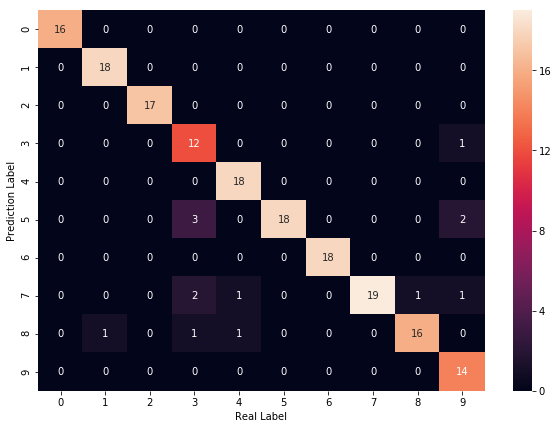

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 18., 17., 13., 18., 23., 18., 24., 19., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:120 index:[5] real:5
#1 min_error:150 index:[2] real:2
#2 min_error:134 index:[8] real:8
#3 min_error:27 index:[0] real:0
#4 min_error:107 index:[1] real:1
#5 min_error:103 index:[7] real:7
#6 min_error:80 index:[6] real:6
#7 min_error:92 index:[3] real:3
#8 min_error:78 index:[2] real:2
#9 min_error:113 index:[1] real:1
#10 min_error:162 index:[7] real:7
#11 min_error:160 index:[7] real:4
#12 min_error:82 index:[6] real:6
#13 min_error:117 index:[3] real:3
#14 min_error:103 index:[1] real:1
#15 min_error:138 index:[3] real:3
#16 min_error:157 index:[7] real:9
#17 min_error:93 index:[1] real:1
#18 min_error:137 index:[7] real:7
#19 min_error:52 index:[6] real:6
#20 min_error:138 index:[8] real:8
#21 min_error:62 index:[4] real:4
#22 min_error:93 index:[3] real:3
#23 min_error:117 index:[1] real:1
#24 min_error:74 index:[4] real:4
#25 min_error:54 index:[0] real:0
#26 min_error:89 index:[5] real:5
#27 min_error:86 index:[3] real:3
#28 min_error:130 index:[6] real:6
#29 min_

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:10095 Total connections::11510


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9332096474953617
Avg Base Learner:0.8092502968097041


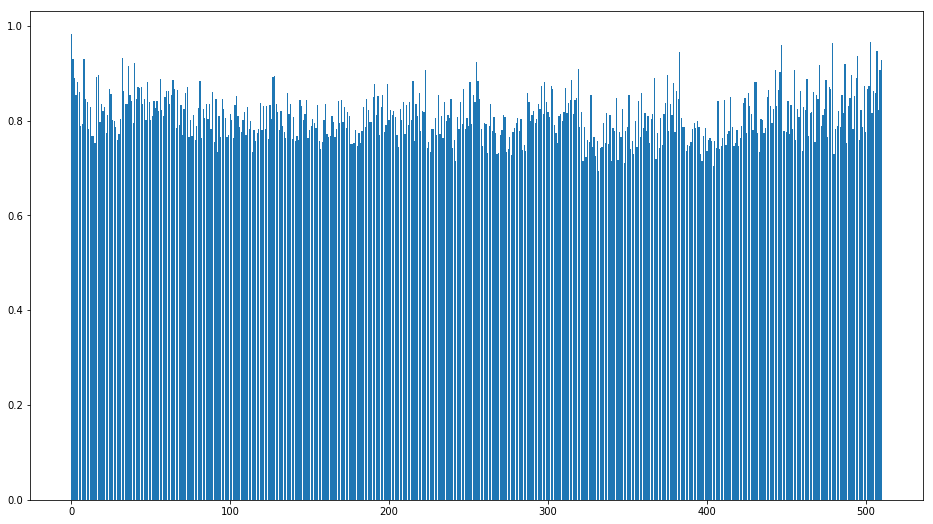

In [27]:
plt.figure(figsize = (16,9))
plt.bar(range(511),winner_fitness)
plt.show()

In [3]:
winner_fitness

NameError: name 'winner_fitness' is not defined